# Microsoft Malware Prediction

## Importación de librerías 

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format32

from scipy import stats

from sklearn import preprocessing

from sklearn import model_selection
from sklearn import metrics 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix


In [2]:
from sklearn import __version__ as sklearn_version
print('La versión instalada de scikit-learn es {}.'.format(sklearn_version))

La versión instalada de scikit-learn es 0.21.3.


## Importación de datos 

Importaremos el Dataset de trabajo:

In [3]:
df = pd.read_csv('sample_mmp.csv', sep=',', encoding='utf-8', index_col=False, skipinitialspace=True)

C:\Users\charl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Este warning, según stackoverflow tiene que ver con lo complejo del proceso de determinar el tipo de variable.

## MLC2: Data Understanding and Data Preparation

### MLC2.1: Análisis Univariante de datos

#### Tamaño del dataset

In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 84 entries, Unnamed: 0 to HasDetections
dtypes: float64(36), int64(18), object(30)
memory usage: 320.4+ MB


Podemos ver 500000 registros y 84 atributos. Valores conformados pro float64, int64 y objects (Categóricas)

#### Visualización directa de los datos

In [5]:
df.head(4).T

0  \
Unnamed: 0                                                                          8427007   
MachineIdentifier                                          f1cd864e97bae82bdf96523e1a539121   
ProductName                                                                    win8defender   
EngineVersion                                                                   1.1.15100.1   
AppVersion                                                                  4.18.1807.18075   
AvSigVersion                                                                   1.273.1234.0   
IsBeta                                                                                    0   
RtpStateBitfield                                                                       7.00   
IsSxsPassiveMode                                                                          0   
DefaultBrowsersIdentifier                                                               NaN   
AVProductStatesIdentifier                                                         53,447.00   
AVProductsInstalled                                                                    1.00   
AVProductsEnabled                                                                      1.00   
HasTpm                                                                                    1   
CountryIdentifier                                                                         8   
CityIdentifier                                                                    85,219.00   
OrganizationIdentifier                                                                  NaN   
GeoNameIdentifier                                                                    205.00   
LocaleEnglishNameIdentifier                                                             172   
Platform                                                                          windows10   
Processor                                                                               x64   
OsVer                                                                              10.0.0.0   
OsBuild                                                                               17134   
OsSuite                                                                                 256   
OsPlatformSubRelease                                                                    rs4   
OsBuildLab                                         17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                                              Pro   
IsProtected                                                                            1.00   
AutoSampleOptIn                                                                           0   
PuaMode                                                                                 NaN   
SMode                                                                                  0.00   
IeVerIdentifier                                                                      137.00   
SmartScreen                                                                    RequireAdmin   
Firewall                                                                               1.00   
UacLuaenable                                                                           1.00   
Census_MDC2FormFactor                                                               Desktop   
Census_DeviceFamily                                                         Windows.Desktop   
Census_OEMNameIdentifier                                                           1,443.00   
Census_OEMModelIdentifier                                                        275,891.00   
Census_ProcessorCoreCount                                                              4.00   
Census_ProcessorManufacturerIdentifier                                                 5.00   
Census_ProcessorModelIdentifier                                                    2,273.00   
Censu

In [6]:
df.tail(4).T

499996  \
Unnamed: 0                                                                           5740034   
MachineIdentifier                                           a4c232d528d98343e8f1b73650da7b82   
ProductName                                                                     win8defender   
EngineVersion                                                                    1.1.15100.1   
AppVersion                                                                   4.18.1807.18075   
AvSigVersion                                                                    1.273.1620.0   
IsBeta                                                                                     0   
RtpStateBitfield                                                                        7.00   
IsSxsPassiveMode                                                                           0   
DefaultBrowsersIdentifier                                                                NaN   
AVProductStatesIdentifier                                                          53,447.00   
AVProductsInstalled                                                                     1.00   
AVProductsEnabled                                                                       1.00   
HasTpm                                                                                     1   
CountryIdentifier                                                                        149   
CityIdentifier                                                                     80,920.00   
OrganizationIdentifier                                                                 27.00   
GeoNameIdentifier                                                                     181.00   
LocaleEnglishNameIdentifier                                                               56   
Platform                                                                           windows10   
Processor                                                                                x64   
OsVer                                                                               10.0.0.0   
OsBuild                                                                                16299   
OsSuite                                                                                  768   
OsPlatformSubRelease                                                                     rs3   
OsBuildLab                                         16299.15.amd64fre.rs3_release.170928-1534   
SkuEdition                                                                              Home   
IsProtected                                                                             1.00   
AutoSampleOptIn                                                                            0   
PuaMode                                                                                  NaN   
SMode                                                                                   0.00   
IeVerIdentifier                                                                       111.00   
SmartScreen                                                                              Off   
Firewall                                                                                1.00   
UacLuaenable                                                                            1.00   
Census_MDC2FormFactor                                                               Notebook   
Census_DeviceFamily                                                          Windows.Desktop   
Census_OEMNameIdentifier                                                              666.00   
Census_OEMModelIdentifier                                                         264,566.00   
Census_ProcessorCoreCount                                                               4.00   
Census_ProcessorManufacturerIdentifier                                                  5.00   
Census_ProcessorModelIdentifier                       

Ya podemos ver columnas como el Unnamed que sirven como index del dataset pero no será utilizado aquí. Se debe borrar. Por otro lado, el MachineIdentifier también funciona como Index y no genera ningún valor al modelo, se puede borrar. 

Analizamos todas las variables explicadas segun el Kaggle en un documento anexo:

Borramos la columnas Unnamed y MachineIdentifier

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df['MachineIdentifier'].nunique()

500000

In [9]:
df.drop('MachineIdentifier', axis=1, inplace=True)

In [10]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 82 entries, ProductName to HasDetections
dtypes: float64(36), int64(17), object(29)
memory usage: 312.8+ MB


In [11]:
df.head().T

0  \
ProductName                                                                    win8defender   
EngineVersion                                                                   1.1.15100.1   
AppVersion                                                                  4.18.1807.18075   
AvSigVersion                                                                   1.273.1234.0   
IsBeta                                                                                    0   
RtpStateBitfield                                                                       7.00   
IsSxsPassiveMode                                                                          0   
DefaultBrowsersIdentifier                                                               NaN   
AVProductStatesIdentifier                                                         53,447.00   
AVProductsInstalled                                                                    1.00   
AVProductsEnabled                                                                      1.00   
HasTpm                                                                                    1   
CountryIdentifier                                                                         8   
CityIdentifier                                                                    85,219.00   
OrganizationIdentifier                                                                  NaN   
GeoNameIdentifier                                                                    205.00   
LocaleEnglishNameIdentifier                                                             172   
Platform                                                                          windows10   
Processor                                                                               x64   
OsVer                                                                              10.0.0.0   
OsBuild                                                                               17134   
OsSuite                                                                                 256   
OsPlatformSubRelease                                                                    rs4   
OsBuildLab                                         17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                                              Pro   
IsProtected                                                                            1.00   
AutoSampleOptIn                                                                           0   
PuaMode                                                                                 NaN   
SMode                                                                                  0.00   
IeVerIdentifier                                                                      137.00   
SmartScreen                                                                    RequireAdmin   
Firewall                                                                               1.00   
UacLuaenable                                                                           1.00   
Census_MDC2FormFactor                                                               Desktop   
Census_DeviceFamily                                                         Windows.Desktop   
Census_OEMNameIdentifier                                                           1,443.00   
Census_OEMModelIdentifier                                                        275,891.00   
Census_ProcessorCoreCount                                                              4.00   
Census_ProcessorManufacturerIdentifier                                                 5.00   
Census_ProcessorModelIdentifier                                                    2,273.00   
Census_ProcessorClass                                                                   NaN   
Census_PrimaryDiskTotalCapacity                                                  953,869.00   
Censu

#### Tipo de atributos disponibles

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 82 columns):
ProductName                                          500000 non-null object
EngineVersion                                        500000 non-null object
AppVersion                                           500000 non-null object
AvSigVersion                                         500000 non-null object
IsBeta                                               500000 non-null int64
RtpStateBitfield                                     498168 non-null float64
IsSxsPassiveMode                                     500000 non-null int64
DefaultBrowsersIdentifier                            24061 non-null float64
AVProductStatesIdentifier                            498062 non-null float64
AVProductsInstalled                                  498062 non-null float64
AVProductsEnabled                                    498062 non-null float64
HasTpm                                             

#### Estadísticos descriptivos


In [13]:
df.describe().T

count             mean  \
IsBeta                                            500,000.00             0.00   
RtpStateBitfield                                  498,168.00             6.85   
IsSxsPassiveMode                                  500,000.00             0.02   
DefaultBrowsersIdentifier                          24,061.00         1,652.82   
AVProductStatesIdentifier                         498,062.00        47,850.91   
AVProductsInstalled                               498,062.00             1.33   
AVProductsEnabled                                 498,062.00             1.02   
HasTpm                                            500,000.00             0.99   
CountryIdentifier                                 500,000.00           108.04   
CityIdentifier                                    481,760.00        81,271.65   
OrganizationIdentifier                            345,437.00            24.87   
GeoNameIdentifier                                 499,984.00           169.73   
LocaleEnglishNameIdentifier                       500,000.00           122.61   
OsBuild                                           500,000.00        15,726.93   
OsSuite                                           500,000.00           574.72   
IsProtected                                       498,074.00             0.95   
AutoSampleOptIn                                   500,000.00             0.00   
SMode                                             470,152.00             0.00   
IeVerIdentifier                                   496,791.00           126.66   
Firewall                                          494,838.00             0.98   
UacLuaenable                                      499,377.00            13.73   
Census_OEMNameIdentifier                          494,619.00         2,218.65   
Census_OEMModelIdentifier                         494,236.00       239,128.05   
Census_ProcessorCoreCount                         497,653.00             3.99   
Census_ProcessorManufacturerIdentifier            497,653.00             4.53   
Census_ProcessorModelIdentifier                   497,651.00         2,370.99   
Census_PrimaryDiskTotalCapacity                   497,024.00       514,043.32   
Census_SystemVolumeTotalCapacity                  497,024.00       378,054.64   
Census_HasOpticalDiskDrive                        500,000.00             0.08   
Census_TotalPhysicalRAM                           495,444.00         6,129.23   
Census_InternalPrimaryDiagonalDisplaySizeInInches 497,346.00            16.69   
Census_InternalPrimaryDisplayResolutionHorizontal 497,350.00         1,548.30   
Census_InternalPrimaryDisplayResolutionVertical   497,350.00           898.24   
Census_InternalBatteryNumberOfCharges             484,962.00 1,125,600,150.21   
Census_OSBuildNumber                              500,000.00        15,841.37   
Census_OSBuildRevision                            500,000.00           967.22   
Census_OSInstallLanguageIdentifier                496,668.00            14.61   
Census_OSUILocaleIdentifier                       500,000.00            60.45   
Census_IsPortableOperatingSystem                  500,000.00             0.00   
Census_IsFlightingInternal                         84,775.00             0.00   
Census_IsFlightsDisabled                          491,067.00             0.00   
Census_ThresholdOptIn                             181,896.00             0.00   
Census_FirmwareManufacturerIdentifier             489,651.00           402.68   
Census_FirmwareVersionIdentifier                  490,939.00        33,030.99   
Census_IsSecureBootEnabled                        500,000.00             0.49   
Census_IsWIMBootEnabled                           182,334.00             0.00   
Census_IsVirtualDevice                            499,099.00             0.01   
Census_IsTouchEnabled                             500,000.00             0.13   
Census_IsPenCapable                               500,000.00             0.04   
Censu

In [14]:
df.describe(include=['object']).T

count unique  \
ProductName                       500000      3   
EngineVersion                     500000     53   
AppVersion                        500000     95   
AvSigVersion                      500000   6455   
Platform                          500000      4   
Processor                         500000      3   
OsVer                             500000     21   
OsPlatformSubRelease              500000      9   
OsBuildLab                        499999    453   
SkuEdition                        500000      8   
PuaMode                              126      1   
SmartScreen                       321404     12   
Census_MDC2FormFactor             500000     12   
Census_DeviceFamily               500000      3   
Census_ProcessorClass               2082      3   
Census_PrimaryDiskTypeName        499291      4   
Census_ChassisTypeName            499963     34   
Census_PowerPlatformRoleName      499998      9   
Census_InternalBatteryType        144397     28   
Census_OSVersion                  500000    305   
Census_OSArchitecture             500000      3   
Census_OSBranch                   500000     15   
Census_OSEdition                  500000     22   
Census_OSSkuName                  500000     21   
Census_OSInstallTypeName          500000      9   
Census_OSWUAutoUpdateOptionsName  500000      6   
Census_GenuineStateName           500000      4   
Census_ActivationChannel          500000      6   
Census_FlightRing                 500000      8   

                                                                       top  \
ProductName                                                   win8defender   
EngineVersion                                                  1.1.15200.1   
AppVersion                                                 4.18.1807.18075   
AvSigVersion                                                  1.273.1420.0   
Platform                                                         windows10   
Processor                                                              x64   
OsVer                                                             10.0.0.0   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                            Home   
PuaMode                                                                 on   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                             Notebook   
Census_DeviceFamily                                        Windows.Desktop   
Census_ProcessorClass                                                  mid   
Census_PrimaryDiskTypeName                                             HDD   
Census_ChassisTypeName                                            Notebook   
Census_PowerPlatformRoleName                                        Mobile   
Census_InternalBatteryType                                            lion   
Census_OSVersion                                            10.0.17134.228   
Census_OSArchitecture                                                amd64   
Census_OSBranch                                                rs4_release   
Census_OSEdition                                                      Core   
Census_OSSkuName                                                      CORE   
Census_OSInstallTypeName                                        UUPUpgrade   
Census_OSWUAutoUpdateOptionsName                                  FullAuto   
Census_GenuineStateName                                         IS_GENUINE   
Census_ActivationChannel                                            Retail   
Census_FlightRing                                                   Retail   

                                    freq  
ProductName                       494604  
EngineVersion                     216491  
AppVersion                        

#### Número de valores nulos

In [15]:
df.select_dtypes(include='number').isnull().sum()

IsBeta                                                    0
RtpStateBitfield                                       1832
IsSxsPassiveMode                                          0
DefaultBrowsersIdentifier                            475939
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        18240
OrganizationIdentifier                               154563
GeoNameIdentifier                                        16
LocaleEnglishNameIdentifier                               0
OsBuild                                                   0
OsSuite                                                   0
IsProtected                                            1926
AutoSampleOptIn                         

In [16]:
df.select_dtypes(include='object').isnull().sum()

ProductName                              0
EngineVersion                            0
AppVersion                               0
AvSigVersion                             0
Platform                                 0
Processor                                0
OsVer                                    0
OsPlatformSubRelease                     0
OsBuildLab                               1
SkuEdition                               0
PuaMode                             499874
SmartScreen                         178596
Census_MDC2FormFactor                    0
Census_DeviceFamily                      0
Census_ProcessorClass               497918
Census_PrimaryDiskTypeName             709
Census_ChassisTypeName                  37
Census_PowerPlatformRoleName             2
Census_InternalBatteryType          355603
Census_OSVersion                         0
Census_OSArchitecture                    0
Census_OSBranch                          0
Census_OSEdition                         0
Census_OSSk

#### Resumen descriptivo y borrado de atributos 

In [17]:
stats_desc = []
for col in df.columns:
    stats_desc.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats_desc, columns=['Feature', 'Unique_values', '% de nulos', '% de rep. mayor valor', 'type'])
stats_df.sort_values('% de nulos', ascending=False)

Feature  Unique_values  \
27                                            PuaMode              1   
40                              Census_ProcessorClass              3   
7                           DefaultBrowsersIdentifier            554   
67                         Census_IsFlightingInternal              2   
51                         Census_InternalBatteryType             28   
70                              Census_ThresholdOptIn              2   
74                            Census_IsWIMBootEnabled              1   
30                                        SmartScreen             12   
14                             OrganizationIdentifier             44   
28                                              SMode              2   
13                                     CityIdentifier          37157   
79                                       Wdft_IsGamer              2   
80                              Wdft_RegionIdentifier             15   
52              Census_InternalBatteryNumberOfCharges           5248   
71              Census_FirmwareManufacturerIdentifier            303   
72                   Census_FirmwareVersionIdentifier          23569   
68                           Census_IsFlightsDisabled              2   
36                          Census_OEMModelIdentifier          40697   
35                           Census_OEMNameIdentifier           1589   
31                                           Firewall              2   
45                            Census_TotalPhysicalRAM            552   
78            Census_IsAlwaysOnAlwaysConnectedCapable              2   
61                 Census_OSInstallLanguageIdentifier             39   
29                                    IeVerIdentifier            179   
43                   Census_SystemVolumeTotalCapacity         142051   
41                    Census_PrimaryDiskTotalCapacity           1103   
47  Census_InternalPrimaryDiagonalDisplaySizeInInches            520   
48  Census_InternalPrimaryDisplayResolutionHorizontal            474   
49    Census_InternalPrimaryDisplayResolutionVertical            514   
39                    Census_ProcessorModelIdentifier           2243   
38             Census_ProcessorManufacturerIdentifier              4   
37                          Census_ProcessorCoreCount             27   
8                           AVProductStatesIdentifier           5516   
10                                  AVProductsEnabled              5   
9                                 AVProductsInstalled              5   
25                                        IsProtected              2   
5                                    RtpStateBitfield              7   
75                             Census_IsVirtualDevice              2   
42                         Census_PrimaryDiskTypeName              4   
32                                       UacLuaenable              5   
46                             Census_ChassisTypeName             34   
15                                  GeoNameIdentifier            268   
50                       Census_PowerPlatformRoleName              9   
23                                         OsBuildLab            453   
77                                Census_IsPenCapable              2   
60                           Census_OSInstallTypeName              9   
59                                   Census_OSSkuName             21   
66                           Census_ActivationChannel              6   
63                   Census_OSWUAutoUpdateOptionsName              6   
62                        Census_OSUILocaleIdentifier             92   
76                              Census_IsTouchEnabled              2   
64                   Census_IsPortableOperatingSystem              2   
65                            Census_GenuineStateName              4   
73                         Census_IsSecureBootEnabled              2   
69                                  Census_FlightRing              8   
57            

Creo que en este caso deberíamos borrar varios atributos que, creo, no generan valor para el anáilisis. Aunque el decision tree es muy flexible.
- PuaMode y Census_ProcessorClass por tener más del 99& de valores vacios.


In [18]:
stats_desc = []
for col in df.columns:
    stats_desc.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats_desc, columns=['Feature', 'Unique_values', '% de nulos', '% de rep. mayor valor', 'type'])
stats_df.sort_values('% de rep. mayor valor', ascending=False)

Feature  Unique_values  \
4                                              IsBeta              2   
26                                    AutoSampleOptIn              2   
27                                            PuaMode              1   
64                   Census_IsPortableOperatingSystem              2   
34                                Census_DeviceFamily              3   
40                              Census_ProcessorClass              3   
32                                       UacLuaenable              5   
75                             Census_IsVirtualDevice              2   
0                                         ProductName              3   
11                                             HasTpm              2   
6                                    IsSxsPassiveMode              2   
68                           Census_IsFlightsDisabled              2   
10                                  AVProductsEnabled              5   
5                                    RtpStateBitfield              7   
31                                           Firewall              2   
19                                              OsVer             21   
17                                           Platform              4   
77                                Census_IsPenCapable              2   
7                           DefaultBrowsersIdentifier            554   
25                                        IsProtected              2   
28                                              SMode              2   
69                                  Census_FlightRing              8   
78            Census_IsAlwaysOnAlwaysConnectedCapable              2   
44                         Census_HasOpticalDiskDrive              2   
54                              Census_OSArchitecture              3   
18                                          Processor              3   
65                            Census_GenuineStateName              4   
38             Census_ProcessorManufacturerIdentifier              4   
76                              Census_IsTouchEnabled              2   
67                         Census_IsFlightingInternal              2   
51                         Census_InternalBatteryType             28   
9                                 AVProductsInstalled              5   
50                       Census_PowerPlatformRoleName              9   
79                                       Wdft_IsGamer              2   
8                           AVProductStatesIdentifier           5516   
42                         Census_PrimaryDiskTypeName              4   
33                              Census_MDC2FormFactor             12   
70                              Census_ThresholdOptIn              2   
74                            Census_IsWIMBootEnabled              1   
21                                            OsSuite              9   
24                                         SkuEdition              8   
37                          Census_ProcessorCoreCount             27   
46                             Census_ChassisTypeName             34   
2                                          AppVersion             95   
52              Census_InternalBatteryNumberOfCharges           5248   
49    Census_InternalPrimaryDisplayResolutionVertical            514   
66                           Census_ActivationChannel              6   
73                         Census_IsSecureBootEnabled              2   
48  Census_InternalPrimaryDisplayResolutionHorizontal            474   
81                                      HasDetections              2   
30                                        SmartScreen             12   
14                             OrganizationIdentifier             44   
45                            Census_TotalPhysicalRAM            552   
55                                    Census_OSBranch             15   
56                               Census_OSBuildNumber             61   
63            

Aquí aparecen varios atributos con con un % muy elevado de un único valor:
- IsBeta, AutoSampleOptIn. 
Se dejan los demás por el algoritmo que utilizaremos. 

In [19]:
df.drop(['IsBeta', 'AutoSampleOptIn', 'PuaMode', 'Census_ProcessorClass'], axis=1, inplace=True)

#### Duplicados

In [20]:
df[df.duplicated(keep=False)]

ProductName EngineVersion        AppVersion  AvSigVersion  \
4337    win8defender   1.1.15200.1   4.18.1807.18075    1.275.11.0   
15396   win8defender   1.1.15100.1   4.18.1807.18075  1.273.1494.0   
15841   win8defender   1.1.15200.1   4.18.1807.18075  1.275.1198.0   
17354   win8defender   1.1.13504.0      4.11.15063.0     1.237.0.0   
21260   win8defender   1.1.15200.1   4.18.1807.18075   1.275.850.0   
29043   win8defender   1.1.15200.1     4.12.16299.15   1.275.767.0   
33176   win8defender   1.1.13504.0      4.11.15063.0     1.237.0.0   
35132   win8defender   1.1.14104.0     4.12.16299.15    1.251.42.0   
36789   win8defender   1.1.15100.1   4.18.1807.18075  1.273.1494.0   
37665   win8defender   1.1.15200.1   4.18.1807.18075   1.275.197.0   
41472   win8defender   1.1.15100.1   4.18.1806.18062   1.273.529.0   
48122   win8defender   1.1.14104.0     4.12.16299.15    1.251.42.0   
48395   win8defender   1.1.15200.1   4.18.1807.18075   1.275.957.0   
49114   win8defender   1.1.15200.1   4.18.1807.18075  1.275.1209.0   
52499   win8defender   1.1.14600.4      4.13.17134.1    1.263.48.0   
54553   win8defender   1.1.15200.1   4.18.1807.18075  1.275.1362.0   
64295   win8defender   1.1.15100.1   4.18.1807.18075   1.273.933.0   
68964   win8defender   1.1.13504.0    4.11.15063.447     1.237.0.0   
75423   win8defender   1.1.14600.4      4.13.17134.1    1.263.48.0   
77312   win8defender   1.1.15200.1     4.12.16299.15   1.275.767.0   
97562   win8defender   1.1.15100.1   4.18.1807.18075  1.273.1144.0   
106321  win8defender   1.1.13504.0      4.11.15063.0     1.237.0.0   
110588  win8defender   1.1.15100.1   4.18.1807.18075   1.273.933.0   
110711  win8defender   1.1.15200.1   4.18.1807.18075   1.275.281.0   
111435  win8defender   1.1.15100.1   4.18.1806.18062   1.273.529.0   
112649  win8defender   1.1.15200.1   4.18.1807.18075    1.275.11.0   
115539  win8defender   1.1.15100.1   4.18.1807.18075  1.273.1346.0   
133899  win8defender   1.1.15100.1   4.18.1807.18075   1.273.665.0   
137058  win8defender   1.1.15200.1   4.18.1807.18075   1.275.400.0   
158381  win8defender   1.1.15100.1   4.18.1806.18062   1.273.483.0   
158727  win8defender   1.1.15200.1   4.18.1807.18075  1.275.1198.0   
167589  win8defender   1.1.15200.1   4.18.1807.18075   1.275.957.0   
173276  win8defender   1.1.15100.1   4.18.1807.18075   1.273.665.0   
175491  win8defender   1.1.15200.1   4.18.1807.18075  1.275.1011.0   
179994  win8defender   1.1.15200.1   4.18.1807.18075   1.275.292.0   
188537  win8defender   1.1.15100.1   4.18.1807.18075  1.273.1144.0   
188629  win8defender   1.1.15200.1   4.18.1807.18075   1.275.948.0   
194270  win8defender   1.1.15200.1   4.18.1807.18075   1.275.474.0   
212196  win8defender   1.1.15200.1   4.18.1807.18075  1.275.1362.0   
218100  win8defender   1.1.15200.1   4.18.1807.18075   1.275.474.0   
230093  win8defender   1.1.15100.1   4.18.1807.18075  1.273.1346.0   
244963  win8defender   1.1.15200.1   4.8.10240.17443  1.275.1244.0   
253564  win8defender   1.1.15100.1    4.10.14393.726   1.273.665.0   
265650  win8defender   1.1.15100.1   4.18.1806.18062   1.273.130.0   
266022  win8defender   1.1.13504.0      4.11.15063.0     1.237.0.0   
272269  win8defender   1.1.15200.1   4.18.1807.18075  1.275.1209.0   
275806  win8defender   1.1.15100.1   4.18.1806.18062   1.273.130.0   
279008  win8defender   1.1.15200.1   4.18.1807.18075   1.275.292.0   
279749  win8defender   1.1.15200.1   4.18.1807.18075   1.275.197.0   
300845  win8defender   1.1.14600.4    4.13.17134.191    1.263.48.0   
309968  win8defender   1.1.15200.1   4.18.1807.18075   1.275.249.0   
334707  win8defender   1.1.15100.1   4.18.1806.18062   1.273.461.0   
347225  win8defender   1.1.15200.1   4.18.1807.18075  1.275.1011.0   
352119  win8defender   1.1.14600.4    4.13.17134.191    1.263.48.0   
359191  win8defender   1.1.15200.1   4.18.1807.18075   1.275.197.0   
359354  win8defender   1.1.15100.1    4.10.14393.726   1.273.665.0   
373839  win8defende

In [21]:
#df.drop_duplicates(inplace=True)

Aunque muestra duplicados, en realidad las filas son diferentes. 

#### Distribución de los valores del target

In [22]:
df['HasDetections'].value_counts(dropna=True)

0    250047
1    249953
Name: HasDetections, dtype: int64

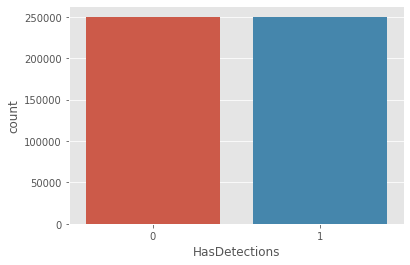

In [23]:
sns.countplot(data=df, x='HasDetections')

En este caso, el Target no requiere modificaciones ya que se encuentra como 0 = NoDetection 1 = Detection.

Parece también, que la muestra del Dataset está muy bien tomada debido a el número ceros vs unos y la media del 50% en el target.

In [24]:
df['HasDetections'].count()

500000

In [25]:
df['HasDetections'].sum()

249953

In [26]:
df['HasDetections'].mean()

0.499906

#### Identificación de Outliers/Datos erróneos/Correlación de variables con target/Correlación de variables con la clase/Visualización/ Limpieza de variables.

###### Atributo ProductName

Es un atributo categórico, que representa los nombres de los Windows Defender.

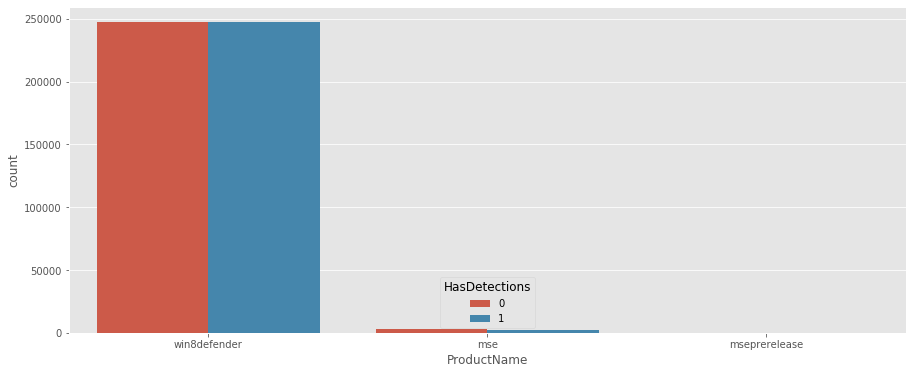

In [27]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='ProductName', hue='HasDetections')

In [28]:
pd.crosstab(df['ProductName'], df['HasDetections'])

HasDetections       0       1
ProductName                  
mse              2809    2586
mseprerelease       1       0
win8defender   247237  247367

No tiene casi ninguna correlación con el target.Se puede borrar o dejar por utilizar arbol de decisiones.
Por comodidad, pasaré el mseprelease a mse ya que tiene un solo valor.

In [29]:
df.loc[df['ProductName']=='mseprerelease', 'ProductName'] = 'mse'

In [30]:
pd.crosstab(df['ProductName'], df['HasDetections'])

HasDetections       0       1
ProductName                  
mse              2810    2586
win8defender   247237  247367

##### Atributo EngineVersion

Es un atributo categórico, que representa la versión del sistema de seguridad.

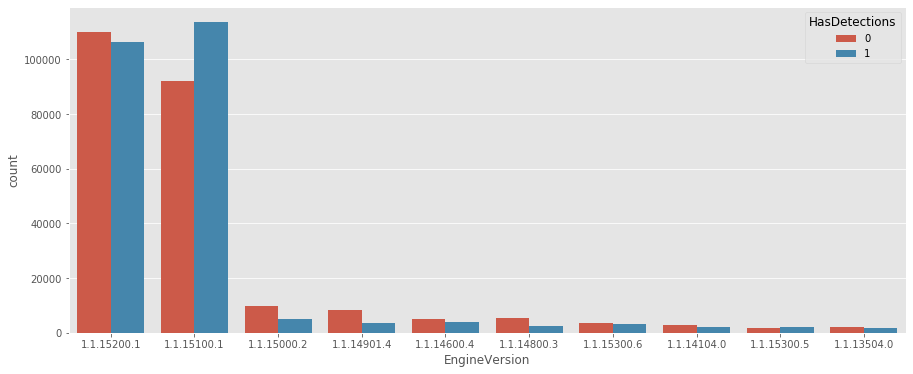

In [31]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='EngineVersion', hue='HasDetections', order=pd.value_counts(df['EngineVersion']).iloc[:10].index)

In [32]:
df['EngineVersion'].value_counts(normalize=False, dropna=False).head(15)

1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
Name: EngineVersion, dtype: int64

In [33]:
pd.crosstab(df['EngineVersion'], df['HasDetections']).sort_values(0, ascending=False).head(10)

HasDetections       0       1
EngineVersion                
1.1.15200.1    110038  106453
1.1.15100.1     91937  113557
1.1.15000.2      9711    5041
1.1.14901.4      8314    3670
1.1.14800.3      5242    2306
1.1.14600.4      5019    3986
1.1.15300.6      3482    3287
1.1.14104.0      2942    2298
1.1.13504.0      2170    1706
1.1.15300.5      1858    2025

In [34]:
df['EngineVersion'].nunique()

53

Creo que podríamos realizar una pequeña agrupación de versiones. 

In [35]:
list = df['EngineVersion'].str[:7]
list


0         1.1.151
1         1.1.151
2         1.1.151
3         1.1.152
4         1.1.152
           ...   
499995    1.1.152
499996    1.1.151
499997    1.1.153
499998    1.1.151
499999    1.1.151
Name: EngineVersion, Length: 500000, dtype: object

In [36]:
list.nunique()

32

In [37]:
df['EngineVersion_g'] = df['EngineVersion'].str[:7]

In [38]:
df.drop(columns=('EngineVersion'), axis=1, inplace=True)

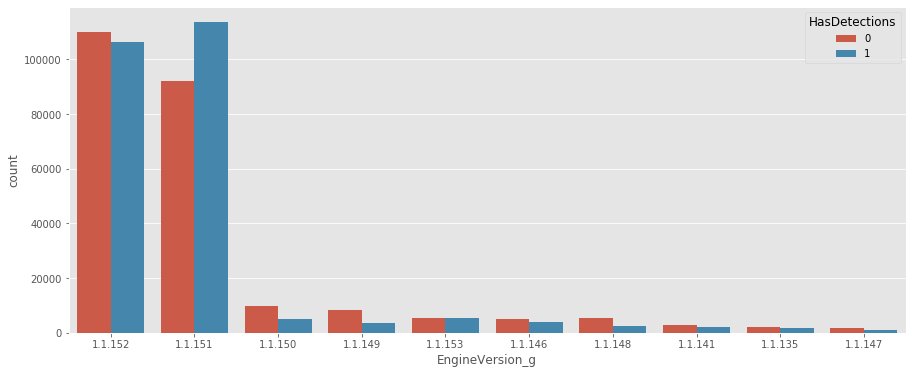

In [39]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='EngineVersion_g', hue='HasDetections', order=pd.value_counts(df['EngineVersion_g']).iloc[:10].index)

La correlación se mantiene igual. Hicimos bien al parecer.

##### Atributo AppVersión

Es un atributo categórico, que representa la versión del app.

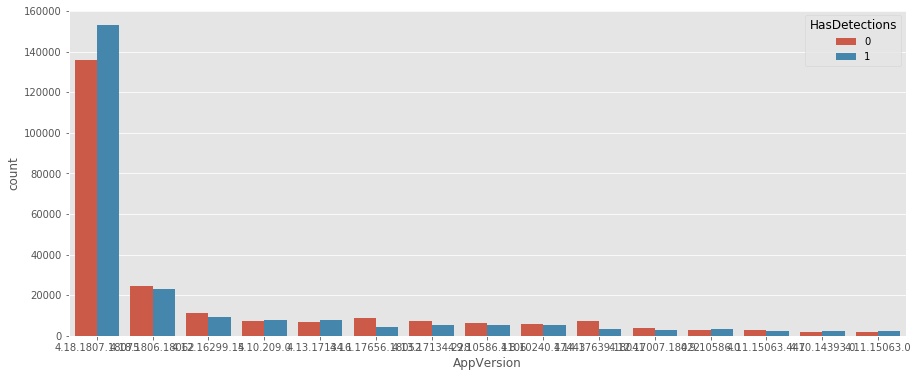

In [40]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='AppVersion', hue='HasDetections', order=pd.value_counts(df['AppVersion']).iloc[:15].index)

La correlación importante se ve en el valor que tiene mayor frequencia.

In [41]:
df.pivot_table(index='AppVersion', values='HasDetections', aggfunc=[len, sum, np.mean])

len           sum          mean
                 HasDetections HasDetections HasDetections
AppVersion                                                
4.10.14393.0              4399          2332          0.53
4.10.14393.1066            404           192          0.48
4.10.14393.1198           1271           653          0.51
4.10.14393.1532              7             4          0.57
4.10.14393.1593            536           278          0.52
4.10.14393.1613            760           360          0.47
4.10.14393.1794           2425          1157          0.48
4.10.14393.2248             14             4          0.29
4.10.14393.2273             54            35          0.65
4.10.14393.2457              3             1          0.33
4.10.14393.726              16            11          0.69
4.10.14393.953             403           190          0.47
4.10.205.0                  49            24          0.49
4.10.209.0               15292          7771          0.51
4.11.15063.0              3874          2191          0.57
4.11.15063.1154              2             1          0.50
4.11.15063.1155           2477          1057          0.43
4.11.15063.447            5100          2389          0.47
4.11.15063.994               5             3          0.60
4.12.16299.15            20197          9207          0.46
4.12.17007.17121             2             0          0.00
4.12.17007.17123           775           375          0.48
4.12.17007.18011          3392          1642          0.48
4.12.17007.18022          6470          2698          0.42
4.13.17134.1             14414          7579          0.53
4.13.17134.112             651           309          0.47
4.13.17134.191            1182           553          0.47
4.13.17134.228           12729          5465          0.43
4.13.17134.319              97            64          0.66
4.13.17604.1000              1             1          1.00
4.13.17618.1000              1             1          1.00
4.13.17639.1000              1             0          0.00
4.14.17613.18038            66            15          0.23
4.14.17613.18039          2991           922          0.31
4.14.17639.18041         10670          3372          0.32
4.15.17650.1001              1             1          1.00
4.15.17655.1000              1             0          0.00
4.15.17661.1001              4             1          0.25
4.15.17666.1000              2             0          0.00
4.16.17656.18051             4             1          0.25
4.16.17656.18052         13185          4310          0.33
4.17.17672.1000              4             1          0.25
4.17.17677.1000              5             1          0.20
4.17.17682.1000              4             0          0.00
4.17.17685.20082             4             3          0.75
4.17.17686.1003              5             0          0.00
4.18.1806.18062          47641         23108          0.49
4.18.1806.20021              7             2          0.29
4.18.1806.20033              1             1          1.00
4.18.1807.18070              1             1          1.00
4.18.1807.18072             12             7          0.58
4.18.1807.18075         288809        152973          0.53
4.18.1807.20063             39            19          0.49
4.18.1809.2                733           358          0.49
4.4.304.0                   27            17          0.63
4.5.216.0                   10             4          0.40
4.5.218.0                  116            57          0.49
4.6.305.0                   44            22          0.50
4.7.205.0                   46            23          0.50
4.8.10240.16384           2617          1248          0.48
4.8.10240.17071             77            25          0.32
4.8.10240.17113             13             4          0.31
4.8.10240.17146             50            14          0.28
4.8.10240.17184             34            15          0.44
4.8.10240.17202             94            41          0.44
4.8.10240.17319

In [42]:
pd.crosstab(df['AppVersion'], df['HasDetections']).sort_values(by='AppVersion')

HasDetections          0       1
AppVersion                      
4.10.14393.0        2067    2332
4.10.14393.1066      212     192
4.10.14393.1198      618     653
4.10.14393.1532        3       4
4.10.14393.1593      258     278
4.10.14393.1613      400     360
4.10.14393.1794     1268    1157
4.10.14393.2248       10       4
4.10.14393.2273       19      35
4.10.14393.2457        2       1
4.10.14393.726         5      11
4.10.14393.953       213     190
4.10.205.0            25      24
4.10.209.0          7521    7771
4.11.15063.0        1683    2191
4.11.15063.1154        1       1
4.11.15063.1155     1420    1057
4.11.15063.447      2711    2389
4.11.15063.994         2       3
4.12.16299.15      10990    9207
4.12.17007.17121       2       0
4.12.17007.17123     400     375
4.12.17007.18011    1750    1642
4.12.17007.18022    3772    2698
4.13.17134.1        6835    7579
4.13.17134.112       342     309
4.13.17134.191       629     553
4.13.17134.228      7264    5465
4.13.17134.319        33      64
4.13.17604.1000        0       1
4.13.17618.1000        0       1
4.13.17639.1000        1       0
4.14.17613.18038      51      15
4.14.17613.18039    2069     922
4.14.17639.18041    7298    3372
4.15.17650.1001        0       1
4.15.17655.1000        1       0
4.15.17661.1001        3       1
4.15.17666.1000        2       0
4.16.17656.18051       3       1
4.16.17656.18052    8875    4310
4.17.17672.1000        3       1
4.17.17677.1000        4       1
4.17.17682.1000        4       0
4.17.17685.20082       1       3
4.17.17686.1003        5       0
4.18.1806.18062    24533   23108
4.18.1806.20021        5       2
4.18.1806.20033        0       1
4.18.1807.18070        0       1
4.18.1807.18072        5       7
4.18.1807.18075   135836  152973
4.18.1807.20063       20      19
4.18.1809.2          375     358
4.4.304.0             10      17
4.5.216.0              6       4
4.5.218.0             59      57
4.6.305.0             22      22
4.7.205.0             23      23
4.8.10240.16384     1369    1248
4.8.10240.17071       52      25
4.8.10240.17113        9       4
4.8.10240.17146       36      14
4.8.10240.17184       19      15
4.8.10240.17202       53      41
4.8.10240.17319       29      24
4.8.10240.17354       27      21
4.8.10240.17394       37      37
4.8.10240.17443     5865    5520
4.8.10240.17446        2       1
4.8.10240.17533        1       2
4.8.10240.17609        9       8
4.8.10240.17770        2       3
4.8.10240.17797       14      15
4.8.10240.17861       13      20
4.8.10240.17889       39      64
4.8.10240.17914       21      63
4.8.10240.17918       10      15
4.8.10240.17946       96     166
4.8.204.0             56      40
4.8.207.0            112      92
4.9.10586.0         3082    3131
4.9.10586.1045       353     264
4.9.10586.1106      6341    5091
4.9.10586.1177         1       1
4.9.10586.456          0       1
4.9.10586.494        680     703
4.9.10586.589        431     330
4.9.10586.672        662     536
4.9.10586.839        136     112
4.9.10586.873        132      96
4.9.10586.916        183     128
4.9.10586.962        154     108
4.9.10586.965        167      99
4.9.218.0            185     149

No parece prudente hacer una unión por versiones, ya que en una misma versión se tienen diferentes correlaciones. 

In [43]:
df['AppVersion'].value_counts(normalize=False, dropna=False).head(20)

4.18.1807.18075     288809
4.18.1806.18062      47641
4.12.16299.15        20197
4.10.209.0           15292
4.13.17134.1         14414
4.16.17656.18052     13185
4.13.17134.228       12729
4.9.10586.1106       11432
4.8.10240.17443      11385
4.14.17639.18041     10670
4.12.17007.18022      6470
4.9.10586.0           6213
4.11.15063.447        5100
4.10.14393.0          4399
4.11.15063.0          3874
4.12.17007.18011      3392
4.14.17613.18039      2991
4.8.10240.16384       2617
4.11.15063.1155       2477
4.10.14393.1794       2425
Name: AppVersion, dtype: int64

In [44]:
df['AppVersion'].nunique()

95

Se aprovecha para agrupar los valores con muy pocas frequencias y que por ello no modificarán el modelo. 

In [45]:
list = (df['AppVersion'].value_counts(dropna=True).values > 100)
len(list[list==True])

43

In [46]:
list_1 = df['AppVersion'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['AppVersion'].isin(list_1)==False, 'AppVersion'] = 'resto'

##### Atributo AvSigVersion

Es un atributo categórico, que representa otra versión.

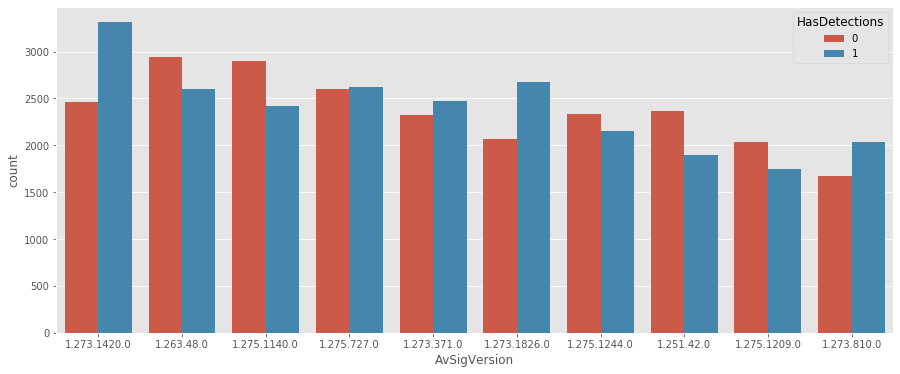

In [47]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='AvSigVersion', hue='HasDetections', order=pd.value_counts(df['AvSigVersion']).iloc[:10].index)

In [48]:
df.pivot_table(index='AvSigVersion', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)


len           sum          mean
             HasDetections HasDetections HasDetections
AvSigVersion                                          
1.273.1420.0          5771          3313          0.57
1.263.48.0            5537          2597          0.47
1.275.1140.0          5317          2423          0.46
1.275.727.0           5214          2619          0.50
1.273.371.0           4799          2471          0.51
1.273.1826.0          4744          2673          0.56
1.275.1244.0          4487          2150          0.48
1.251.42.0            4258          1894          0.44
1.275.1209.0          3787          1747          0.46
1.273.810.0           3708          2036          0.55
1.237.0.0             3534          1590          0.45
1.273.1749.0          3508          2008          0.57
1.273.1379.0          2789          1480          0.53
1.273.1005.0          2747          1471          0.54
1.273.894.0           2540          1365          0.54
1.273.781.0           2409          1332          0.55
1.273.461.0           2332          1256          0.54
1.273.337.0           2219          1198          0.54
1.273.1527.0          2218          1559          0.70
1.275.948.0           2170          1080          0.50

In [49]:
df['AvSigVersion'].value_counts(normalize=False, dropna=False).head(20)

1.273.1420.0    5771
1.263.48.0      5537
1.275.1140.0    5317
1.275.727.0     5214
1.273.371.0     4799
1.273.1826.0    4744
1.275.1244.0    4487
1.251.42.0      4258
1.275.1209.0    3787
1.273.810.0     3708
1.237.0.0       3534
1.273.1749.0    3508
1.273.1379.0    2789
1.273.1005.0    2747
1.273.894.0     2540
1.273.781.0     2409
1.273.461.0     2332
1.273.337.0     2219
1.273.1527.0    2218
1.275.948.0     2170
Name: AvSigVersion, dtype: int64

In [50]:
df['AvSigVersion'].nunique()

6455

Agrupamos los valores por versiones X.XXX.XX

In [51]:
df['AvSigVersion_g'] = df['AvSigVersion'].str[:8]
df['AvSigVersion_g']

0         1.273.12
1         1.273.12
2         1.273.78
3         1.275.16
4         1.275.51
            ...   
499995    1.275.10
499996    1.273.16
499997    1.275.13
499998    1.273.48
499999    1.273.16
Name: AvSigVersion_g, Length: 500000, dtype: object

Ahora tenemos un número de valores que hacen posible usar el OHE.

In [52]:
df['AvSigVersion_g'].nunique()

1877

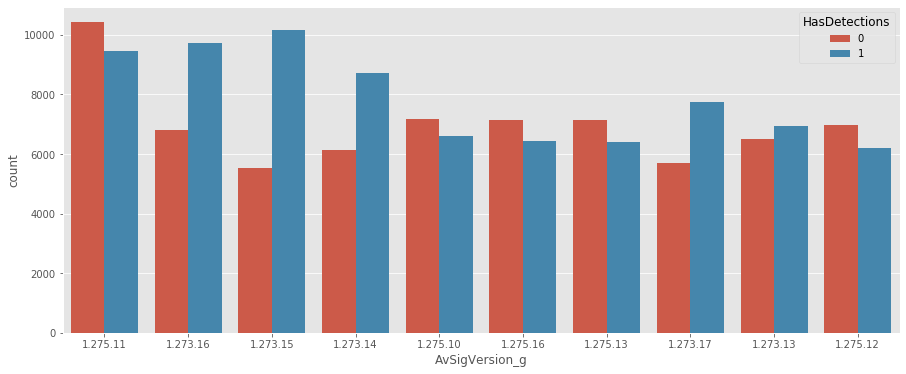

In [53]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='AvSigVersion_g', hue='HasDetections', order=pd.value_counts(df['AvSigVersion_g']).iloc[:10].index)

Quitamos los valores con muy baja frequencia que sabemos, no afectarán al modelos. 

In [54]:
list = (df['AvSigVersion_g'].value_counts(dropna=True).values > 500)
len(list[list==True])

164

In [55]:
list_1 = df['AvSigVersion_g'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['AvSigVersion_g'].isin(list_1)==False, 'AvSigVersion_g'] = 'resto'

In [56]:
df.drop(columns='AvSigVersion', inplace=True)

##### Atributo RtpStateBitfield

Atributo sin información. No sabemos si es numérica o categórica. Investigando parece numérica

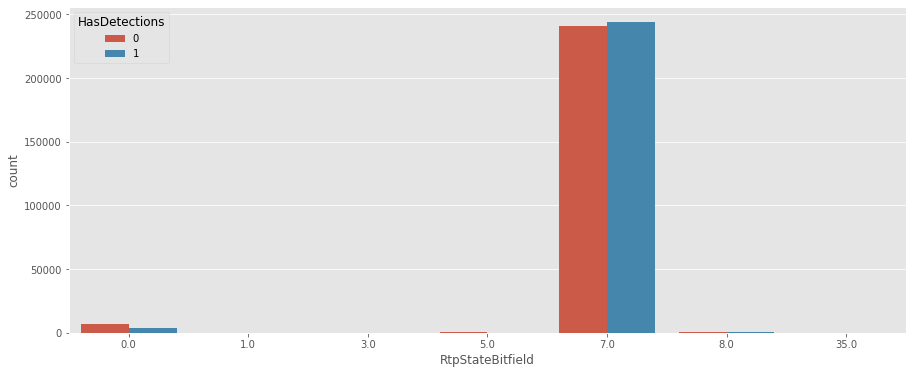

In [57]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='RtpStateBitfield', hue='HasDetections')

Aplicamos Log en el eje Y para ver mejor el comportamiento del atributo

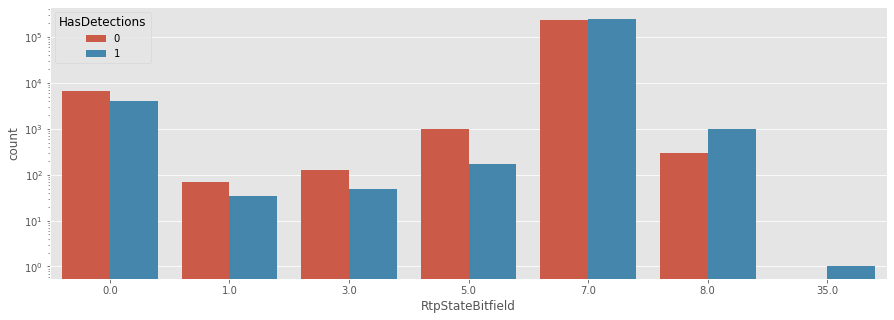

In [58]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='RtpStateBitfield', hue='HasDetections')   
ax.set_yscale('log')

In [59]:
df.pivot_table(index='RtpStateBitfield', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                 HasDetections HasDetections HasDetections
RtpStateBitfield                                          
7.00                    484841        243855          0.50
0.00                     10610          4043          0.38
8.00                      1277           978          0.77
5.00                      1158           175          0.15
3.00                       176            49          0.28
1.00                       105            34          0.32
35.00                        1             1          1.00

Existe correlación interesante para el modelo, solo nos encontramos con el 35 que parece un outlier con frecuencia 1. Se limpiará para optimizar el OHE. 

In [60]:
df['RtpStateBitfield'].fillna(value=-999, inplace=True)

In [61]:
df.loc[df['RtpStateBitfield'] == 35, 'RtpStateBitfield'] = -999

In [62]:
df['RtpStateBitfield'] = df['RtpStateBitfield'].astype(int)

##### Atributo IsSxsPassiveMode

Atributo booleano. PassiveMode es al parecer un sistema de protección de Windows.

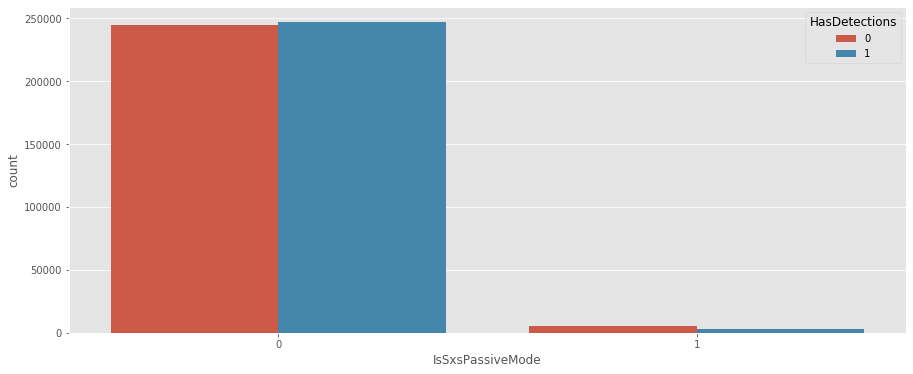

In [63]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='IsSxsPassiveMode', hue='HasDetections')

In [64]:
pd.crosstab(df['IsSxsPassiveMode'], df['HasDetections'])

HasDetections          0       1
IsSxsPassiveMode                
0                 244628  246751
1                   5419    3202

Tiene algo de correlación. Pocos valores True/1 pero se deja.

##### Atributo DefaultBrowsersIdentifier

Tiene una gran cantidad de nulos. Es cuantitativa.

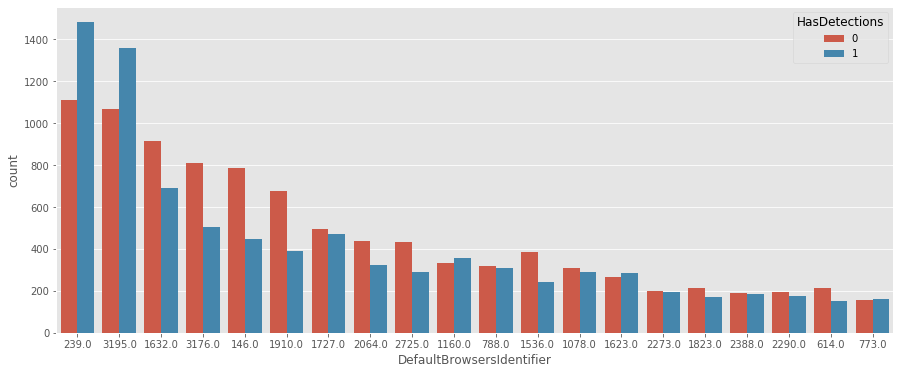

In [65]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='DefaultBrowsersIdentifier', hue='HasDetections', order=pd.value_counts(df['DefaultBrowsersIdentifier']).iloc[:20].index)

In [66]:
df.pivot_table(index='DefaultBrowsersIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                          HasDetections HasDetections HasDetections
DefaultBrowsersIdentifier                                          
239.00                             2589          1481          0.57
3,195.00                           2423          1358          0.56
1,632.00                           1601           688          0.43
3,176.00                           1313           503          0.38
146.00                             1231           445          0.36
1,910.00                           1067           392          0.37
1,727.00                            968           472          0.49
2,064.00                            760           321          0.42
2,725.00                            724           292          0.40
1,160.00                            690           356          0.52
788.00                              626           308          0.49
1,536.00                            623           240          0.39
1,078.00                            601           291          0.48
1,623.00                            549           283          0.52
2,273.00                            392           195          0.50
1,823.00                            382           169          0.44
2,388.00                            374           183          0.49
2,290.00                            372           177          0.48
614.00                              366           153          0.42
773.00                              314           160          0.51

Se ve muy claramente que los dos buscadores más utilizados también son los que mas riesgo traen. 

In [67]:
df['DefaultBrowsersIdentifier'].nunique()

554

Aunque existe una cantidad exagerada de nulos, se deja el atributo para aprovechar la inf.

Intentaremos agrupar para aplicar un OHE y evitar tantas columnas

In [68]:
list = (df['DefaultBrowsersIdentifier'].value_counts(dropna=True).values > 100)
len(list[list==True])

34

In [69]:
list_1 = df['DefaultBrowsersIdentifier'].value_counts(dropna=True).head(len(list[list==True])).index

In [70]:
df.loc[df['DefaultBrowsersIdentifier'].isin(list_1)==False, 'DefaultBrowsersIdentifier'] = 'resto'

En este caso rellenamos los nulos con un valor diferente.

In [71]:
df['DefaultBrowsersIdentifier'].fillna(value=-999, inplace=True)

In [72]:
df['DefaultBrowsersIdentifier'] = df['DefaultBrowsersIdentifier'].astype(str)

##### Atributo AVProductStatesIdentifier

Atributo categórico. Es un ID.

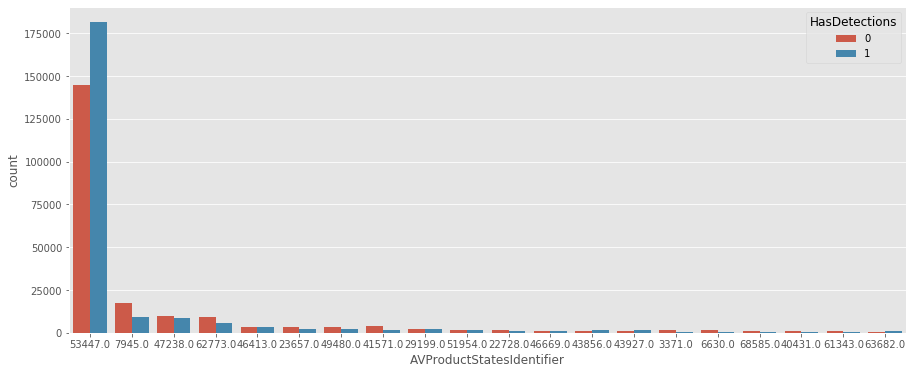

In [73]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='AVProductStatesIdentifier', hue='HasDetections', order=pd.value_counts(df['AVProductStatesIdentifier']).iloc[:20].index)

In [74]:
df.pivot_table(index='AVProductStatesIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                          HasDetections HasDetections HasDetections
AVProductStatesIdentifier                                          
53,447.00                        326463        181517          0.56
7,945.00                          26642          9356          0.35
47,238.00                         18436          8525          0.46
62,773.00                         14931          5672          0.38
46,413.00                          6343          3109          0.49
23,657.00                          5717          2382          0.42
49,480.00                          5684          2298          0.40
41,571.00                          5472          1643          0.30
29,199.00                          4164          2007          0.48
51,954.00                          3695          1888          0.51
22,728.00                          2579          1117          0.43
46,669.00                          2572          1330          0.52
43,856.00                          2525          1509          0.60
43,927.00                          2424          1432          0.59
3,371.00                           2239           758          0.34
6,630.00                           1949           544          0.28
68,585.00                          1712           710          0.41
40,431.00                          1544           463          0.30
61,343.00                          1516           483          0.32
63,682.00                          1356          1091          0.80

No se si identifica tipos de antivirus, pero parece que el más usado representa más riesgo que los demás. 

In [75]:
df['AVProductStatesIdentifier'].value_counts(normalize=True, dropna=False).head(20)

53,447.00   0.65
7,945.00    0.05
47,238.00   0.04
62,773.00   0.03
46,413.00   0.01
23,657.00   0.01
49,480.00   0.01
41,571.00   0.01
29,199.00   0.01
51,954.00   0.01
22,728.00   0.01
46,669.00   0.01
43,856.00   0.01
43,927.00   0.00
3,371.00    0.00
6,630.00    0.00
nan         0.00
68,585.00   0.00
40,431.00   0.00
61,343.00   0.00
Name: AVProductStatesIdentifier, dtype: float64

In [76]:
df['AVProductStatesIdentifier'].nunique()

5516

Probemos reduciendo los valores de muy baja frequencia. 

In [77]:
list = (df['AVProductStatesIdentifier'].value_counts(dropna=True).values > 400)
len(list[list==True])


45

In [78]:
list_1 = df['AVProductStatesIdentifier'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['AVProductStatesIdentifier'].isin(list_1)==False, 'AVProductStatesIdentifier'] = 'resto'

In [79]:
df['AVProductStatesIdentifier'].fillna(value='-999', inplace=True)

In [80]:
df['AVProductStatesIdentifier'] = df['AVProductStatesIdentifier'].astype(str)

##### Atributo AVProductsInstalled

Atributo numérico. Número de antivirus instalados. 

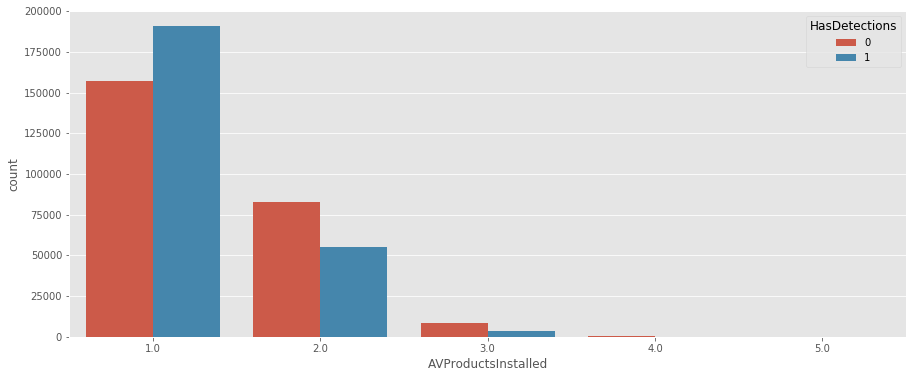

In [81]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='AVProductsInstalled', hue='HasDetections', order=pd.value_counts(df['AVProductsInstalled']).iloc[:20].index)

In [82]:
df.pivot_table(index='AVProductsInstalled', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                    HasDetections HasDetections HasDetections
AVProductsInstalled                                          
1.00                       348046        190800          0.55
2.00                       137856         54902          0.40
3.00                        11617          3378          0.29
4.00                          514           128          0.25
5.00                           29             4          0.14

Interesante ver como al tener dos antivirus la probabilidad de ataque baja. 

In [83]:
df['AVProductsInstalled'].value_counts(normalize=True, dropna=False)

1.00   0.70
2.00   0.28
3.00   0.02
nan    0.00
4.00   0.00
5.00   0.00
Name: AVProductsInstalled, dtype: float64

Existen outliers pero se dejan. La correlación con el target existe. 

In [84]:
df['AVProductsInstalled'].fillna(value=-999, inplace=True)

In [85]:
df['AVProductsInstalled'] = df['AVProductsInstalled'].astype(int)

##### Atributo AVProductsEnabled

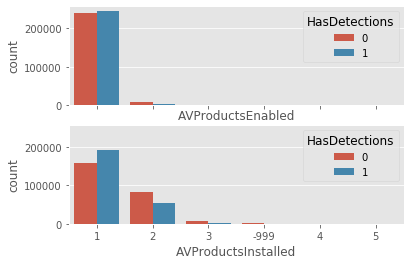

<Figure size 1080x1080 with 0 Axes>

In [86]:
fig, ax =plt.subplots(2, sharex=True, sharey=True)
plt.figure(figsize= [15, 15])
sns.countplot(data=df, x='AVProductsEnabled', hue='HasDetections', order=pd.value_counts(df['AVProductsEnabled']).iloc[:20].index, ax=ax[0])
sns.countplot(data=df, x='AVProductsInstalled', hue='HasDetections', order=pd.value_counts(df['AVProductsInstalled']).iloc[:20].index, ax=ax[1])

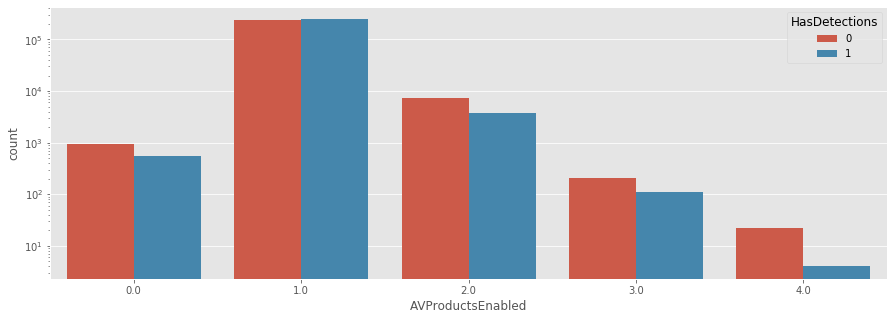

In [87]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='AVProductsEnabled', hue='HasDetections')   
ax.set_yscale('log')

Aunque hay mucha gente con dos antivirus, muy pocos tienen los dos funcionando. 

In [88]:
df['AVProductsEnabled'].value_counts(normalize=True, dropna=False)

1.00   0.97
2.00   0.02
nan    0.00
0.00   0.00
3.00   0.00
4.00   0.00
Name: AVProductsEnabled, dtype: float64

In [89]:
pd.crosstab(df['AVProductsEnabled'], df['AVProductsInstalled'])

AVProductsInstalled       1       2     3    4   5
AVProductsEnabled                                 
0.00                    826     564    75    2   0
1.00                 347220  129699  8034  222   4
2.00                      0    7593  3283  185  13
3.00                      0       0   225   86   5
4.00                      0       0     0   19   7

In [90]:
df['AVProductsEnabled'].fillna(value=-999, inplace=True)

In [91]:
df['AVProductsEnabled'] = df['AVProductsEnabled'].astype(int)

##### Atributo HasTpm

Valor booleano.

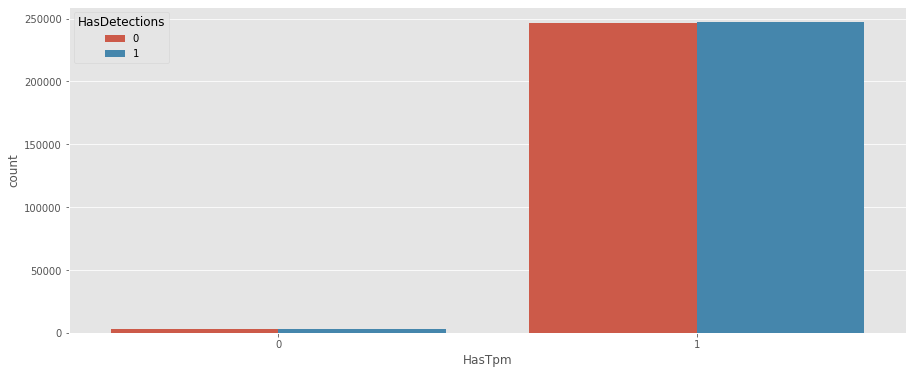

In [92]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='HasTpm', hue='HasDetections')

In [93]:
pd.crosstab(df['HasTpm'], df['HasDetections'])

HasDetections       0       1
HasTpm                       
0                3244    2848
1              246803  247105

Poca correlación. Pocos valores de 0. Se deja y no se cambia nada.

##### Atributo CountryIdentifier

Identificación de países. Es categórica.

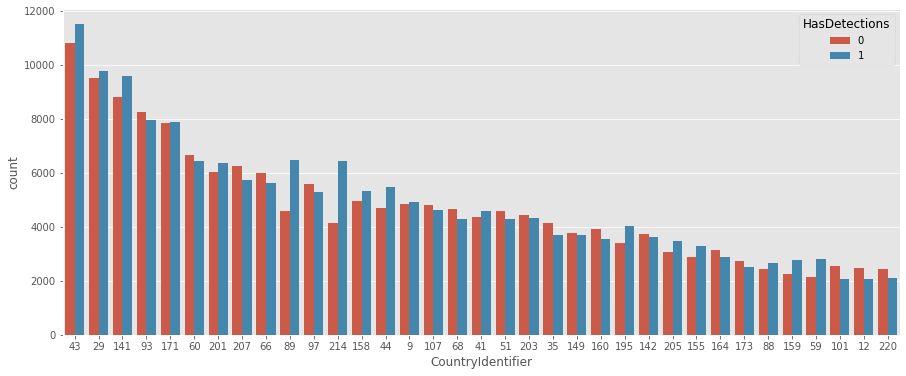

In [94]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='CountryIdentifier', hue='HasDetections', order=pd.value_counts(df['CountryIdentifier']).iloc[:35].index)

Hay países que muestran muchos más detección de malware que no detección. Lástima no saber cuales son. 

In [95]:
df.pivot_table(index='CountryIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                  HasDetections HasDetections HasDetections
CountryIdentifier                                          
43                        22339         11511          0.52
29                        19273          9775          0.51
141                       18420          9598          0.52
93                        16205          7947          0.49
171                       15743          7881          0.50
60                        13118          6440          0.49
201                       12405          6363          0.51
207                       11981          5734          0.48
66                        11607          5608          0.48
89                        11064          6491          0.59
97                        10883          5278          0.48
214                       10576          6446          0.61
158                       10302          5330          0.52
44                        10159          5469          0.54
9                          9763          4924          0.50
107                        9446          4621          0.49
68                         8950          4303          0.48
41                         8948          4590          0.51
51                         8868          4298          0.48
203                        8785          4345          0.49

Se agrupan los outliers con baja frequencia.

In [96]:
df['CountryIdentifier'].nunique()

222

In [97]:
list = (df['CountryIdentifier'].value_counts(dropna=True).values > 490)
len(list[list==True])

119

In [98]:
list_1 = df['CountryIdentifier'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['CountryIdentifier'].isin(list_1)==False, 'CountryIdentifier'] = 'resto'

In [99]:
df['CountryIdentifier'] = df['CountryIdentifier'].astype(str)

##### Atributo CityIdentifier

Identificación de ciudades. Es categórica.

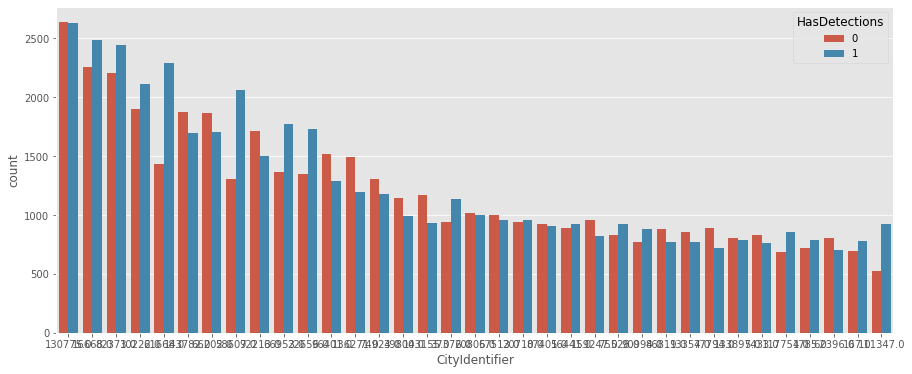

In [100]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='CityIdentifier', hue='HasDetections', order=pd.value_counts(df['CityIdentifier']).iloc[:35].index)

In [101]:
df.pivot_table(index='CityIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
               HasDetections HasDetections HasDetections
CityIdentifier                                          
130,775.00              5271          2633          0.50
16,668.00               4747          2490          0.52
82,373.00               4649          2444          0.53
10,222.00               4011          2114          0.53
61,668.00               3724          2288          0.61
143,782.00              3572          1695          0.47
66,202.00               3572          1708          0.48
58,607.00               3368          2065          0.61
92,213.00               3209          1498          0.47
66,953.00               3143          1776          0.57
22,656.00               3085          1734          0.56
96,401.00               2813          1291          0.46
136,271.00              2692          1199          0.45
74,924.00               2480          1178          0.47
39,800.00               2138           991          0.46
143,155.00              2099           931          0.44
37,376.00               2077          1136          0.55
20,805.00               2021          1004          0.50
67,513.00               1955           954          0.49
20,710.00               1900           961          0.51

In [102]:
df['CityIdentifier'].nunique()

37157

Agrupamos los valores con menos frequencia en un resto

In [103]:
list = (df['CityIdentifier'].value_counts(dropna=True).values > 490)
len(list[list==True])


151

In [104]:
list_1 = df['CityIdentifier'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['CityIdentifier'].isin(list_1)==False, 'CityIdentifier'] = 'resto'

Tiene muchos valores únicos.  Como hay mucha inf. en este caso no se va a agrupar y se aplicará el mean encoding.

In [105]:
df['CityIdentifier'].fillna(value='-999', inplace=True)

##### Atributo OrganizationIdentifier

Variable categórica que identifica la organización. 

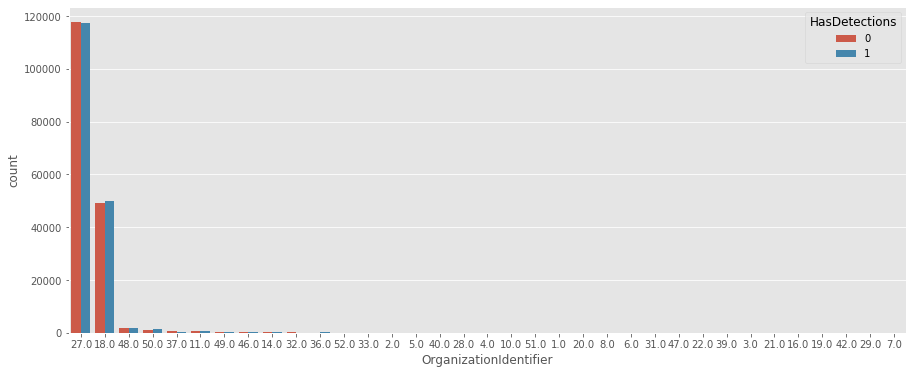

In [106]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OrganizationIdentifier', hue='HasDetections', order=pd.value_counts(df['OrganizationIdentifier']).iloc[:35].index)

Interesante ver que dos organizaciones superan el 60% de los valores. Igual, incluye la organización Home que todos se ponen cuando no eres empresa. Tiene poca correlación con el target este valor. 

In [107]:
df.pivot_table(index='OrganizationIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                       HasDetections HasDetections HasDetections
OrganizationIdentifier                                          
27.00                         234885        117224          0.50
18.00                          98842         49863          0.50
48.00                           3658          1885          0.52
50.00                           2538          1565          0.62
37.00                           1048           485          0.46
11.00                           1037           533          0.51
49.00                            747           365          0.49
46.00                            641           323          0.50
14.00                            255           119          0.47
32.00                            230           102          0.44
36.00                            207           116          0.56
52.00                            174            91          0.52
33.00                            171            75          0.44
2.00                             153            60          0.39
5.00                             110            49          0.45
40.00                            100            46          0.46
28.00                             98            42          0.43
4.00                              79            38          0.48
10.00                             69            29          0.42
51.00                             53            27          0.51

In [108]:
df['OrganizationIdentifier'].value_counts(dropna=True).sort_values(0, ascending=False).head(15)

27.00    234885
18.00     98842
48.00      3658
50.00      2538
37.00      1048
11.00      1037
49.00       747
46.00       641
14.00       255
32.00       230
36.00       207
52.00       174
33.00       171
2.00        153
5.00        110
Name: OrganizationIdentifier, dtype: int64

In [109]:
df['OrganizationIdentifier'].nunique()

44

Se agrupan los valores con muy baja frequencia

In [110]:
list = (df['OrganizationIdentifier'].value_counts(dropna=True).values > 100)
len(list[list==True])


15

In [111]:
list_1 = df['OrganizationIdentifier'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['OrganizationIdentifier'].isin(list_1)==False, 'OrganizationIdentifier'] = 'resto'

In [112]:
df['OrganizationIdentifier'].fillna(value='-999', inplace=True)

In [113]:
df['OrganizationIdentifier'] = df['OrganizationIdentifier'].astype(str)

##### Atributo GeoNameIdentifier

Atributo categórico con muchos valores únicos. Es un código que representa una región.

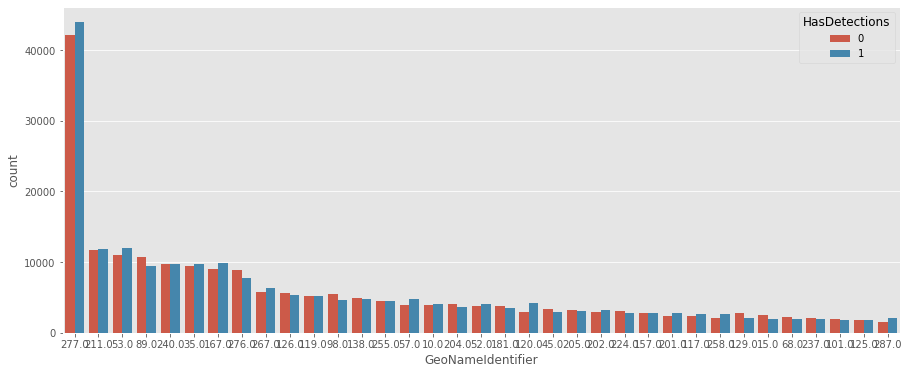

In [114]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='GeoNameIdentifier', hue='HasDetections', order=pd.value_counts(df['GeoNameIdentifier']).iloc[:35].index)

Existe cierta correlación con el target. 

In [115]:
df.pivot_table(index='GeoNameIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                  HasDetections HasDetections HasDetections
GeoNameIdentifier                                          
277.00                    86080         43944          0.51
211.00                    23593         11840          0.50
53.00                     22977         11994          0.52
89.00                     20174          9486          0.47
240.00                    19489          9772          0.50
35.00                     19144          9762          0.51
167.00                    18845          9827          0.52
276.00                    16600          7758          0.47
267.00                    12106          6284          0.52
126.00                    11028          5357          0.49
119.00                    10419          5198          0.50
98.00                     10234          4700          0.46
138.00                     9717          4755          0.49
255.00                     9008          4546          0.50
57.00                      8722          4745          0.54
10.00                      8008          4063          0.51
204.00                     7776          3696          0.48
52.00                      7764          4020          0.52
181.00                     7297          3550          0.49
120.00                     7104          4220          0.59

Se agrupan los valores con menos frequencia

In [116]:
df['GeoNameIdentifier'].nunique()

268

In [117]:
list = (df['GeoNameIdentifier'].value_counts(dropna=True).values > 490)
len(list[list==True])

84

In [118]:
list_1 = df['GeoNameIdentifier'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['GeoNameIdentifier'].isin(list_1)==False, 'GeoNameIdentifier'] = 'resto'

In [119]:
df['GeoNameIdentifier'].fillna(value='-999', inplace=True)

In [120]:
df['GeoNameIdentifier'] = df['GeoNameIdentifier'].astype(str)

##### Atributo LocaleEnglishNameIdentifier

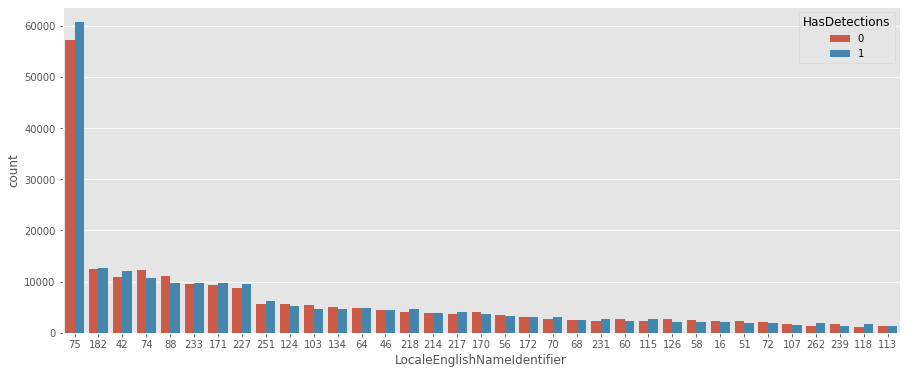

In [121]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='LocaleEnglishNameIdentifier', hue='HasDetections', order=pd.value_counts(df['LocaleEnglishNameIdentifier']).iloc[:35].index)

Se puede ver la correlación con el target.

In [122]:
df.pivot_table(index='LocaleEnglishNameIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                            HasDetections HasDetections HasDetections
LocaleEnglishNameIdentifier                                          
75                                 117818         60664          0.51
182                                 25187         12718          0.50
42                                  23007         12036          0.52
74                                  22894         10720          0.47
88                                  20988          9802          0.47
233                                 19225          9662          0.50
171                                 19027          9719          0.51
227                                 18427          9626          0.52
251                                 11889          6194          0.52
124                                 10843          5274          0.49
103                                 10035          4608          0.46
134                                  9700          4740          0.49
64                                   9526          4746          0.50
46                                   8994          4540          0.50
218                                  8676          4708          0.54
214                                  7782          3949          0.51
217                                  7686          3982          0.52
170                                  7680          3652          0.48
56                                   6809          3326          0.49
172                                  6270          3104          0.50

In [123]:
df['LocaleEnglishNameIdentifier'].nunique()

233

La correalación con el target es baja. Agruparemos las variables de menor frequencia.

In [124]:
list = (df['LocaleEnglishNameIdentifier'].value_counts(dropna=True).values > 490)
len(list[list==True])

74

In [125]:
list_1 = df['LocaleEnglishNameIdentifier'].value_counts(dropna=True).head(107).index
df.loc[df['LocaleEnglishNameIdentifier'].isin(list_1)==False, 'LocaleEnglishNameIdentifier'] = 'resto'

In [126]:
df['LocaleEnglishNameIdentifier'].fillna(value='-999', inplace=True)

In [127]:
df['LocaleEnglishNameIdentifier'] = df['LocaleEnglishNameIdentifier'].astype(str)

##### Atributo Platform

Categórica que especifica el sistema operativo. 

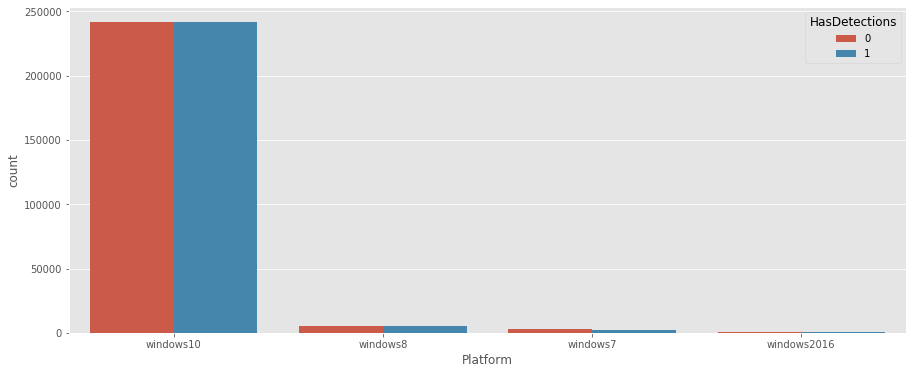

In [128]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Platform', hue='HasDetections', order=pd.value_counts(df['Platform']).iloc[:35].index)

In [129]:
df.pivot_table(index='Platform', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
            HasDetections HasDetections HasDetections
Platform                                             
windows10          483048        241476          0.50
windows8            10825          5614          0.52
windows7             5314          2562          0.48
windows2016           813           301          0.37

Se ve que Windows10 es casi la única opción utilizada actualmente como sistema operativo de microsoft. También se ve una muy baja correlación con el target. Se deja como está.

Sería interesante ver la comparativa con los ordenadores Mac. 

Este atributo no creo que agregue ninguna información interesante al modelo.

##### Atributo Processor

Tipo de OS relacionado con procesador. Categórica. 

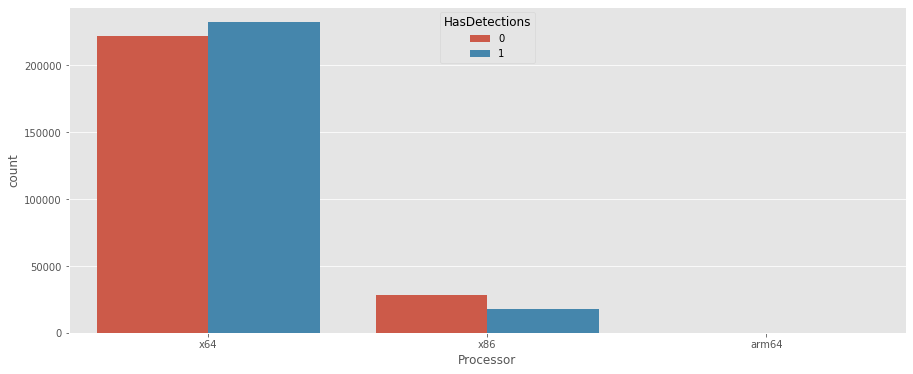

In [130]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Processor', hue='HasDetections', order=pd.value_counts(df['Processor']).iloc[:35].index)

Existe una correlación interesante. x64 tiene más detecciones que no detecciones a diferencia de x86. Investigando,
ARM es el procesador de moviles, lo cual indica también que los OS de moviles no es el negocio de Microsoft.

Se deja la variable ARM porque es interesante ver la correlación en móviles.

In [131]:
df.pivot_table(index='Processor', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
          HasDetections HasDetections HasDetections
Processor                                          
x64              454423        232321          0.51
x86               45563         17632          0.39
arm64                14             0          0.00

Parece muy claro aquí que x86 es más seguro, pero también se debe a la gran cantidad de 64x

##### Atributo OsVer

Atributo categórico de la versión del sistema operativo. 

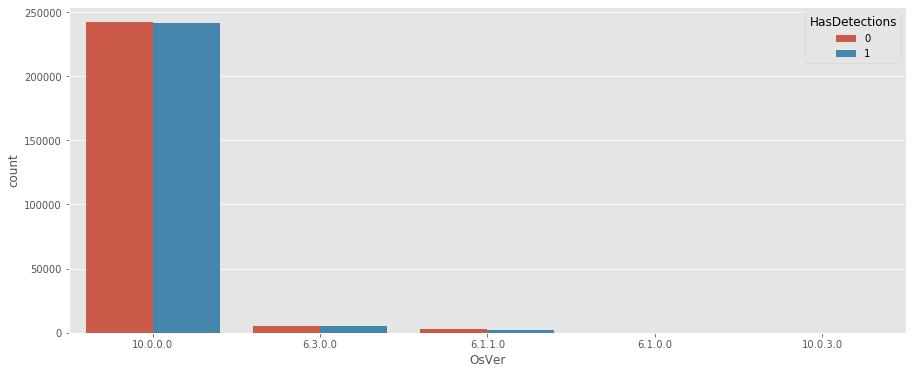

In [132]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OsVer', hue='HasDetections', order=pd.value_counts(df['OsVer']).iloc[:5].index)

In [133]:
df.pivot_table(index='OsVer', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(10)

len           sum          mean
           HasDetections HasDetections HasDetections
OsVer                                               
10.0.0.0          483830        241755          0.50
6.3.0.0            10818          5612          0.52
6.1.1.0             5281          2552          0.48
6.1.0.0               33            10          0.30
10.0.3.0              12             9          0.75
10.0.1.0               7             5          0.71
6.3.3.0                2             0          0.00
10.0.32.72             2             0          0.00
6.3.1.0                2             1          0.50
10.0.0.1               2             2          1.00

In [134]:
df['OsVer'].nunique()

21

In [135]:
df['OsVer'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

10.0.0.0      483830
6.3.0.0        10818
6.1.1.0         5281
6.1.0.0           33
10.0.3.0          12
10.0.1.0           7
10.0.32.72         2
6.3.1.0            2
10.0.0.1           2
6.3.3.0            2
10.0.0.112         1
10.0.8.0           1
6.3.5.0            1
10.0.2.0           1
10.0.5.0           1
6.3.32.72          1
10.0.4.0           1
10.0.80.0          1
10.0.7.0           1
6.3.7.0            1
Name: OsVer, dtype: int64

Viendo que hay varios datos con frequencia super baja y la correlación general no muestra mucha importancia, vale la pena practicar una agrupación X.X
Eso nos dejaría con 10.0, 6.3, 6.1.

In [136]:
to_replace = ['10.0', '6.3', '6.1']

In [137]:
n_OsVer = []
for i in df.index:
    if '10.0' in df.at[i,'OsVer']:
        n_OsVer.append('10.0')
    elif '6.3' in df.at[i,'OsVer']:
        n_OsVer.append('6.3')
    elif '6.1' in df.at[i,'OsVer']:
        n_OsVer.append('6.1')
    else:
        n_OsVer.append('other')

In [138]:
sn_OsVer=pd.Series(n_OsVer, name='OsVer')

In [139]:
sn_OsVer.nunique()

3

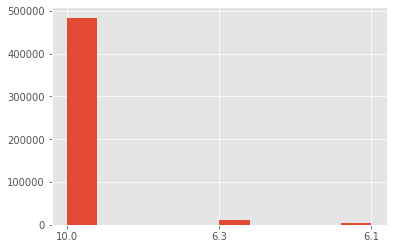

In [140]:
sn_OsVer.hist()

In [141]:
sn_OsVer.head(4)

0    10.0
1    10.0
2    10.0
3    10.0
Name: OsVer, dtype: object

In [142]:
df.drop(columns='OsVer', inplace=True)

In [143]:
df['OsVer'] = sn_OsVer

In [144]:
df['OsVer'].head(2)

0    10.0
1    10.0
Name: OsVer, dtype: object

In [145]:
df['OsVer'].nunique()

3

In [146]:
df['OsVer'].isnull().sum()

0

##### Atributo Osbuild

Atributo categórico de builds de OS.

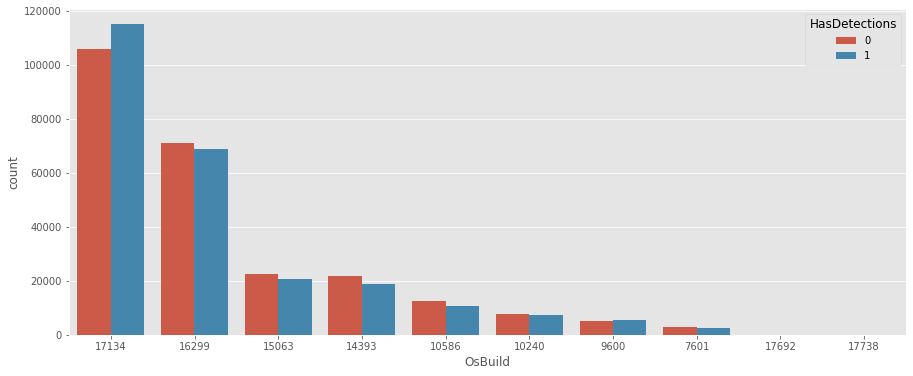

In [147]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OsBuild', hue='HasDetections', order=pd.value_counts(df['OsBuild']).iloc[:10].index)

In [148]:
df.pivot_table(index='OsBuild', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(10)

len           sum          mean
        HasDetections HasDetections HasDetections
OsBuild                                          
17134          220779        114996          0.52
16299          139901         68735          0.49
15063           43352         20778          0.48
14393           40717         18848          0.46
10586           22955         10608          0.46
10240           15014          7309          0.49
9600            10825          5614          0.52
7601             5281          2552          0.48
17692             155            81          0.52
17738             134            59          0.44

Al parecer el último OsBuild es algo más inseguro

In [149]:
df['OsBuild'].nunique()

48

In [150]:
df['OsBuild'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

17134    220779
16299    139901
15063     43352
14393     40717
10586     22955
10240     15014
9600      10825
7601       5281
17692       155
17738       134
17744       129
17758        86
17746        62
17713        60
17754        56
17751        53
17741        51
17755        45
17735        37
17686        36
Name: OsBuild, dtype: int64

Agrupación de outliers

In [151]:
list = (df['OsBuild'].value_counts(dropna=True).values > 100)
len(list[list==True])

11

In [152]:
list_1 = df['OsBuild'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['OsBuild'].isin(list_1)==False, 'OsBuild'] = 'resto'

In [153]:
df['OsBuild'] = df['OsBuild'].astype(str)

In [154]:
df['OsBuild'].isnull().sum()

0

##### Atributo OsSuite

Atributo categórico. No tan seguro pero parece que si. 

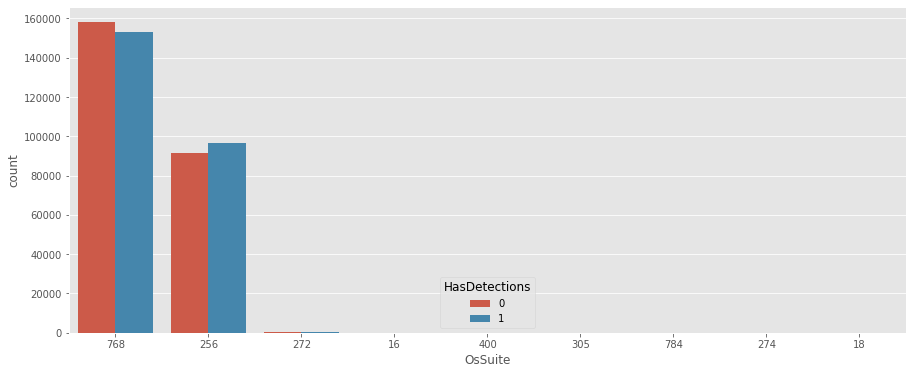

In [155]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OsSuite', hue='HasDetections', order=pd.value_counts(df['OsSuite']).iloc[:10].index)

In [156]:
df.pivot_table(index='OsSuite', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(10)

len           sum          mean
        HasDetections HasDetections HasDetections
OsSuite                                          
768            311226        153185          0.49
256            187951         96463          0.51
272               677           238          0.35
16                 53            33          0.62
400                47            15          0.32
305                33            13          0.39
784                10             4          0.40
274                 2             1          0.50
18                  1             1          1.00

In [157]:
df['OsSuite'].nunique()

9

In [158]:
df['OsSuite'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

768    311226
256    187951
272       677
16         53
400        47
305        33
784        10
274         2
18          1
Name: OsSuite, dtype: int64

In [159]:
list = (df['OsSuite'].value_counts(dropna=True).values > 100)
len(list[list==True])

3

In [160]:
list_1 = df['OsSuite'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['OsSuite'].isin(list_1)==False, 'OsSuite'] = 'resto'

In [161]:
df['OsSuite'] = df['OsSuite'].astype(str)

In [162]:
df['OsSuite'].isnull().sum()

0

##### Atributo OsPlatformSubRelease

Atributo categórico. Returns the OS Platform sub-release 

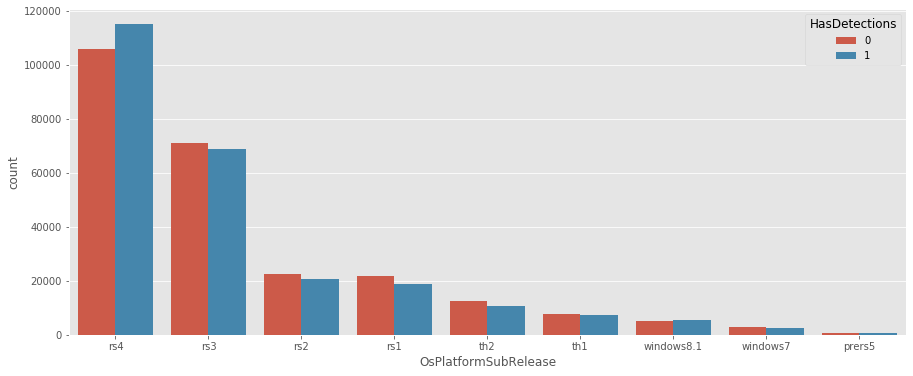

In [163]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OsPlatformSubRelease', hue='HasDetections', order=pd.value_counts(df['OsPlatformSubRelease']).iloc[:10].index)

In [164]:
df.pivot_table(index='OsPlatformSubRelease', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(10)

len           sum          mean
                     HasDetections HasDetections HasDetections
OsPlatformSubRelease                                          
rs4                         220779        114996          0.52
rs3                         139901         68735          0.49
rs2                          43352         20778          0.48
rs1                          40717         18848          0.46
th2                          22955         10608          0.46
th1                          15014          7309          0.49
windows8.1                   10825          5614          0.52
windows7                      5314          2562          0.48
prers5                        1143           503          0.44

In [165]:
df['OsPlatformSubRelease'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

rs4           220779
rs3           139901
rs2            43352
rs1            40717
th2            22955
th1            15014
windows8.1     10825
windows7        5314
prers5          1143
Name: OsPlatformSubRelease, dtype: int64

Existe correlación y todo parece bien

##### Atributo OsBuildLab

Atributo categórico. Build lab that generated the current OS

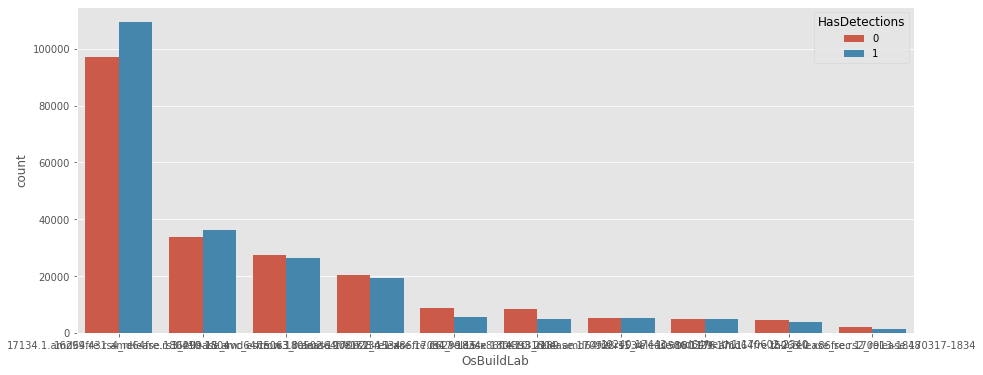

In [166]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OsBuildLab', hue='HasDetections', order=pd.value_counts(df['OsBuildLab']).iloc[:10].index)

In [167]:
df.pivot_table(index='OsBuildLab', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len  \
                                                   HasDetections   
OsBuildLab                                                         
17134.1.amd64fre.rs4_release.180410-1804                  206436   
16299.431.amd64fre.rs3_release_svc_escrow.18050...         69884   
16299.15.amd64fre.rs3_release.170928-1534                  53826   
15063.0.amd64fre.rs2_release.170317-1834                   39908   
17134.1.x86fre.rs4_release.180410-1804                     14334   
16299.15.x86fre.rs3_release.170928-1534                    13105   
14393.2189.amd64fre.rs1_release.180329-1711                10724   
10240.17443.amd64fre.th1.170602-2340                        9538   
10586.1176.amd64fre.th2_release_sec.170913-1848             8385   
15063.0.x86fre.rs2_release.170317-1834                      3444   
14393.0.amd64fre.rs1_release.160715-1616                    3239   
9600.19067.amd64fre.winblue_ltsb_escrow.180619-...          3160   
9600.19101.amd64fre.winblue_ltsb_escrow.180718-...          3139   
16299.637.amd64fre.rs3_release_svc.180808-1748              2439   
14393.2189.x86fre.rs1_release.180329-1711                   2231   
10586.1176.x86fre.th2_release_sec.170913-1848               2005   
14393.693.amd64fre.rs1_release.161220-1747                  2001   
10240.17443.x86fre.th1.170602-2340                          1847   
14393.2214.amd64fre.rs1_release_1.180402-1758               1702   
10586.0.amd64fre.th2_release.151029-1700                    1491   

                                                             sum          mean  
                                                   HasDetections HasDetections  
OsBuildLab                                                                      
17134.1.amd64fre.rs4_release.180410-1804                  109335          0.53  
16299.431.amd64fre.rs3_release_svc_escrow.18050...         36047          0.52  
16299.15.amd64fre.rs3_release.170928-1534                  26378          0.49  
15063.0.amd64fre.rs2_release.170317-1834                   19454          0.49  
17134.1.x86fre.rs4_release.180410-1804                      5661          0.39  
16299.15.x86fre.rs3_release.170928-1534                     4810          0.37  
14393.2189.amd64fre.rs1_release.180329-1711                 5393          0.50  
10240.17443.amd64fre.th1.170602-2340                        4758          0.50  
10586.1176.amd64fre.th2_release_sec.170913-1848             3778          0.45  
15063.0.x86fre.rs2_release.170317-1834                      1324          0.38  
14393.0.amd64fre.rs1_release.160715-1616                    1681          0.52  
9600.19067.amd64fre.winblue_ltsb_escrow.180619-...          1879          0.59  
9600.19101.amd64fre.winblue_ltsb_escrow.180718-...          1796          0.57  
16299.637.amd64fre.rs3_release_svc.180808-1748              1231          0.50  
14393.2189.x86fre.rs1_release.180329-1711                    854          0.38  
10586.1176.x86fre.th2_release_sec.170913-1848                798          0.40  
14393.693.amd64fre.rs1_release.161220-1747                   917          0.46  
10240.17443.x86fre.th1.170602-2340                           761          0.41  
14393.2214.amd64fre.rs1_release_1.180402-1758                894          0.53  
10586.0.amd64fre.th2_release.151029-1700                     825          0.55

In [168]:
df['OsBuildLab'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

17134.1.amd64fre.rs4_release.180410-1804                    206436
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908        69884
16299.15.amd64fre.rs3_release.170928-1534                    53826
15063.0.amd64fre.rs2_release.170317-1834                     39908
17134.1.x86fre.rs4_release.180410-1804                       14334
16299.15.x86fre.rs3_release.170928-1534                      13105
14393.2189.amd64fre.rs1_release.180329-1711                  10724
10240.17443.amd64fre.th1.170602-2340                          9538
10586.1176.amd64fre.th2_release_sec.170913-1848               8385
15063.0.x86fre.rs2_release.170317-1834                        3444
14393.0.amd64fre.rs1_release.160715-1616                      3239
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033           3160
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800           3139
16299.637.amd64fre.rs3_release_svc.180808-1748                2439
14393.2189.x86fre.rs1_release.180329-1711                     

In [169]:
df['OsBuildLab'].nunique()

453

Aunque parece muy incomodo de leer, es dificil agrupar porque hay demasiada información. Pero si hay muchos valores con baja frequencia que se pueden agrupar en un resto. 

In [170]:
list = (df['OsBuildLab'].value_counts(dropna=True).values > 490)
len(list[list==True])


51

In [171]:
list_1 = df['OsBuildLab'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['OsBuildLab'].isin(list_1)==False, 'OsBuildLab'] = 'resto'

In [172]:
df['OsBuildLab'] = df['OsBuildLab'].astype(str)

In [173]:
df['OsBuildLab'].fillna(value='-999', inplace=True)

##### Atributo SkuEdition

Atributo categórico- The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting

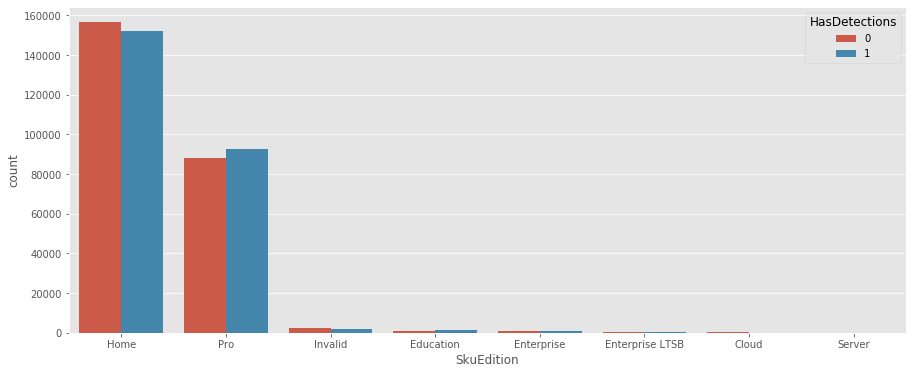

In [174]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='SkuEdition', hue='HasDetections', order=pd.value_counts(df['SkuEdition']).iloc[:10].index)

In [175]:
df.pivot_table(index='SkuEdition', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                HasDetections HasDetections HasDetections
SkuEdition                                               
Home                   308567        152007          0.49
Pro                    181042         92853          0.51
Invalid                  4423          2069          0.47
Education                2321          1202          0.52
Enterprise               1999          1035          0.52
Enterprise LTSB          1141           614          0.54
Cloud                     309           121          0.39
Server                    198            52          0.26

A simple vista parece que la edición pro tiene mas riesgo de malware. Education y Enterprise también.

In [176]:
df['SkuEdition'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Home               308567
Pro                181042
Invalid              4423
Education            2321
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: SkuEdition, dtype: int64

##### Atributo IsProtected

Atributo booleano. This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected

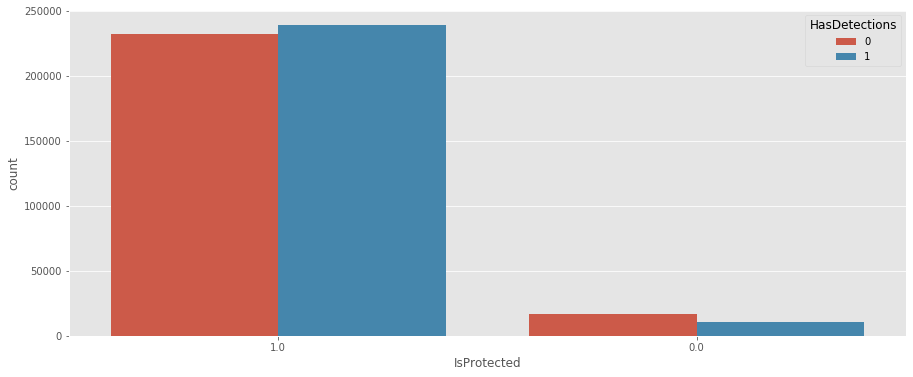

In [177]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='IsProtected', hue='HasDetections', order=pd.value_counts(df['IsProtected']).iloc[:10].index)

Parece que no tenemos que estar protegidos. Interesante

In [178]:
df['IsProtected'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00    471073
0.00     27001
nan       1926
Name: IsProtected, dtype: int64

Para quitar los nulos se usará la moda.

In [179]:
df['IsProtected'].fillna(value=-1, inplace=True)

In [180]:
df['IsProtected'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00     471073
0.00      27001
-1.00      1926
Name: IsProtected, dtype: int64

##### Atributo SMode

Atributo booleano. This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed

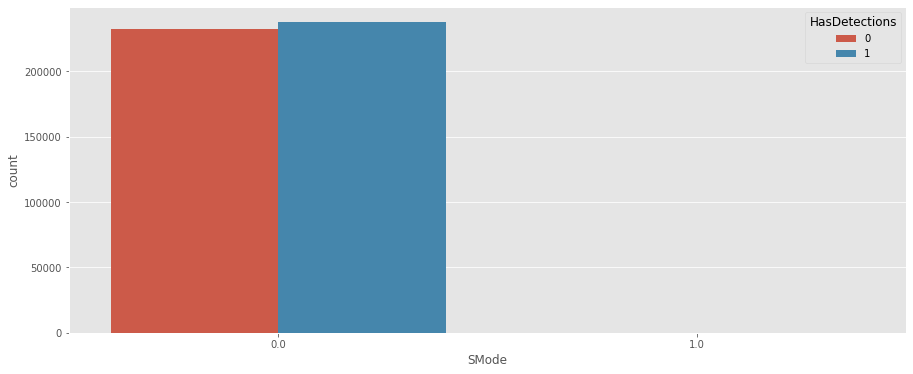

In [181]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='SMode', hue='HasDetections', order=pd.value_counts(df['SMode']).iloc[:10].index)

In [182]:
df['SMode'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    469946
nan      29848
1.00       206
Name: SMode, dtype: int64

In [183]:
pd.crosstab(df['SMode'], df['HasDetections'], normalize=False).sort_values(0, ascending=False)

HasDetections       0       1
SMode                        
0.00           232495  237451
1.00              169      37

No borro esta columna solo porque usaremos decision-tree, pero me incomoda.

In [184]:
df['SMode'].fillna(value=-1, inplace=True)

In [185]:
df['SMode'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00     469946
-1.00     29848
1.00        206
Name: SMode, dtype: int64

##### Atributo IeVerIdentifier

Atributo categórico. Sin información. Es una identificación de algo. 

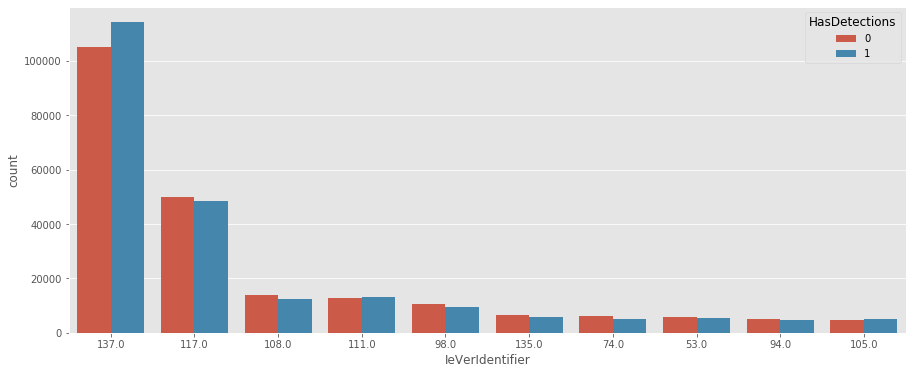

In [186]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='IeVerIdentifier', hue='HasDetections', order=pd.value_counts(df['IeVerIdentifier']).iloc[:10].index)

In [187]:
df.pivot_table(index='IeVerIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                HasDetections HasDetections HasDetections
IeVerIdentifier                                          
137.00                 219142        114170          0.52
117.00                  98667         48613          0.49
108.00                  26353         12540          0.48
111.00                  26143         13211          0.51
98.00                   19731          9323          0.47
135.00                  12314          5780          0.47
74.00                   11395          5065          0.44
53.00                   11352          5503          0.48
94.00                    9715          4530          0.47
105.00                   9695          4938          0.51
333.00                   8751          4714          0.54
107.00                   7080          3195          0.45
103.00                   6364          2840          0.45
96.00                    4695          2057          0.44
76.00                    3242          1614          0.50
71.00                    2275          1198          0.53
41.00                    1918           926          0.48
114.00                   1862           661          0.35
323.00                   1814           715          0.39
335.00                   1422           730          0.51

In [188]:
df['IeVerIdentifier'].nunique()

179

In [189]:
df['IeVerIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

137.00    219142
117.00     98667
108.00     26353
111.00     26143
98.00      19731
135.00     12314
74.00      11395
53.00      11352
94.00       9715
105.00      9695
333.00      8751
107.00      7080
103.00      6364
96.00       4695
76.00       3242
nan         3209
71.00       2275
41.00       1918
114.00      1862
323.00      1814
335.00      1422
334.00      1356
87.00        936
81.00        809
78.00        655
73.00        615
82.00        571
337.00       540
42.00        502
302.00       413
85.00        399
84.00        355
91.00        310
72.00        263
92.00        262
86.00        258
68.00        258
332.00       254
88.00        246
90.00        228
44.00        181
327.00       150
163.00       135
180.00       131
295.00       128
185.00       126
331.00       107
325.00       106
64.00        103
49.00         92
65.00         84
199.00        83
45.00         77
288.00        77
52.00         73
322.00        71
307.00        68
311.00        63
186.00        

Vamos a agrupar los valores con muy baja frequencia.

In [190]:
list = (df['IeVerIdentifier'].value_counts(dropna=True).values > 100)
len(list[list==True])

48

In [191]:
list_1 = df['IeVerIdentifier'].value_counts(dropna=True).head(62).index
df.loc[df['IeVerIdentifier'].isin(list_1)==False, 'IeVerIdentifier'] = 'resto'

In [192]:
df['IeVerIdentifier'].fillna(value=-999, inplace=True)

In [193]:
df['IeVerIdentifier'].isnull().sum()

0

In [194]:
df['IeVerIdentifier'] = df['IeVerIdentifier'].astype(str)

##### Atributo SmartScreen

Atributo categorico. This is the SmartScreen enabled string value from registry. This is obtained by checking in order.  SmartScreen es un componente anti-phishing y anti-malware basado en la nube incluido en varios productos de Microsoft HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.

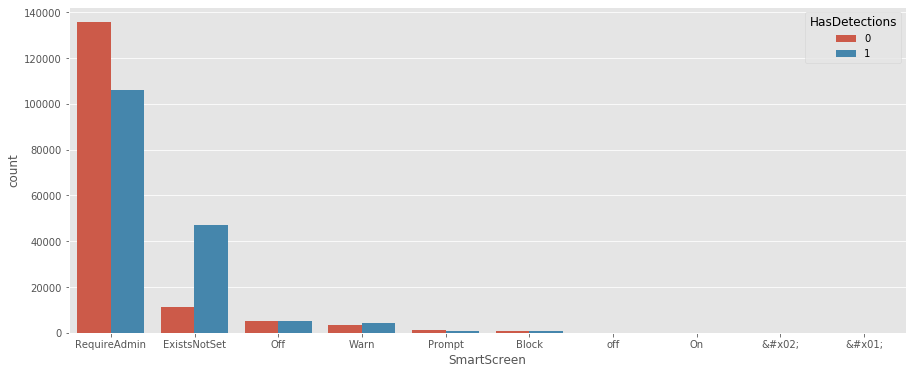

In [195]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='SmartScreen', hue='HasDetections', order=pd.value_counts(df['SmartScreen']).iloc[:10].index)

Es un valor con una gran correlación. ExistsNotSet tiene muchas detecciones respecto a la población. 

If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.

In [196]:
df['SmartScreen'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

RequireAdmin    241594
NaN             178596
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: SmartScreen, dtype: int64

In [197]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'ExistsNotSet' 
}
df.replace({'SmartScreen': trans_dict}, inplace=True)

Un atributo muy importante. Asumir que los nan son ExistsNotSet quita del primer lugar en el decisión-tree a esta variable. En el Kaggle muchos no unen los valores null con ExistsNotSet aunque lo diga Microsoft. 

In [198]:
df['SmartScreen'].isnull().sum()

0

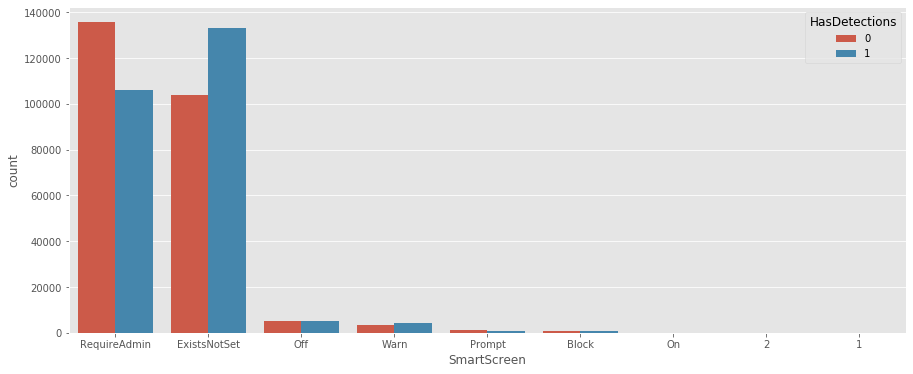

In [199]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='SmartScreen', hue='HasDetections', order=pd.value_counts(df['SmartScreen']).iloc[:10].index)

##### Atributo Firewall

Atributo booleano. Representa si es True un firewall funcionando. 

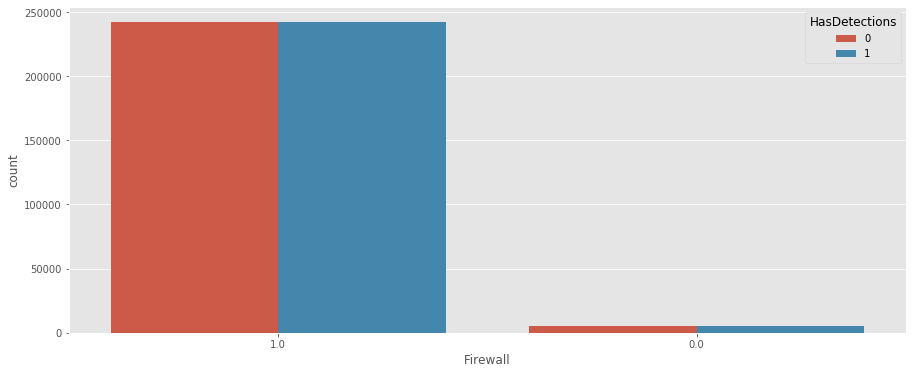

In [200]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Firewall', hue='HasDetections', order=pd.value_counts(df['Firewall']).iloc[:10].index)

In [201]:
df['Firewall'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00    484071
0.00     10767
nan       5162
Name: Firewall, dtype: int64

In [202]:
pd.crosstab(df['Firewall'], df['HasDetections'], normalize=False).sort_values(0, ascending=False)

HasDetections       0       1
Firewall                     
1.00           241965  242106
0.00             5459    5308

Tiene una correlación mínima. Es un valor que borraría en otros casos. 

In [203]:
df['Firewall'].fillna(value=-1, inplace=True)

In [204]:
df['Firewall'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00     484071
0.00      10767
-1.00      5162
Name: Firewall, dtype: int64

##### Atributo UacLuaenable

Atributo booleano pero con valores diferes de 0 y 1. This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. 
El objetivo de UAC es mejorar la seguridad de Windows al impedir que aplicaciones maliciosas hagan cambios no autorizados en el ordenador. 

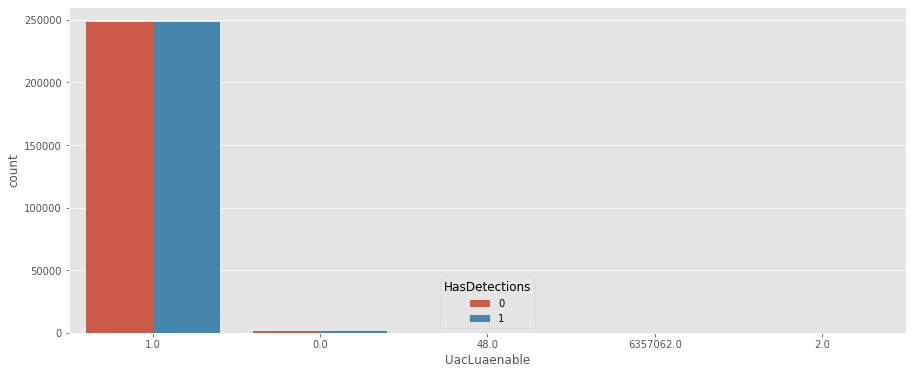

In [205]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='UacLuaenable', hue='HasDetections', order=pd.value_counts(df['UacLuaenable']).iloc[:10].index)

Valor con casi ninguna correlación del target. 

In [206]:
df['UacLuaenable'].nunique()

5

In [207]:
pd.crosstab(df['UacLuaenable'], df['HasDetections'], normalize=False).sort_values(0, ascending=False)

HasDetections       0       1
UacLuaenable                 
1.00           248161  248115
0.00             1590    1496
48.00               3      10
2.00                0       1
6,357,062.00        0       1

In [208]:
df['UacLuaenable'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00            496276
0.00              3086
nan                623
48.00               13
6,357,062.00         1
2.00                 1
Name: UacLuaenable, dtype: int64

Termino de convertir la columna en booleana.

In [209]:
df.loc[df['UacLuaenable'] == 48.00 , 'UacLuaenable'] = -1

In [210]:
df.loc[df['UacLuaenable'] == 2.00 , 'UacLuaenable'] = -1

In [211]:
df.loc[df['UacLuaenable'] == 6357062.00 , 'UacLuaenable'] = -1

In [212]:
df['UacLuaenable'].fillna(value=-1, inplace=True)

In [213]:
df['UacLuaenable'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00     496276
0.00       3086
-1.00       638
Name: UacLuaenable, dtype: int64

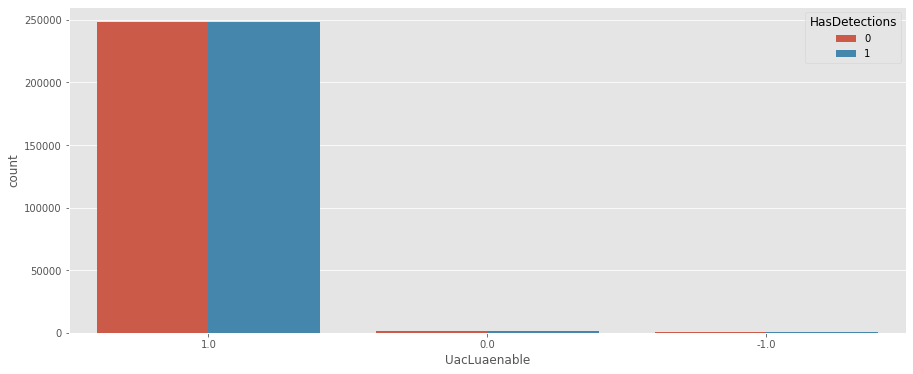

In [214]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='UacLuaenable', hue='HasDetections', order=pd.value_counts(df['UacLuaenable']).iloc[:10].index)

##### Atributo Census_MDC2FormFactor

Atributo categórico. A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. 

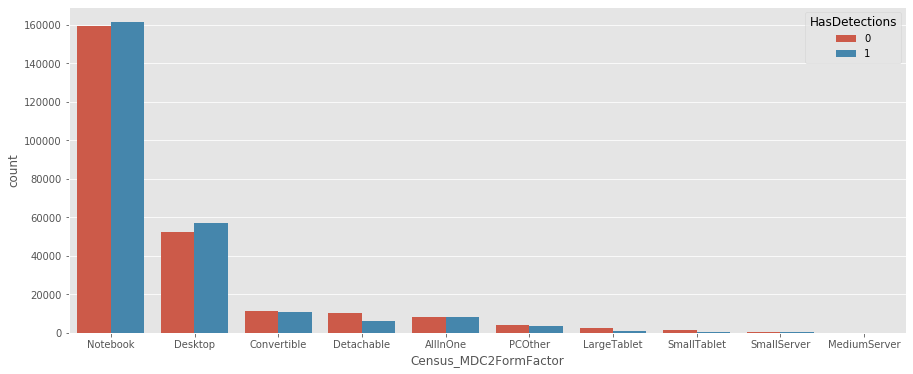

In [215]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_MDC2FormFactor', hue='HasDetections', order=pd.value_counts(df['Census_MDC2FormFactor']).iloc[:10].index)

In [216]:
df.pivot_table(index='Census_MDC2FormFactor', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                      HasDetections HasDetections HasDetections
Census_MDC2FormFactor                                          
Notebook                     320948        161411          0.50
Desktop                      109527         57306          0.52
Convertible                   22369         11025          0.49
Detachable                    16802          6351          0.38
AllInOne                      16372          8384          0.51
PCOther                        7800          3715          0.48
LargeTablet                    3645          1138          0.31
SmallTablet                    1797           360          0.20
SmallServer                     496           191          0.39
MediumServer                    192            62          0.32
LargeServer                      50            10          0.20
ServerOther                       2             0          0.00

Actualmente se ve que la mayoría usa Notebook. El Desktop desciende en uso. Desktop también parece tener algo más de riesgo. 

In [217]:
df['Census_MDC2FormFactor'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Notebook        320948
Desktop         109527
Convertible      22369
Detachable       16802
AllInOne         16372
PCOther           7800
LargeTablet       3645
SmallTablet       1797
SmallServer        496
MediumServer       192
LargeServer         50
ServerOther          2
Name: Census_MDC2FormFactor, dtype: int64

In [218]:
df['Census_MDC2FormFactor'] = df['Census_MDC2FormFactor'].astype(str)

##### Atributo Census_DeviceFamily

Atributo categórico. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone

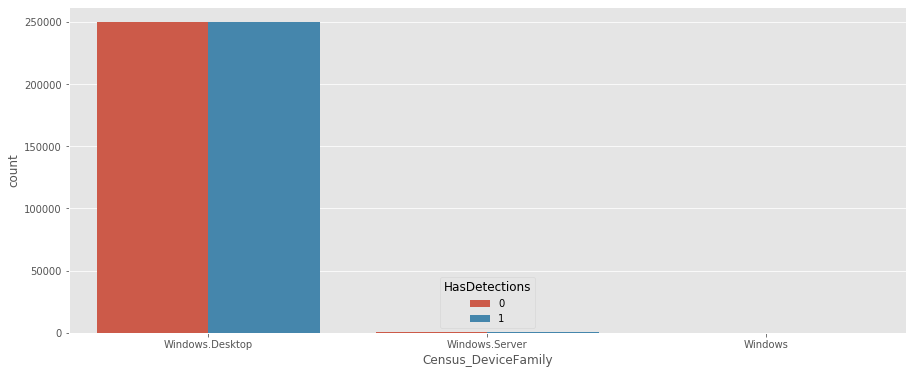

In [219]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_DeviceFamily', hue='HasDetections', order=pd.value_counts(df['Census_DeviceFamily']).iloc[:10].index)

La correlación con el target es casi nula. 

In [220]:
df['Census_DeviceFamily'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Windows.Desktop    499183
Windows.Server        816
Windows                 1
Name: Census_DeviceFamily, dtype: int64

In [221]:
df.loc[df['Census_DeviceFamily'] == 'Windows' , 'Census_DeviceFamily'] = df['Census_DeviceFamily'].mode()[0]

In [222]:
df['Census_DeviceFamily'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Windows.Desktop    499184
Windows.Server        816
Name: Census_DeviceFamily, dtype: int64

Esta columna podría ser booleana facilmente sin usar OHE

In [223]:
df['Census_DeviceFamily_IsDesktop'] = (df['Census_DeviceFamily'] == 'Windows.Desktop')

In [224]:
df['Census_DeviceFamily_IsDesktop']  = np.multiply(df['Census_DeviceFamily_IsDesktop'], 1)

In [225]:
df['Census_DeviceFamily_IsDesktop'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1    499184
0       816
Name: Census_DeviceFamily_IsDesktop, dtype: int64

In [226]:
df.drop('Census_DeviceFamily', axis=1, inplace=True)

In [227]:
df['Census_DeviceFamily_IsDesktop'] = df['Census_DeviceFamily_IsDesktop'].astype(int)

In [228]:
df[['Census_DeviceFamily_IsDesktop']].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 1 entries, Census_DeviceFamily_IsDesktop to Census_DeviceFamily_IsDesktop
dtypes: int32(1)
memory usage: 1.9 MB


##### Atributo Census_OEMNameIdentifier

Atributo categorico. OEM, or original equipment manufacturer, is a broad term that describes a web of relationships among IT hardware vendors, hardware component makers, software vendors and channel partners such as resellers and distributors.

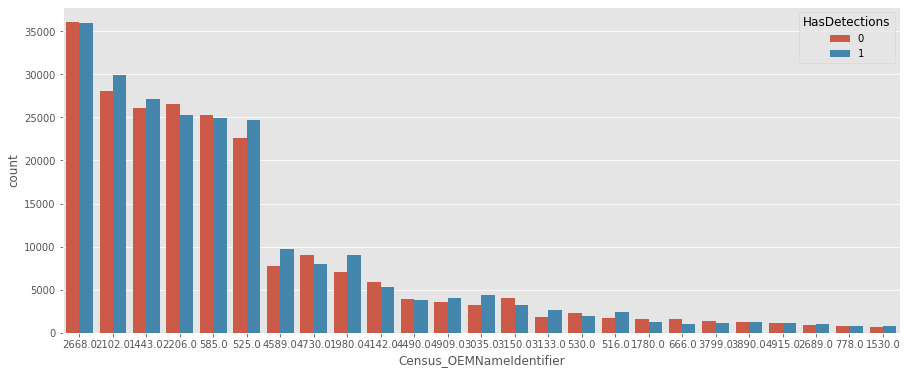

In [229]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OEMNameIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_OEMNameIdentifier']).iloc[:25].index)

In [230]:
df.pivot_table(index='Census_OEMNameIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                         HasDetections HasDetections HasDetections
Census_OEMNameIdentifier                                          
2,668.00                         72011         35964          0.50
2,102.00                         57924         29863          0.52
1,443.00                         53210         27159          0.51
2,206.00                         51888         25328          0.49
585.00                           50304         24973          0.50
525.00                           47299         24655          0.52
4,589.00                         17404          9670          0.56
4,730.00                         16993          7954          0.47
1,980.00                         16157          9066          0.56
4,142.00                         11212          5371          0.48
4,490.00                          7727          3754          0.49
4,909.00                          7638          4052          0.53
3,035.00                          7596          4361          0.57
3,150.00                          7249          3236          0.45
3,133.00                          4504          2616          0.58
530.00                            4219          1947          0.46
516.00                            4069          2379          0.58
1,780.00                          2779          1226          0.44
666.00                            2681          1062          0.40
3,799.00                          2523          1124          0.45

In [231]:
df['Census_OEMNameIdentifier'].nunique()

1589

Agrupamos los valores de baja frequencia.

In [232]:
list = (df['Census_OEMNameIdentifier'].value_counts(dropna=True).values > 490)
len(list[list==True])


42

In [233]:
list_1 = df['Census_OEMNameIdentifier'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['Census_OEMNameIdentifier'].isin(list_1)==False, 'Census_OEMNameIdentifier'] = 'resto'

In [234]:
df['Census_OEMNameIdentifier'].isnull().sum()

0

In [235]:
df['Census_OEMNameIdentifier'] = df['Census_OEMNameIdentifier'].astype(str)

##### Atributo Census_OEMModelIdentifier

Atributo catgórico. Sin información. 

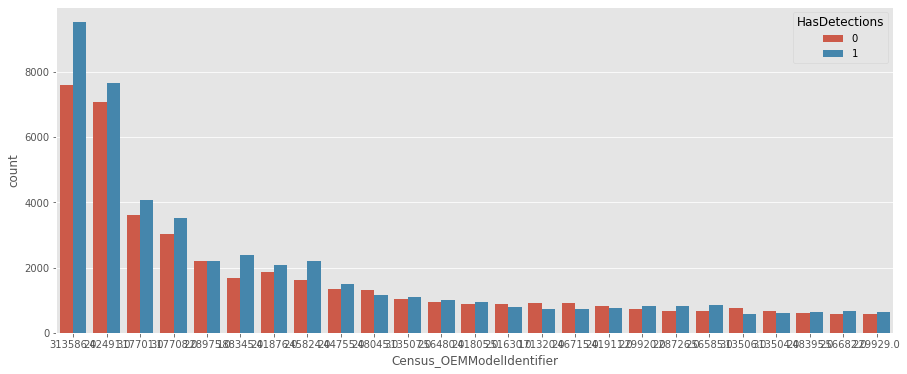

In [236]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OEMModelIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_OEMModelIdentifier']).iloc[:25].index)

In [237]:
df.pivot_table(index='Census_OEMModelIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                          HasDetections HasDetections HasDetections
Census_OEMModelIdentifier                                          
313,586.00                        17092          9515          0.56
242,491.00                        14726          7661          0.52
317,701.00                         7676          4078          0.53
317,708.00                         6541          3529          0.54
228,975.00                         4389          2196          0.50
188,345.00                         4063          2372          0.58
241,876.00                         3929          2081          0.53
245,824.00                         3815          2194          0.58
244,755.00                         2826          1495          0.53
248,045.00                         2496          1170          0.47
313,507.00                         2115          1087          0.51
256,480.00                         1954          1003          0.51
241,805.00                         1839           952          0.52
251,630.00                         1682           803          0.48
171,320.00                         1631           717          0.44
246,715.00                         1622           724          0.45
241,911.00                         1574           745          0.47
229,920.00                         1535           815          0.53
228,726.00                         1497           835          0.56
256,585.00                         1493           839          0.56

Es un atributo que puede que salga en el arbol por lo que se ve.

In [238]:
df['Census_OEMModelIdentifier'].nunique()

40697

Vamos hacer una agrupación uniones los valores con muy poca frequencia.

In [239]:
list = (df['Census_OEMModelIdentifier'].value_counts(dropna=True).values > 100)
len(list[list==True])

797

In [240]:
list_1 = df['Census_OEMModelIdentifier'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['Census_OEMModelIdentifier'].isin(list_1)==False, 'Census_OEMModelIdentifier'] = 'resto'

In [241]:
df['Census_OEMModelIdentifier'].fillna(value='-999', inplace=True)

In [242]:
df['Census_OEMModelIdentifier'] = df['Census_OEMModelIdentifier'].astype(str)

##### Atributo Census_ProcessorCoreCount

Atríbuto numérico que describe el número de nucleos en los procesadores. 

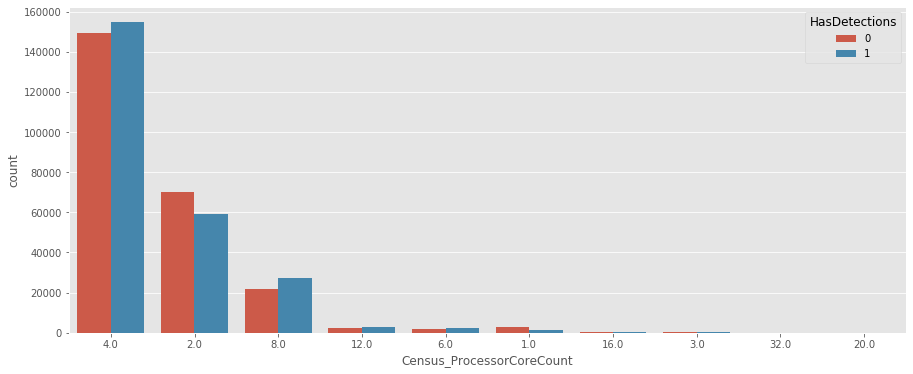

In [243]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ProcessorCoreCount', hue='HasDetections', order=pd.value_counts(df['Census_ProcessorCoreCount']).iloc[:10].index)

In [244]:
df.pivot_table(index='Census_ProcessorCoreCount', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                          HasDetections HasDetections HasDetections
Census_ProcessorCoreCount                                          
4.00                             304102        154734          0.51
2.00                             129178         59122          0.46
8.00                              48995         27121          0.55
12.00                              5184          3011          0.58
6.00                               4023          2290          0.57
1.00                               3980          1207          0.30
16.00                              1006           601          0.60
3.00                                752           342          0.45
32.00                               113            60          0.53
20.00                                97            50          0.52
24.00                                95            44          0.46
40.00                                39            23          0.59
28.00                                17             9          0.53
36.00                                16             8          0.50
48.00                                15             6          0.40
10.00                                10             3          0.30
5.00                                 10             7          0.70
56.00                                 8             3          0.38
7.00                                  3             1          0.33
64.00                                 2             1          0.50

Se ve que la mayoría de los procesadores usados son de 4 nucelos. 

Aunque se puede trabajar los outliers, se dejan por el decision-tree.

In [245]:
df['Census_ProcessorCoreCount'].fillna(value=-999, inplace=True)

In [246]:
df['Census_ProcessorCoreCount'].nunique()

28

##### Atributo Census_ProcessorManufacturerIdentifier

Atributo categórico que identifica la fabrica del procesador

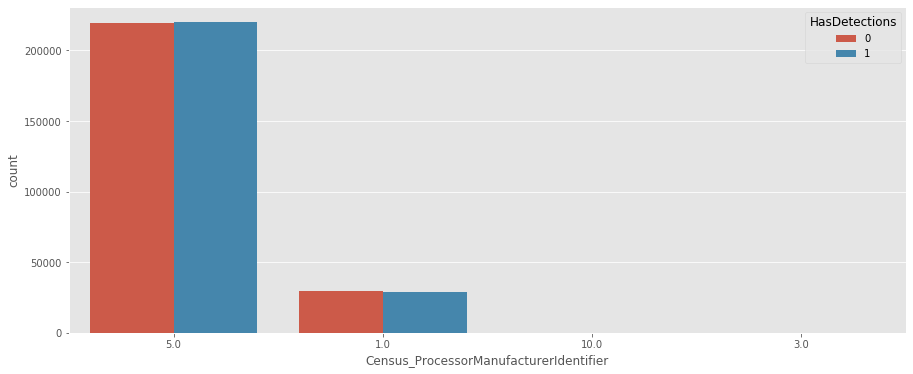

In [247]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ProcessorManufacturerIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_ProcessorManufacturerIdentifier']).iloc[:10].index)

In [248]:
df['Census_ProcessorManufacturerIdentifier'].nunique()

4

In [249]:
df.pivot_table(index='Census_ProcessorManufacturerIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum  \
                                       HasDetections HasDetections   
Census_ProcessorManufacturerIdentifier                               
5.00                                          439028        219948   
1.00                                           58604         28698   
10.00                                             14             0   
3.00                                               7             1   

                                                mean  
                                       HasDetections  
Census_ProcessorManufacturerIdentifier                
5.00                                            0.50  
1.00                                            0.49  
10.00                                           0.00  
3.00                                            0.14

In [455]:
df['Census_ProcessorManufacturerIdentifier'].fillna(value='-999', inplace=True)

In [456]:
df['Census_ProcessorManufacturerIdentifier'] = df['Census_ProcessorManufacturerIdentifier'].astype(str)

In [457]:
df['Census_ProcessorManufacturerIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

5.0     439028
1.0      58604
-999      2347
10.0        14
3.0          7
Name: Census_ProcessorManufacturerIdentifier, dtype: int64

##### Atributo Census_ProcessorModelIdentifier

Atributo categórico. 

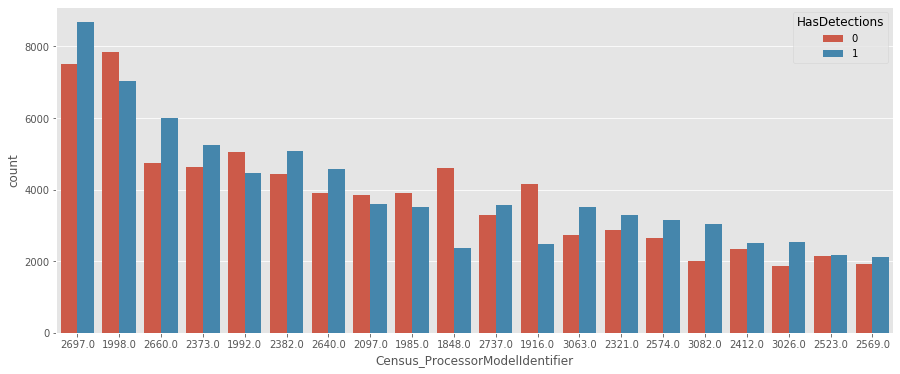

In [253]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ProcessorModelIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_ProcessorModelIdentifier']).iloc[:20].index)

In [254]:
df.pivot_table(index='Census_ProcessorModelIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                                HasDetections HasDetections HasDetections
Census_ProcessorModelIdentifier                                          
2,697.00                                16180          8676          0.54
1,998.00                                14874          7042          0.47
2,660.00                                10736          5998          0.56
2,373.00                                 9885          5259          0.53
1,992.00                                 9502          4453          0.47
2,382.00                                 9496          5068          0.53
2,640.00                                 8506          4588          0.54
2,097.00                                 7440          3586          0.48
1,985.00                                 7414          3519          0.47
1,848.00                                 6944          2355          0.34
2,737.00                                 6864          3560          0.52
1,916.00                                 6630          2469          0.37
3,063.00                                 6236          3501          0.56
2,321.00                                 6137          3279          0.53
2,574.00                                 5789          3147          0.54
3,082.00                                 5046          3028          0.60
2,412.00                                 4851          2498          0.51
3,026.00                                 4414          2550          0.58
2,523.00                                 4334          2181          0.50
2,569.00                                 4050          2127          0.53

In [255]:
df['Census_ProcessorModelIdentifier'].nunique()

2243

In [256]:
df['Census_ProcessorModelIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

2,697.00    16180
1,998.00    14874
2,660.00    10736
2,373.00     9885
1,992.00     9502
            ...  
3,985.00        1
843.00          1
3,088.00        1
633.00          1
2,325.00        1
Name: Census_ProcessorModelIdentifier, Length: 2244, dtype: int64

Agrupamos los valores con menos frequencia.

In [257]:
list = (df['Census_ProcessorModelIdentifier'].value_counts(dropna=True).values > 490)
len(list[list==True])


202

In [258]:
list_1 = df['Census_ProcessorModelIdentifier'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['Census_ProcessorModelIdentifier'].isin(list_1)==False, 'Census_ProcessorModelIdentifier'] = 'resto'

In [259]:
df['Census_ProcessorModelIdentifier'].isnull().sum()

0

In [260]:
df['Census_ProcessorModelIdentifier'] = df['Census_ProcessorModelIdentifier'].astype(str)

##### Atributo Census_PrimaryDiskTotalCapacity

Atributo numérico. Amount of disk space on primary disk of the machine in MB

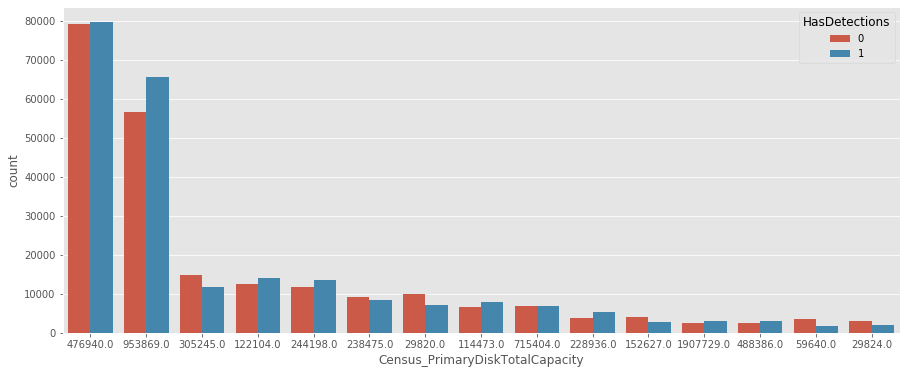

In [261]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_PrimaryDiskTotalCapacity', hue='HasDetections', order=pd.value_counts(df['Census_PrimaryDiskTotalCapacity']).iloc[:15].index)

In [262]:
df.pivot_table(index='Census_PrimaryDiskTotalCapacity', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                                HasDetections HasDetections HasDetections
Census_PrimaryDiskTotalCapacity                                          
476,940.00                             158683         79582          0.50
953,869.00                             122183         65491          0.54
305,245.00                              26687         11780          0.44
122,104.00                              26444         13932          0.53
244,198.00                              25159         13401          0.53
238,475.00                              17622          8496          0.48
29,820.00                               17073          7146          0.42
114,473.00                              14583          7999          0.55
715,404.00                              13768          6874          0.50
228,936.00                               9024          5264          0.58
152,627.00                               6677          2743          0.41
1,907,729.00                             5621          3041          0.54
488,386.00                               5430          2922          0.54
59,640.00                                5325          1813          0.34
29,824.00                                4901          1920          0.39
610,480.00                               4815          2294          0.48
29,600.00                                2331           720          0.31
76,319.00                                1558           619          0.40
457,862.00                               1343           792          0.59
59,648.00                                1189           355          0.30

Interesante que la mayoría de ordenadores son de 500gb de discoduro y el segundo lugar 1tb. Lo raro es como incide tener 1gb en la cantidad de detecciones

In [263]:
df['Census_PrimaryDiskTotalCapacity'].fillna(value=-999, inplace=True)

##### Atributo Census_PrimaryDiskTypeName

Atributo categórico. Friendly name of Primary Disk Type - HDD or SSD

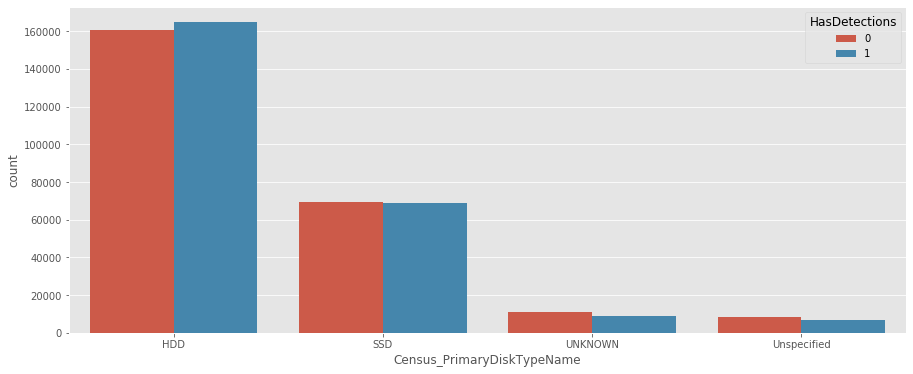

In [264]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_PrimaryDiskTypeName', hue='HasDetections', order=pd.value_counts(df['Census_PrimaryDiskTypeName']).iloc[:15].index)

Se ve claramente que UNKNOWN y Unspecified se pueden juntar. 

In [265]:
df.loc[df['Census_PrimaryDiskTypeName'] == 'Unspecified' , 'Census_PrimaryDiskTypeName'] = 'UNKNOWN'

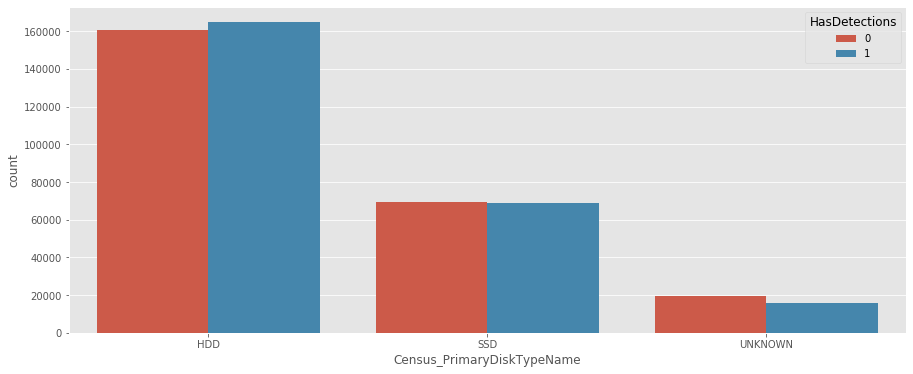

In [266]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_PrimaryDiskTypeName', hue='HasDetections', order=pd.value_counts(df['Census_PrimaryDiskTypeName']).iloc[:15].index)

In [267]:
df['Census_PrimaryDiskTypeName'].fillna(value='-999', inplace=True)

In [268]:
df['Census_PrimaryDiskTypeName'].value_counts(normalize=False, dropna=False, sort=True)

HDD        325429
SSD        138155
UNKNOWN     35707
-999          709
Name: Census_PrimaryDiskTypeName, dtype: int64

##### Atributo Census_SystemVolumeTotalCapacity

Atributo numérico. The size of the partition that the System volume is installed on in MB

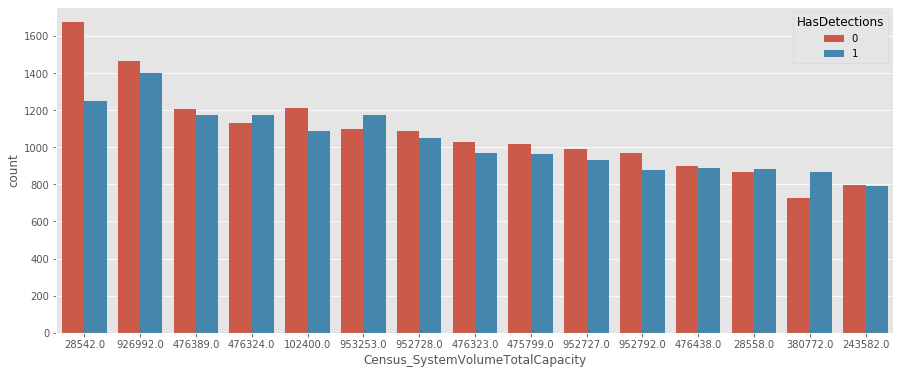

In [269]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_SystemVolumeTotalCapacity', hue='HasDetections', order=pd.value_counts(df['Census_SystemVolumeTotalCapacity']).iloc[:15].index)

In [270]:
df.pivot_table(index='Census_SystemVolumeTotalCapacity', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                                 HasDetections HasDetections HasDetections
Census_SystemVolumeTotalCapacity                                          
28,542.00                                 2922          1248          0.43
926,992.00                                2866          1401          0.49
476,389.00                                2380          1174          0.49
476,324.00                                2306          1174          0.51
102,400.00                                2303          1090          0.47
953,253.00                                2272          1173          0.52
952,728.00                                2138          1048          0.49
476,323.00                                1994           967          0.48
475,799.00                                1981           964          0.49
952,727.00                                1922           933          0.49
952,792.00                                1844           875          0.47
476,438.00                                1787           889          0.50
28,558.00                                 1747           883          0.51
380,772.00                                1595           867          0.54
243,582.00                                1591           793          0.50
476,373.00                                1529           739          0.48
113,922.00                                1504           804          0.53
121,488.00                                1478           824          0.56
953,318.00                                1476           786          0.53
476,388.00                                1475           689          0.47

Es extraño que el valor con mayor frecuencia tengo un valor mucho más bajo que los demás. Igual es un error de datos de origen y no miden en muchos casos la partición real. Como estamos hablando de particiones para alojar Windows, puede que el valor con más frequencia signifique no particionado, porque es aproximadamente lo que ocupa el windows en su instalación.

In [271]:
df['Census_SystemVolumeTotalCapacity'].value_counts(normalize=False, dropna=False, sort=True)

nan             2976
28,542.00       2922
926,992.00      2866
476,389.00      2380
476,324.00      2306
                ... 
435,756.00         1
435,758.00         1
27,235.00          1
435,761.00         1
1,048,576.00       1
Name: Census_SystemVolumeTotalCapacity, Length: 142052, dtype: int64

In [272]:
df['Census_SystemVolumeTotalCapacity'].fillna(value=-999, inplace=True)

In [273]:
df['Census_SystemVolumeTotalCapacity']=df['Census_SystemVolumeTotalCapacity'].astype(int)

##### Atributo Census_HasOpticalDiskDrive

Atributo booleano. True indicates that the machine has an optical disk drive (CD/DVD)

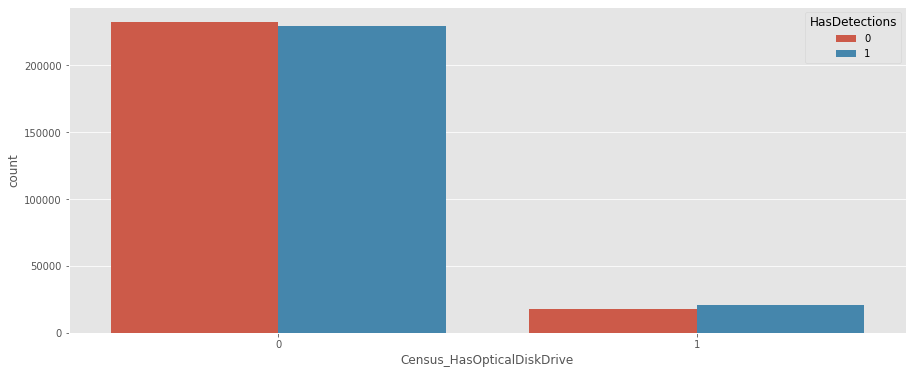

In [274]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_HasOpticalDiskDrive', hue='HasDetections', order=pd.value_counts(df['Census_HasOpticalDiskDrive']).iloc[:15].index)

##### Atributo Census_TotalPhysicalRAM

Atributo numérico. Memoria ram del ordenador

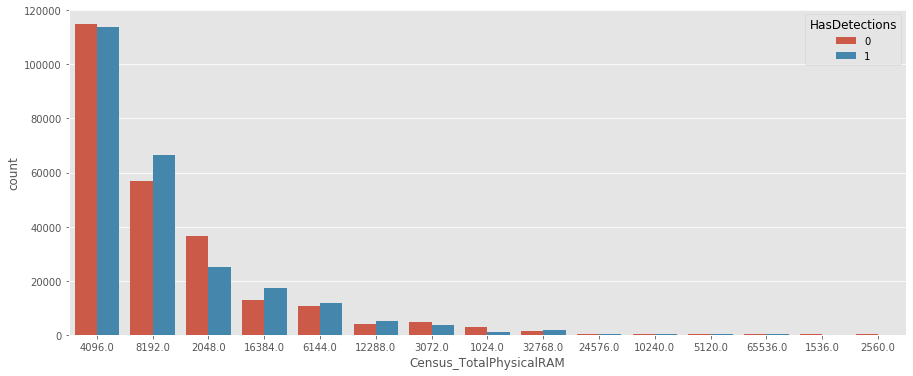

In [275]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_TotalPhysicalRAM', hue='HasDetections', order=pd.value_counts(df['Census_TotalPhysicalRAM']).iloc[:15].index)

In [276]:
df.pivot_table(index='Census_TotalPhysicalRAM', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                        HasDetections HasDetections HasDetections
Census_TotalPhysicalRAM                                          
4,096.00                       228678        113824          0.50
8,192.00                       123174         66325          0.54
2,048.00                        61694         25059          0.41
16,384.00                       30179         17319          0.57
6,144.00                        22349         11612          0.52
12,288.00                        9074          5175          0.57
3,072.00                         8468          3554          0.42
1,024.00                         3603           889          0.25
32,768.00                        3308          1840          0.56
24,576.00                         700           419          0.60
10,240.00                         596           355          0.60
5,120.00                          413           223          0.54
65,536.00                         349           173          0.50
1,536.00                          286            99          0.35
2,560.00                          259           103          0.40
20,480.00                         238           138          0.58
4,095.00                          237            51          0.22
2,047.00                          193            29          0.15
8,191.00                          110            22          0.20
14,336.00                          92            60          0.65

Interesante que la mayoría de los ordenadores tienen 4gb de ram

In [277]:
df['Census_TotalPhysicalRAM'].fillna(value=-999, inplace=True)

##### Atributo Census_ChassisTypeName

Atributo categórico. Retrieves a numeric representation of what type of chassis the machine has

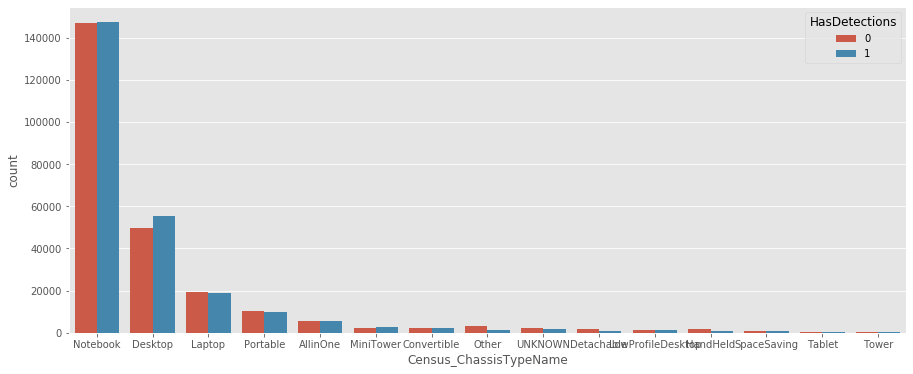

In [278]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ChassisTypeName', hue='HasDetections', order=pd.value_counts(df['Census_ChassisTypeName']).iloc[:15].index)

In [279]:
df['Census_ChassisTypeName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
NaN                        37
30                         11
StickPC                     7
0                           5
35                          3
MultisystemChassis          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
ExpansionChassis            1
25        

In [280]:
list = [   
'UNKNOWN',
'Other',
'30',
'StickPC',
'0',
'Blade',
'PizzaBox',
'35',
'MultisystemChassis',
'SubChassis',
'31',
'25',
'32',
'ExpansionChassis',  
]

In [281]:
df.loc[df['Census_ChassisTypeName'].isin(list) == True, 'Census_ChassisTypeName'] = 'Unknown'

In [282]:
df['Census_ChassisTypeName'].fillna(value='-999', inplace=True)

In [283]:
df.pivot_table(index='Census_ChassisTypeName', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                       HasDetections HasDetections HasDetections
Census_ChassisTypeName                                          
Notebook                      294232        147270          0.50
Desktop                       104979         55150          0.53
Laptop                         38261         18864          0.49
Portable                       20181          9696          0.48
AllinOne                       11407          5831          0.51
Unknown                         8527          3046          0.36
MiniTower                       4849          2597          0.54
Convertible                     4685          2252          0.48
Detachable                      2930          1020          0.35
LowProfileDesktop               2878          1481          0.51
HandHeld                        2652           784          0.30
SpaceSaving                     1689           807          0.48
Tablet                           730           263          0.36
Tower                            692           362          0.52
MainServerChassis                512           228          0.45
MiniPC                           261            89          0.34
LunchBox                         224           102          0.46
RackMountChassis                 189            62          0.33
SubNotebook                       47            17          0.36
BusExpansionChassis               38            15          0.39

##### Atributo Census_InternalPrimaryDiagonalDisplaySizeInInches

Atributo numérico. Retrieves the physical diagonal length in inches of the primary display

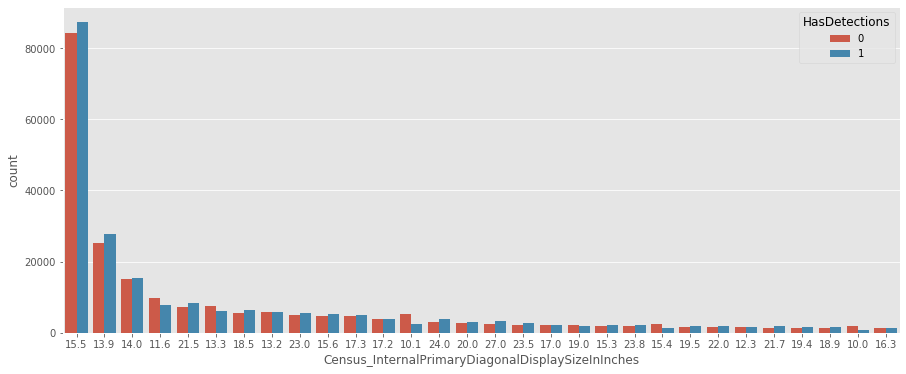

In [284]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_InternalPrimaryDiagonalDisplaySizeInInches', hue='HasDetections', order=pd.value_counts(df['Census_InternalPrimaryDiagonalDisplaySizeInInches']).iloc[:30].index)

In [285]:
df.pivot_table(index='Census_InternalPrimaryDiagonalDisplaySizeInInches', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum  \
                                                  HasDetections HasDetections   
Census_InternalPrimaryDiagonalDisplaySizeInInches                               
15.50                                                    171319         87244   
13.90                                                     52873         27711   
14.00                                                     30492         15458   
11.60                                                     17592          7847   
21.50                                                     15441          8293   
13.30                                                     13777          6244   
18.50                                                     11751          6300   
13.20                                                     11610          5809   
23.00                                                     10736          5654   
15.60                                                     10085          5236   
17.30                                                      9946          5095   
17.20                                                      7665          3864   
10.10                                                      7661          2402   
24.00                                                      6822          3797   
20.00                                                      5940          3049   
27.00                                                      5907          3395   
23.50                                                      4813          2661   
17.00                                                      4564          2272   
19.00                                                      4290          2045   
15.30                                                      4216          2174   

                                                           mean  
                                                  HasDetections  
Census_InternalPrimaryDiagonalDisplaySizeInInches                
15.50                                                      0.51  
13.90                                                      0.52  
14.00                                                      0.51  
11.60                                                      0.45  
21.50                                                      0.54  
13.30                                                      0.45  
18.50                                                      0.54  
13.20                                                      0.50  
23.00                                                      0.53  
15.60                                                      0.52  
17.30                                                      0.51  
17.20                                                      0.50  
10.10                                                      0.31  
24.00                                                      0.56  
20.00                                                      0.51  
27.00                                                      0.57  
23.50                                                      0.55  
17.00                                                      0.50  
19.00                                                      0.48  
15.30                                                      0.52

El monitor más común es el de 15.5 pulgadas. Interesante.

In [286]:
df[['Census_InternalPrimaryDiagonalDisplaySizeInInches']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
Census_InternalPrimaryDiagonalDisplaySizeInInches    497346 non-null float64
dtypes: float64(1)
memory usage: 3.8 MB


In [287]:
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].describe()

count   497,346.00
mean         16.69
std           5.93
min           4.90
25%          13.90
50%          15.50
75%          17.20
max         142.00
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, dtype: float64

In [288]:
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].fillna(value=-999, inplace=True)

In [289]:
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'] = df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].astype(int)

##### Atributo Census_InternalPrimaryDisplayResolutionHorizontal

Atributo numérico. Retrieves the number of pixels in the horizontal direction of the internal display.

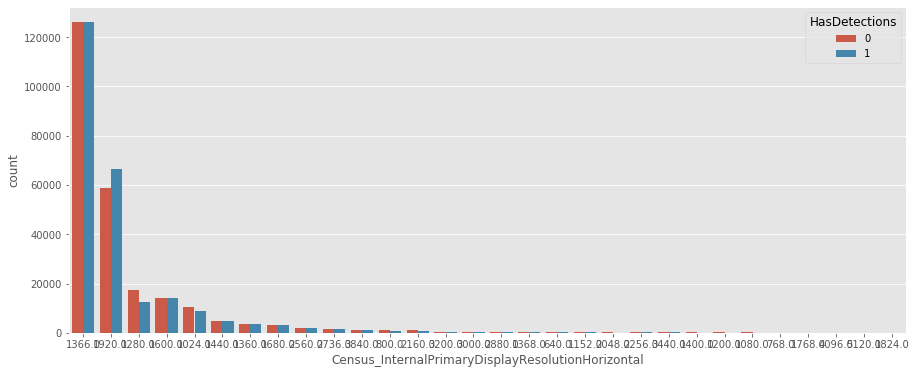

In [290]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_InternalPrimaryDisplayResolutionHorizontal', hue='HasDetections', order=pd.value_counts(df['Census_InternalPrimaryDisplayResolutionHorizontal']).iloc[:30].index)

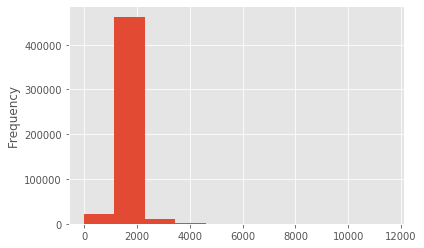

In [291]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].plot(kind='hist')

In [292]:
df.pivot_table(index='Census_InternalPrimaryDisplayResolutionHorizontal', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum  \
                                                  HasDetections HasDetections   
Census_InternalPrimaryDisplayResolutionHorizontal                               
1,366.00                                                 251999        126044   
1,920.00                                                 125095         66506   
1,280.00                                                  29690         12372   
1,600.00                                                  28231         14149   
1,024.00                                                  19327          8830   
1,440.00                                                   9441          4642   
1,360.00                                                   7058          3652   
1,680.00                                                   6234          3241   
2,560.00                                                   3989          2029   
2,736.00                                                   3159          1584   
3,840.00                                                   2479          1336   
800.00                                                     1784           561   
2,160.00                                                   1760           733   
3,200.00                                                    978           510   
3,000.00                                                    606           322   
2,880.00                                                    557           186   
1,368.00                                                    480           126   
640.00                                                      464           207   
1,152.00                                                    433           181   
2,048.00                                                    308           115   

                                                           mean  
                                                  HasDetections  
Census_InternalPrimaryDisplayResolutionHorizontal                
1,366.00                                                   0.50  
1,920.00                                                   0.53  
1,280.00                                                   0.42  
1,600.00                                                   0.50  
1,024.00                                                   0.46  
1,440.00                                                   0.49  
1,360.00                                                   0.52  
1,680.00                                                   0.52  
2,560.00                                                   0.51  
2,736.00                                                   0.50  
3,840.00                                                   0.54  
800.00                                                     0.31  
2,160.00                                                   0.42  
3,200.00                                                   0.52  
3,000.00                                                   0.53  
2,880.00                                                   0.33  
1,368.00                                                   0.26  
640.00                                                     0.45  
1,152.00                                                   0.42  
2,048.00                                                   0.37

In [293]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].describe()

count   497,350.00
mean      1,548.30
std         368.57
min          -1.00
25%       1,366.00
50%       1,366.00
75%       1,920.00
max      11,520.00
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: float64

In [294]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].sort_values(ascending=True).head(10)

212946    -1.00
100896    -1.00
365272    -1.00
269786    -1.00
372876   320.00
141391   360.00
46572    400.00
378491   480.00
103845   480.00
464832   480.00
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: float64

Los valores negativos deben ser un error.

In [295]:
df.loc[df['Census_InternalPrimaryDisplayResolutionHorizontal'] < 0, 'Census_InternalPrimaryDisplayResolutionHorizontal'] = -999

In [296]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].sort_values(ascending=False).head(10)

310525   11,520.00
37586    11,520.00
499582   10,320.00
266645    7,680.00
11608     7,680.00
412488    6,048.00
177910    6,016.00
117303    5,984.00
169679    5,870.00
495321    5,760.00
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: float64

In [297]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].fillna(value=-999, inplace=True)

Probando la correlación entre el tamaño y la resolución

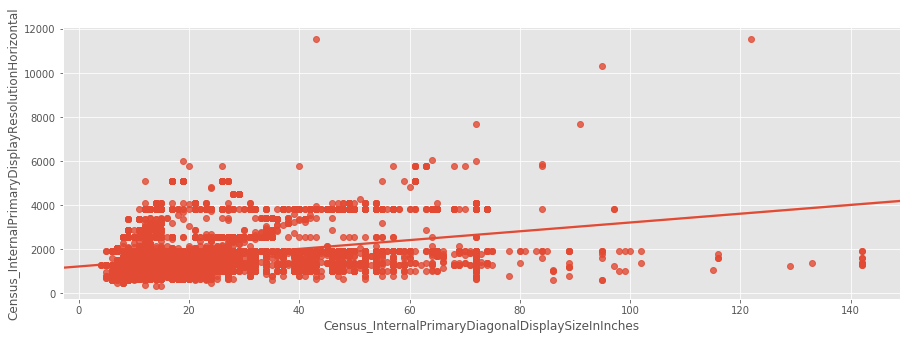

In [298]:
plt.figure(figsize=(15,5))
sns.regplot(
    x = 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    y = 'Census_InternalPrimaryDisplayResolutionHorizontal',
    data = df[(df['Census_InternalPrimaryDiagonalDisplaySizeInInches']>=0) &
             (df['Census_InternalPrimaryDisplayResolutionHorizontal']>=0)]
)

Parece que existe una correlación entre estos dos valores. 

##### Atributo Census_InternalPrimaryDisplayResolutionVertical

Atributo numérico. Retrieves the number of pixels in the verticalhorizontal direction of the internal display.

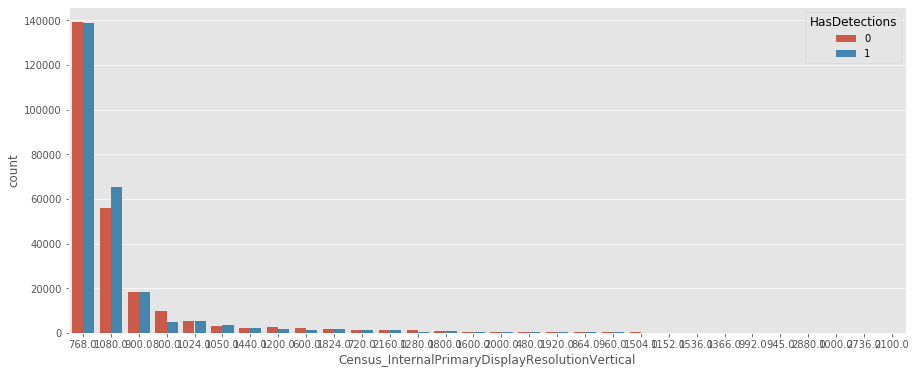

In [299]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_InternalPrimaryDisplayResolutionVertical', hue='HasDetections', order=pd.value_counts(df['Census_InternalPrimaryDisplayResolutionVertical']).iloc[:30].index)

In [300]:
df.pivot_table(index='Census_InternalPrimaryDisplayResolutionVertical', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum  \
                                                HasDetections HasDetections   
Census_InternalPrimaryDisplayResolutionVertical                               
768.00                                                 277762        138621   
1,080.00                                               121145         65107   
900.00                                                  36912         18427   
800.00                                                  14687          5000   
1,024.00                                                10603          5210   
1,050.00                                                 6397          3316   
1,440.00                                                 4523          2222   
1,200.00                                                 4392          1851   
600.00                                                   3492          1155   
1,824.00                                                 3157          1584   
720.00                                                   2763          1367   
2,160.00                                                 2619          1404   
1,280.00                                                 1650           437   
1,800.00                                                 1439           647   
1,600.00                                                  914           334   
2,000.00                                                  606           322   
480.00                                                    482           213   
1,920.00                                                  478           152   
864.00                                                    418           177   
960.00                                                    312           141   

                                                         mean  
                                                HasDetections  
Census_InternalPrimaryDisplayResolutionVertical                
768.00                                                   0.50  
1,080.00                                                 0.54  
900.00                                                   0.50  
800.00                                                   0.34  
1,024.00                                                 0.49  
1,050.00                                                 0.52  
1,440.00                                                 0.49  
1,200.00                                                 0.42  
600.00                                                   0.33  
1,824.00                                                 0.50  
720.00                                                   0.49  
2,160.00                                                 0.54  
1,280.00                                                 0.26  
1,800.00                                                 0.45  
1,600.00                                                 0.37  
2,000.00                                                 0.53  
480.00                                                   0.44  
1,920.00                                                 0.32  
864.00                                                   0.42  
960.00                                                   0.45

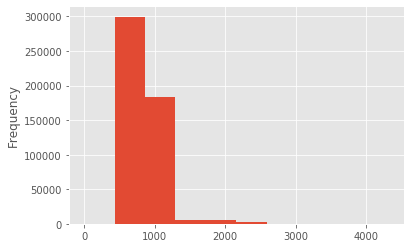

In [301]:
df['Census_InternalPrimaryDisplayResolutionVertical'].plot(kind='hist')

In [302]:
df['Census_InternalPrimaryDisplayResolutionVertical'].describe()

count   497,350.00
mean        898.24
std         214.86
min          -1.00
25%         768.00
50%         768.00
75%       1,080.00
max       4,320.00
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: float64

In [303]:
df['Census_InternalPrimaryDisplayResolutionVertical'].nunique()

514

In [304]:
df['Census_InternalPrimaryDisplayResolutionVertical'].sort_values(ascending=True).head(10)

269786    -1.00
212946    -1.00
365272    -1.00
100896    -1.00
372876   200.00
46572    300.00
141391   360.00
295775   400.00
231366   400.00
429401   400.00
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: float64

Los valores negativos deben ser un error.

In [305]:
df.loc[df['Census_InternalPrimaryDisplayResolutionVertical'] < 0, 'Census_InternalPrimaryDisplayResolutionVertical'] = -999

In [306]:
df['Census_InternalPrimaryDisplayResolutionVertical'].sort_values(ascending=False).head(10)

11608    4,320.00
309871   3,840.00
140431   3,840.00
490244   3,840.00
182774   3,840.00
116686   3,840.00
158843   3,840.00
172348   3,840.00
280293   3,840.00
102819   3,840.00
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: float64

In [307]:
df['Census_InternalPrimaryDisplayResolutionVertical'].fillna(value=-999, inplace=True)

Probemos la correlación entre ambas resoluciones 

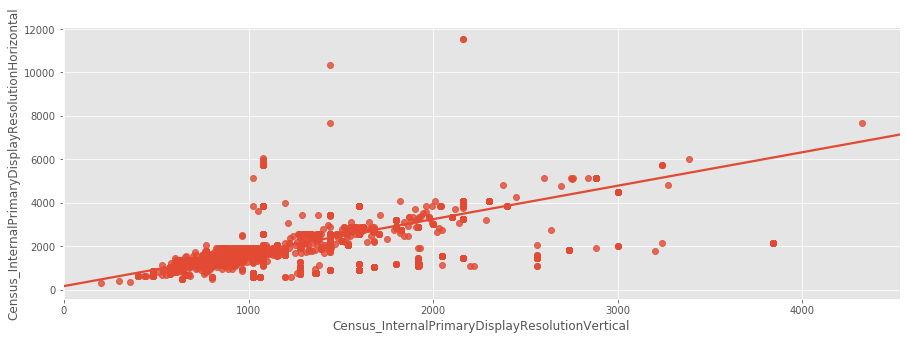

In [308]:
plt.figure(figsize=(15,5))
sns.regplot(
    x = 'Census_InternalPrimaryDisplayResolutionVertical',
    y = 'Census_InternalPrimaryDisplayResolutionHorizontal',
    data = df[(df['Census_InternalPrimaryDisplayResolutionVertical']>=0) &
             (df['Census_InternalPrimaryDisplayResolutionHorizontal']>=0)]
)

Como suponíamos, la correlación es muy estrecha.

##### Atributo Census_PowerPlatformRoleName

Atributo categórico. Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device

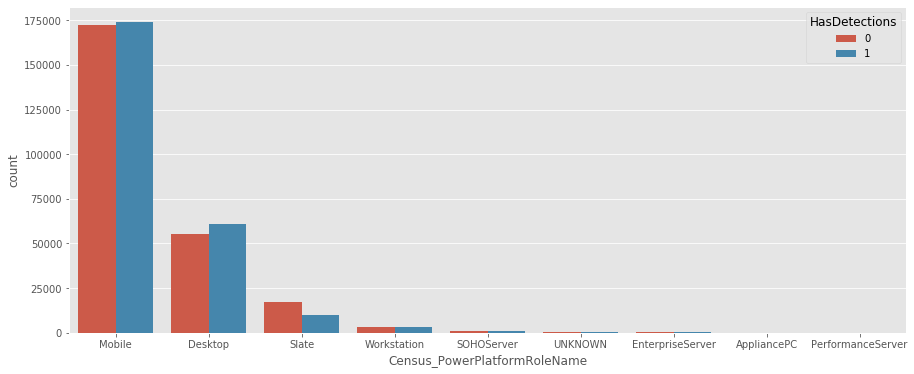

In [309]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_PowerPlatformRoleName', hue='HasDetections', order=pd.value_counts(df['Census_PowerPlatformRoleName']).iloc[:30].index)

In [310]:
df.pivot_table(index='Census_PowerPlatformRoleName', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                             HasDetections HasDetections HasDetections
Census_PowerPlatformRoleName                                          
Mobile                              346378        173910          0.50
Desktop                             116054         60942          0.53
Slate                                27475         10082          0.37
Workstation                           6235          3198          0.51
SOHOServer                            2062          1024          0.50
UNKNOWN                               1172           571          0.49
EnterpriseServer                       406           177          0.44
AppliancePC                            212            46          0.22
PerformanceServer                        4             3          0.75

In [311]:
df['Census_PowerPlatformRoleName'].fillna(value='-999', inplace=True)

In [312]:
df['Census_PowerPlatformRoleName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Mobile               346378
Desktop              116054
Slate                 27475
Workstation            6235
SOHOServer             2062
UNKNOWN                1172
EnterpriseServer        406
AppliancePC             212
PerformanceServer         4
-999                      2
Name: Census_PowerPlatformRoleName, dtype: int64

##### Atributo Census_InternalBatteryType

Atributo categórico. Sin información. 

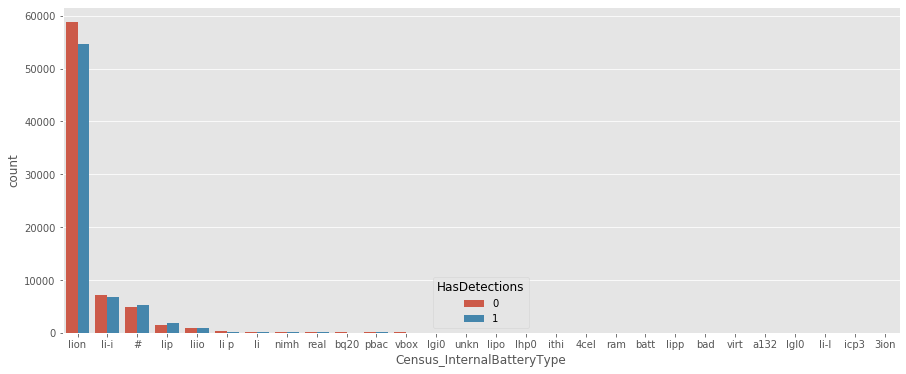

In [313]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_InternalBatteryType', hue='HasDetections', order=pd.value_counts(df['Census_InternalBatteryType']).iloc[:30].index)

In [314]:
df['Census_InternalBatteryType'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

NaN     355603
lion    113500
li-i     13855
#        10176
lip       3326
liio      1814
li p       466
li         356
nimh       272
real       162
bq20       143
pbac       130
vbox        89
lgi0        29
unkn        19
lipo        13
lhp0        12
ithi         7
4cel         6
ram          5
batt         3
lipp         3
bad          3
virt         2
a132         2
icp3         1
li-l         1
lgl0         1
3ion         1
Name: Census_InternalBatteryType, dtype: int64

In [315]:
df['Census_InternalBatteryType'].nunique()

28

Se pueden agrupar las variables con menos frequencia

In [316]:
list = (df['Census_InternalBatteryType'].value_counts(dropna=True).values > 100)
len(list[list==True])

11

In [317]:
list_1 = df['Census_InternalBatteryType'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['Census_InternalBatteryType'].isin(list_1)==False, 'Census_InternalBatteryType'] = 'resto'

In [318]:
df['Census_InternalBatteryType'].fillna(value='-999', inplace=True)

In [319]:
df['Census_InternalBatteryType'].astype(str)

0         resto
1          lion
2          lion
3         resto
4         resto
          ...  
499995     lion
499996    resto
499997    resto
499998    resto
499999    resto
Name: Census_InternalBatteryType, Length: 500000, dtype: object

In [320]:
df.pivot_table(index='Census_InternalBatteryType', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                           HasDetections HasDetections HasDetections
Census_InternalBatteryType                                          
resto                             355800        179900          0.51
lion                              113500         54715          0.48
li-i                               13855          6718          0.48
#                                  10176          5321          0.52
lip                                 3326          1791          0.54
liio                                1814           830          0.46
li p                                 466           218          0.47
li                                   356           154          0.43
nimh                                 272           118          0.43
real                                 162            85          0.52
bq20                                 143            38          0.27
pbac                                 130            65          0.50

##### Atributo Census_InternalBatteryNumberOfCharges

Atributo numérico sin información

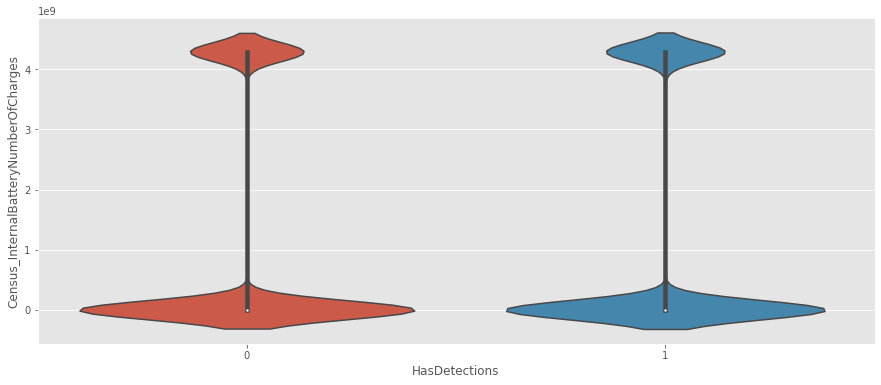

In [321]:
plt.figure(figsize= [15, 6])
sns.violinplot(data=df, y='Census_InternalBatteryNumberOfCharges', x='HasDetections')

In [322]:
df.pivot_table(index='Census_InternalBatteryNumberOfCharges', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum  \
                                      HasDetections HasDetections   
Census_InternalBatteryNumberOfCharges                               
0.00                                         283189        140772   
4,294,967,295.00                             126436         65208   
1.00                                           2955          1235   
16.00                                          1517           707   
2.00                                           1503           628   
3.00                                           1212           510   
33.00                                          1075           622   
4.00                                           1020           411   
5.00                                            901           348   
6.00                                            849           361   
7.00                                            764           318   
8.00                                            717           303   
374.00                                          682           365   
9.00                                            679           286   
10.00                                           668           269   
4,294,967,294.00                                660           329   
12.00                                           638           261   
256.00                                          608           194   
11.00                                           605           265   
13.00                                           591           274   

                                               mean  
                                      HasDetections  
Census_InternalBatteryNumberOfCharges                
0.00                                           0.50  
4,294,967,295.00                               0.52  
1.00                                           0.42  
16.00                                          0.47  
2.00                                           0.42  
3.00                                           0.42  
33.00                                          0.58  
4.00                                           0.40  
5.00                                           0.39  
6.00                                           0.43  
7.00                                           0.42  
8.00                                           0.42  
374.00                                         0.54  
9.00                                           0.42  
10.00                                          0.40  
4,294,967,294.00                               0.50  
12.00                                          0.41  
256.00                                         0.32  
11.00                                          0.44  
13.00                                          0.46

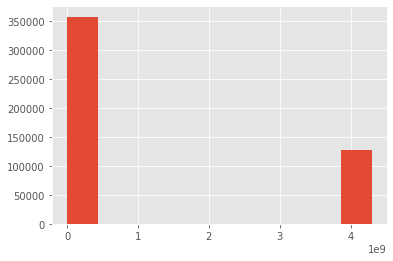

In [323]:
df['Census_InternalBatteryNumberOfCharges'].hist()

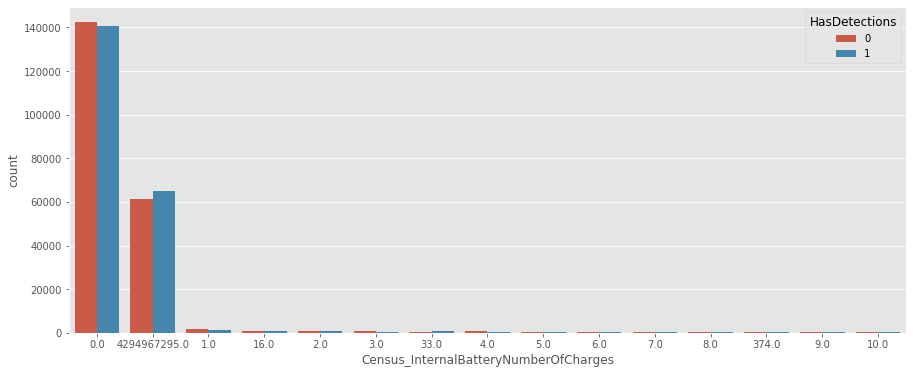

In [324]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_InternalBatteryNumberOfCharges', hue='HasDetections', order=pd.value_counts(df['Census_InternalBatteryNumberOfCharges']).iloc[:15].index)

Son muy raros estos valores. Tiene un número muy elevado con una alta frequencia. Por ser decision-tree no creará problemas. Pero seguro en regresión lineal lo daría. 

In [325]:
df['Census_InternalBatteryNumberOfCharges'].fillna(value=-999, inplace=True)

##### Atributo Census_OSVersion

Atributo categórico. 

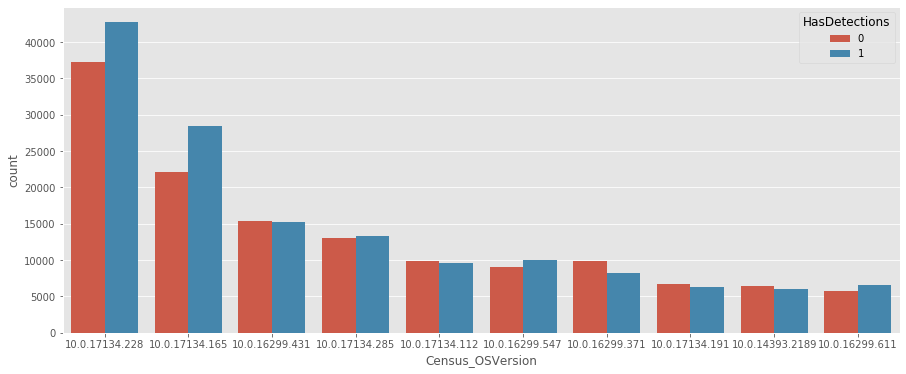

In [326]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSVersion', hue='HasDetections', order=pd.value_counts(df['Census_OSVersion']).iloc[:10].index)

In [327]:
df.pivot_table(index='Census_OSVersion', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                 HasDetections HasDetections HasDetections
Census_OSVersion                                          
10.0.17134.228           79975         42726          0.53
10.0.17134.165           50511         28404          0.56
10.0.16299.431           30519         15207          0.50
10.0.17134.285           26289         13265          0.50
10.0.17134.112           19501          9661          0.50
10.0.16299.547           19179         10065          0.52
10.0.16299.371           18195          8274          0.45
10.0.17134.191           12990          6257          0.48
10.0.14393.2189          12409          6031          0.49
10.0.16299.611           12267          6525          0.53
10.0.16299.125           12038          5516          0.46
10.0.10240.17443         11476          5570          0.49
10.0.10586.1176          10235          4540          0.44
10.0.16299.492            9467          4404          0.47
10.0.16299.309            8293          3715          0.45
10.0.17134.286            7840          3763          0.48
10.0.16299.15             6717          3490          0.52
10.0.17134.254            6292          2888          0.46
10.0.15063.1206           5700          2809          0.49
10.0.17134.1              5678          2974          0.52

Agrupar por versiones no parece viable. Hay diferentes correlaciones en valores de versiones muy parecidas.

Agrupamos las menos frecuentes

In [328]:
list = (df['Census_OSVersion'].value_counts(dropna=True).values > 490)
len(list[list==True])

91

In [329]:
list_1 = df['Census_OSVersion'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['Census_OSVersion'].isin(list_1)==False, 'Census_OSVersion'] = 'resto'

In [330]:
df['Census_OSVersion'].nunique()

92

In [331]:
df['Census_OSVersion'] = df['Census_OSVersion'].astype(str)

##### Atributo Census_OSArchitecture

Valor categórico. Volvemos a sistema operativo. 

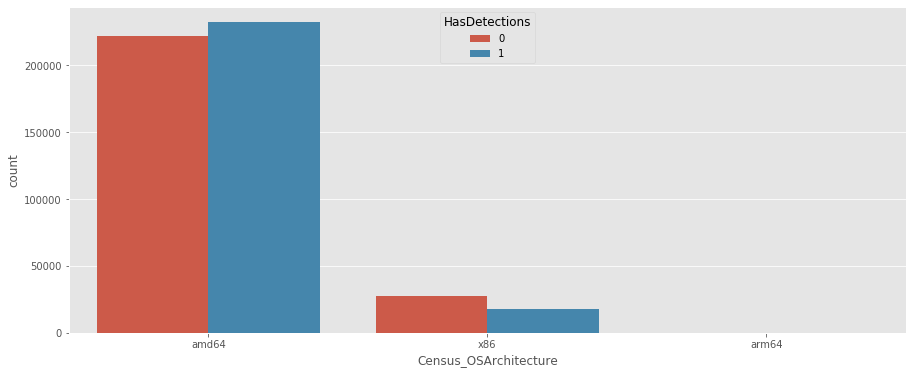

In [332]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSArchitecture', hue='HasDetections', order=pd.value_counts(df['Census_OSArchitecture']).iloc[:10].index)

In [333]:
df['Census_OSArchitecture'] = df['Census_OSArchitecture'].astype(str)

arm64 es un error

In [334]:
df.loc[df['Census_OSArchitecture'] == 'arm64', 'Census_OSArchitecture'] = 'amd64'

##### Atributo Census_OSBranch

Atributo categórico sobre el sistema operativo. 

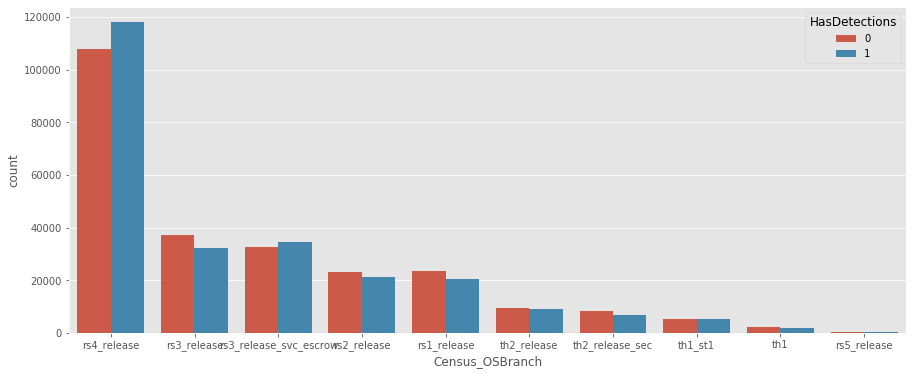

In [335]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSBranch', hue='HasDetections', order=pd.value_counts(df['Census_OSBranch']).iloc[:10].index)

In [336]:
df.pivot_table(index='Census_OSBranch', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                          HasDetections HasDetections HasDetections
Census_OSBranch                                                    
rs4_release                      226001        118008          0.52
rs3_release                       69216         32176          0.46
rs3_release_svc_escrow            67027         34572          0.52
rs2_release                       44264         21230          0.48
rs1_release                       43705         20322          0.46
th2_release                       18298          9022          0.49
th2_release_sec                   14895          6638          0.45
th1_st1                           10822          5451          0.50
th1                                4284          1892          0.44
rs5_release                         839           364          0.43
rs3_release_svc_escrow_im           329           132          0.40
rs_prerelease                       184            76          0.41
rs_prerelease_flt                   132            69          0.52
rs5_release_sigma                     3             1          0.33
winblue_ltsb_escrow                   1             0          0.00

##### Atributo Census_OSBuildNumber

Valor categírico. OS build.

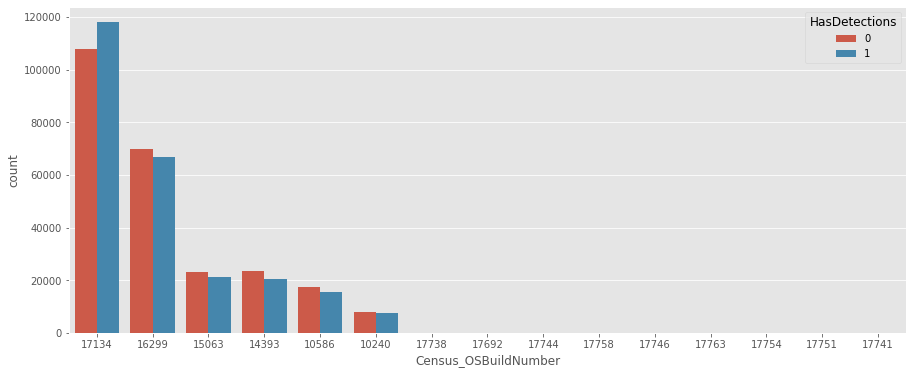

In [337]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSBuildNumber', hue='HasDetections', order=pd.value_counts(df['Census_OSBuildNumber']).iloc[:15].index)

In [338]:
df.pivot_table(index='Census_OSBuildNumber', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                     HasDetections HasDetections HasDetections
Census_OSBuildNumber                                          
17134                       225979        117998          0.52
16299                       136572         66880          0.49
15063                        44262         21229          0.48
14393                        43702         20320          0.46
10586                        33193         15660          0.47
10240                        15106          7343          0.49
17738                          165            59          0.36
17692                          146            77          0.53
17744                          135            64          0.47
17758                           99            42          0.42
17746                           65            24          0.37
17763                           59            23          0.39
17754                           59            30          0.51
17751                           54            17          0.31
17741                           45            21          0.47
17755                           40            23          0.57
17735                           39            19          0.49
17733                           35            18          0.51
17686                           34            12          0.35
17760                           31            20          0.65

In [339]:
df['Census_OSBuildNumber'].nunique()

61

Un poco de limpieza de outiers no irá mal.

In [340]:
df.loc[(df['Census_OSBuildNumber']>=17000) & (df['Census_OSBuildNumber']<18000),'Census_OSBuildNumber'] = 17134

In [341]:
list = df['Census_OSBuildNumber'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(6).index

In [342]:
df.loc[df['Census_OSBuildNumber'].isin(list)==False, 'Census_OSBuildNumber'] = 'Resto'

In [343]:
df['Census_OSBuildNumber'] = df['Census_OSBuildNumber'].astype(str)

In [344]:
df.pivot_table(index='Census_OSBuildNumber', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                     HasDetections HasDetections HasDetections
Census_OSBuildNumber                                          
17134                       227107        118492          0.52
16299                       136572         66880          0.49
15063                        44262         21229          0.48
14393                        43702         20320          0.46
10586                        33193         15660          0.47
10240                        15106          7343          0.49
Resto                           58            29          0.50

##### Atributo Census_OSBuildRevision

Atributo categórico. 

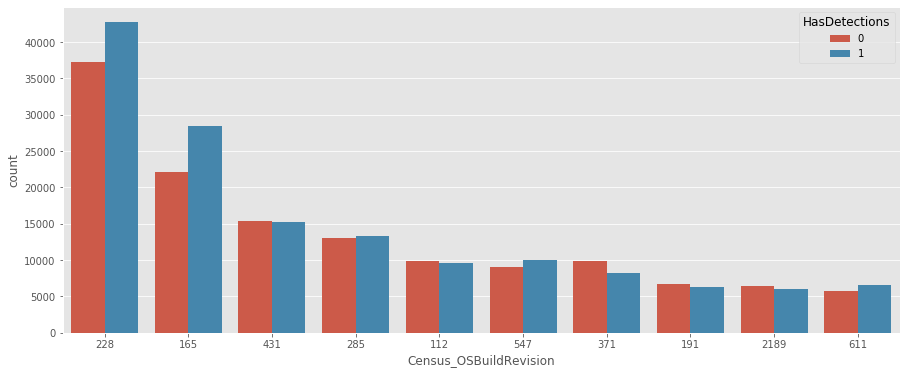

In [345]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSBuildRevision', hue='HasDetections', order=pd.value_counts(df['Census_OSBuildRevision']).iloc[:10].index)

In [346]:
df.pivot_table(index='Census_OSBuildRevision', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                       HasDetections HasDetections HasDetections
Census_OSBuildRevision                                          
228                            79975         42726          0.53
165                            50511         28404          0.56
431                            30519         15207          0.50
285                            26289         13265          0.50
112                            19503          9662          0.50
547                            19179         10065          0.52
371                            18195          8274          0.45
191                            12991          6257          0.48
2189                           12409          6031          0.49
611                            12267          6525          0.53
125                            12038          5516          0.46
17443                          11476          5570          0.49
1176                           10235          4540          0.44
492                             9467          4404          0.47
0                               9175          4695          0.51
309                             8293          3715          0.45
286                             7840          3763          0.48
15                              6717          3490          0.52
254                             6292          2888          0.46
1                               5999          3126          0.52

In [347]:
df['Census_OSBuildRevision'] = df['Census_OSBuildRevision'].astype(str)

In [348]:
df['Census_OSBuildRevision'].nunique()

242

Agrupamos los valores menos frequentes.

In [349]:
list = (df['Census_OSBuildRevision'].value_counts(dropna=True).values > 490)
len(list[list==True])

90

In [350]:
list_1 = df['Census_OSBuildRevision'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['Census_OSBuildRevision'].isin(list_1)==False, 'Census_OSBuildRevision'] = 'resto'

##### Atributo Census_OSEdition

Atributo categórico

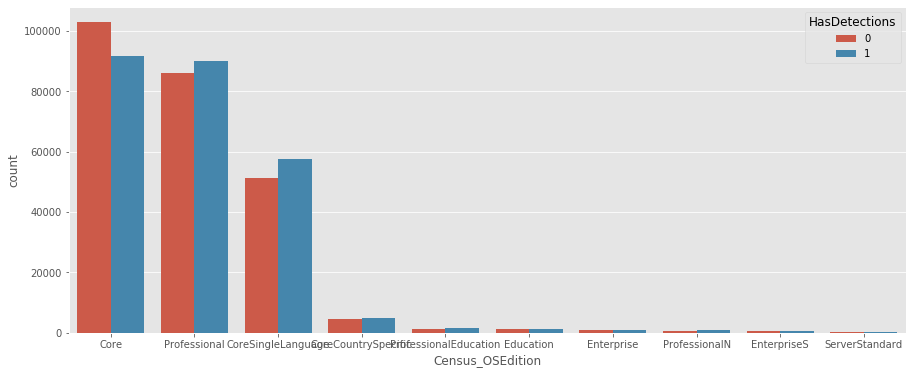

In [351]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSEdition', hue='HasDetections', order=pd.value_counts(df['Census_OSEdition']).iloc[:10].index)

In [352]:
df['Census_OSEdition'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Core                        194469
Professional                175808
CoreSingleLanguage          108696
CoreCountrySpecific           9275
ProfessionalEducation         3100
Education                     2310
Enterprise                    2055
ProfessionalN                 1624
EnterpriseS                   1108
ServerStandard                 584
Cloud                          336
CoreN                          251
ServerStandardEval             151
EducationN                      61
ServerDatacenterEval            47
EnterpriseSN                    47
ServerSolution                  34
EnterpriseN                     28
ProfessionalEducationN          12
ProfessionalWorkstation          2
ProfessionalWorkstationN         1
CloudN                           1
Name: Census_OSEdition, dtype: int64

In [353]:
df['Census_OSEdition'] = df['Census_OSEdition'].astype(str)

##### Atributo Census_OSSkuName

Atributo categórico. OS edition friendly name 

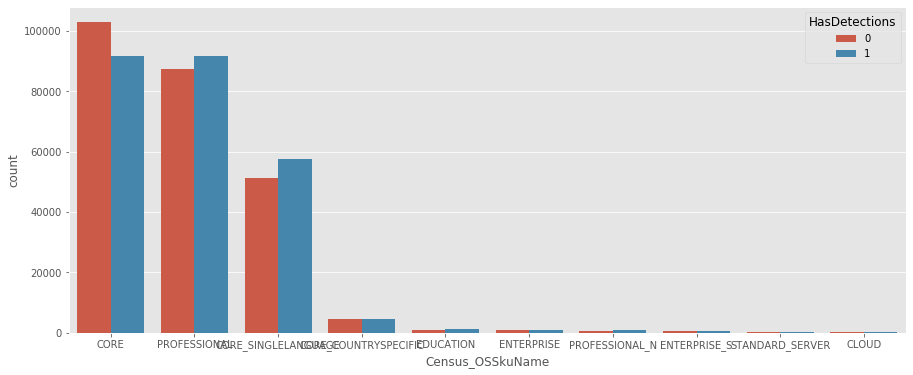

In [354]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSSkuName', hue='HasDetections', order=pd.value_counts(df['Census_OSSkuName']).iloc[:10].index)

In [355]:
df['Census_OSSkuName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

CORE                            194464
PROFESSIONAL                    178947
CORE_SINGLELANGUAGE             108674
CORE_COUNTRYSPECIFIC              9257
EDUCATION                         2313
ENTERPRISE                        2063
PROFESSIONAL_N                    1634
ENTERPRISE_S                      1107
STANDARD_SERVER                    584
CLOUD                              332
CORE_N                             251
STANDARD_EVALUATION_SERVER         151
EDUCATION_N                         61
ENTERPRISE_S_N                      48
DATACENTER_EVALUATION_SERVER        47
SB_SOLUTION_SERVER                  34
ENTERPRISE_N                        28
PRO_WORKSTATION                      2
PRO_WORKSTATION_N                    1
UNLICENSED                           1
CLOUDN                               1
Name: Census_OSSkuName, dtype: int64

In [356]:
df['Census_OSSkuName'] = df['Census_OSSkuName'].astype(str)

##### Atributo Census_OSInstallTypeName

Atributo categórico. Friendly description of what install was used on the machine 

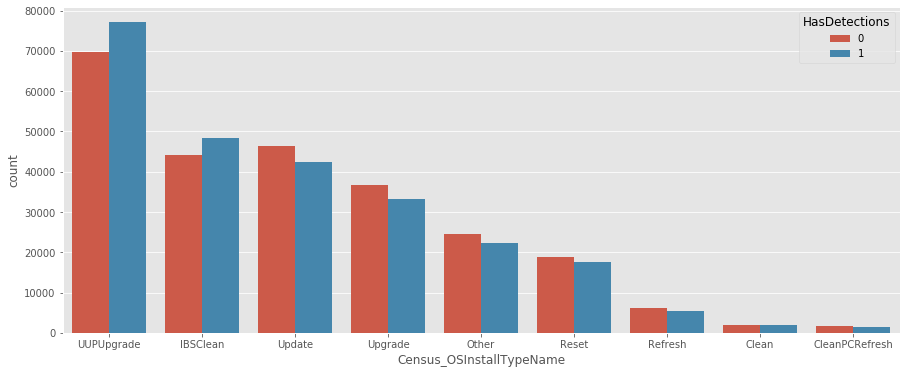

In [357]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSInstallTypeName', hue='HasDetections', order=pd.value_counts(df['Census_OSInstallTypeName']).iloc[:10].index)

In [358]:
df['Census_OSInstallTypeName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

UUPUpgrade        146780
IBSClean           92403
Update             88892
Upgrade            70013
Other              46960
Reset              36510
Refresh            11540
Clean               3885
CleanPCRefresh      3017
Name: Census_OSInstallTypeName, dtype: int64

Ojo con el UUPUpgrade que parece un error de Upgrade. Se dejó porque tiene muchas repeticiones y no estamos seguros del error.

In [359]:
df['Census_OSInstallTypeName'] = df['Census_OSInstallTypeName'].astype(str)

##### Atributo Census_OSInstallLanguageIdentifier

Atributo categórico. No tiene información. 

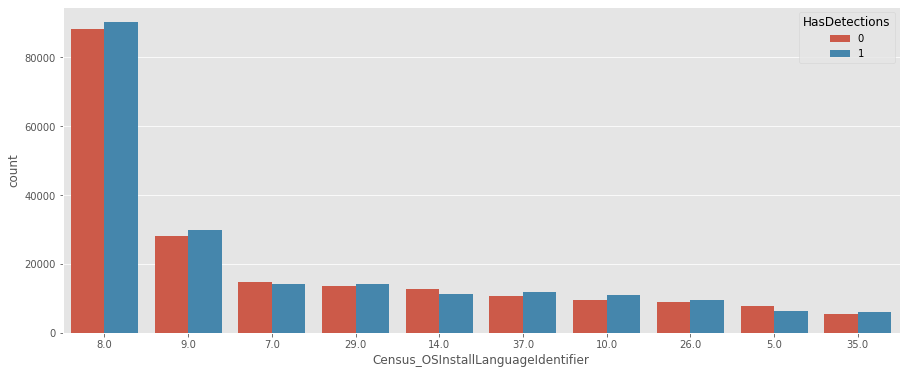

In [360]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSInstallLanguageIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_OSInstallLanguageIdentifier']).iloc[:10].index)

In [361]:
df.pivot_table(index='Census_OSInstallLanguageIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(40)

len           sum          mean
                                   HasDetections HasDetections HasDetections
Census_OSInstallLanguageIdentifier                                          
8.00                                      178405         90135          0.51
9.00                                       58013         29788          0.51
7.00                                       28766         14097          0.49
29.00                                      27669         14142          0.51
14.00                                      24191         11379          0.47
37.00                                      22635         11842          0.52
10.00                                      20268         10888          0.54
26.00                                      18520          9470          0.51
5.00                                       14085          6289          0.45
35.00                                      11497          6011          0.52
39.00                                      11221          5597          0.50
18.00                                      10600          5139          0.48
20.00                                       9512          4653          0.49
24.00                                       8127          3837          0.47
25.00                                       7502          3541          0.47
27.00                                       5956          2942          0.49
19.00                                       4775          2026          0.42
17.00                                       4695          2517          0.54
1.00                                        4516          2156          0.48
3.00                                        4067          1849          0.45
6.00                                        2881          1369          0.48
33.00                                       2807          1148          0.41
15.00                                       2311          1170          0.51
4.00                                        1996           825          0.41
30.00                                       1793           777          0.43
23.00                                       1652           646          0.39
31.00                                       1213           629          0.52
12.00                                       1119           412          0.37
2.00                                        1096           639          0.58
36.00                                        846           520          0.61
16.00                                        837           406          0.49
28.00                                        713           312          0.44
34.00                                        584           320          0.55
13.00                                        581           269          0.46
21.00                                        413           208          0.50
32.00                                        246           102          0.41
11.00                                        197            87          0.44
38.00                                        185            82          0.44
22.00                                        178            72          0.40

In [362]:
df['Census_OSInstallLanguageIdentifier'].nunique()

39

In [363]:
df['Census_OSInstallLanguageIdentifier'].fillna(value='-999', inplace=True)

In [364]:
df['Census_OSInstallLanguageIdentifier'] = df['Census_OSInstallLanguageIdentifier'].astype(str)

##### Atributo Census_OSUILocaleIdentifier

Atributo categórico. 

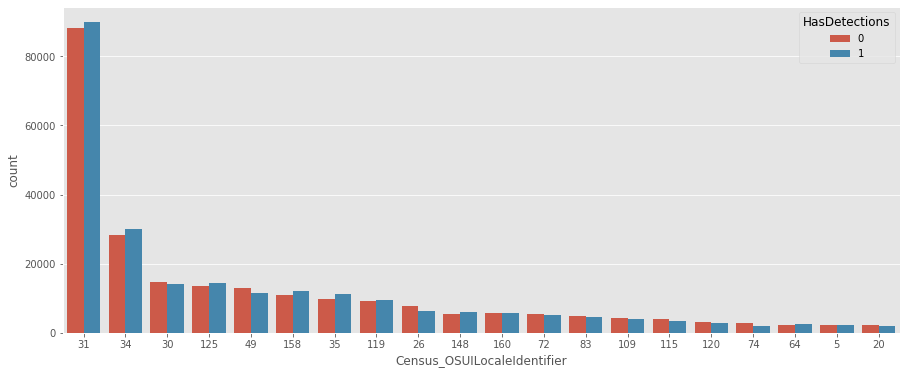

In [365]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSUILocaleIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_OSUILocaleIdentifier']).iloc[:20].index)

In [366]:
df.pivot_table(index='Census_OSUILocaleIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                            HasDetections HasDetections HasDetections
Census_OSUILocaleIdentifier                                          
31                                 177983         89849          0.50
34                                  58307         29943          0.51
30                                  28798         14096          0.49
125                                 28001         14334          0.51
49                                  24423         11482          0.47
158                                 22930         12002          0.52
35                                  20890         11256          0.54
119                                 18696          9556          0.51
26                                  14096          6284          0.45
148                                 11617          6060          0.52
160                                 11244          5613          0.50
72                                  10662          5168          0.48
83                                   9596          4699          0.49
109                                  8143          3848          0.47
115                                  7496          3544          0.47
120                                  5993          2961          0.49
74                                   4791          2040          0.43
64                                   4747          2544          0.54
5                                    4599          2204          0.48
20                                   4087          1858          0.45

In [367]:
df['Census_OSUILocaleIdentifier'].nunique()

92

Se limpiará un poco los outliers

In [368]:
list = df['Census_OSUILocaleIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(42).index
df.loc[df['Census_OSUILocaleIdentifier'].isin(list)==False, 'Census_OSUILocaleIdentifier'] = 'Resto'


In [369]:
df['Census_OSUILocaleIdentifier'] = df['Census_OSUILocaleIdentifier'].astype(str)

##### Atributo Census_OSWUAutoUpdateOptionsName

Categórica sin información

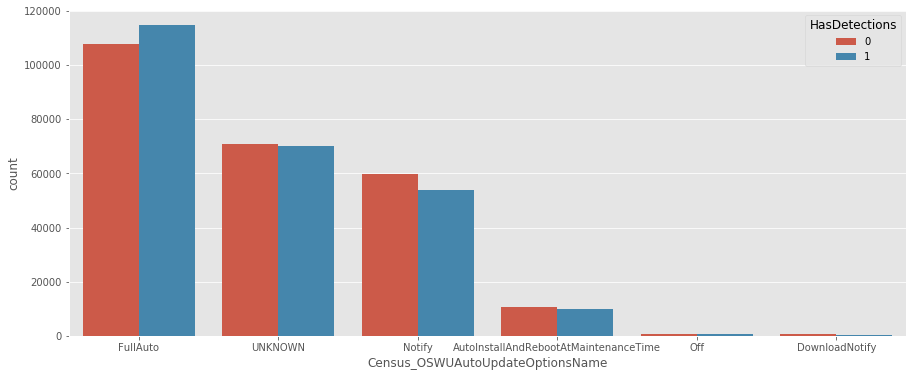

In [370]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSWUAutoUpdateOptionsName', hue='HasDetections', order=pd.value_counts(df['Census_OSWUAutoUpdateOptionsName']).iloc[:20].index)

In [371]:
df['Census_OSWUAutoUpdateOptionsName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

FullAuto                                 222482
UNKNOWN                                  140961
Notify                                   113507
AutoInstallAndRebootAtMaintenanceTime     20731
Off                                        1506
DownloadNotify                              813
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64

In [372]:
df['Census_OSWUAutoUpdateOptionsName'] = df['Census_OSWUAutoUpdateOptionsName'].astype(str)

##### Atributo Census_IsPortableOperatingSystem

Booleano que informa si es portatil el sistema operativo.

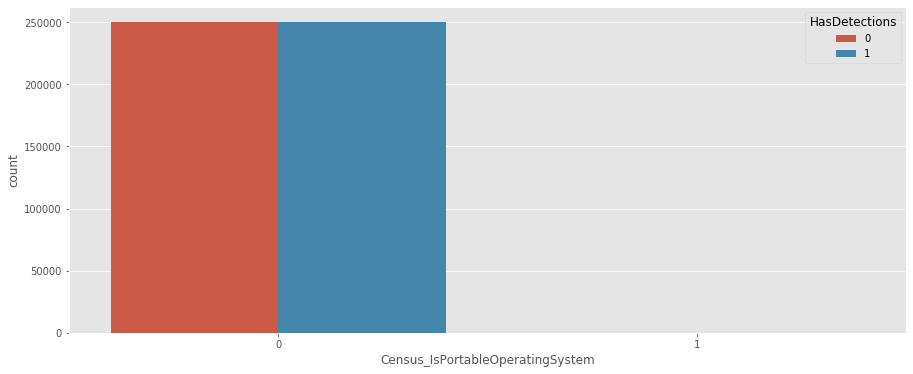

In [373]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsPortableOperatingSystem', hue='HasDetections', order=pd.value_counts(df['Census_IsPortableOperatingSystem']).iloc[:20].index)

In [374]:
df['Census_IsPortableOperatingSystem'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0    499739
1       261
Name: Census_IsPortableOperatingSystem, dtype: int64

In [375]:
pd.crosstab(df['Census_IsPortableOperatingSystem'], df['HasDetections'], normalize=False)

HasDetections                          0       1
Census_IsPortableOperatingSystem                
0                                 249921  249818
1                                    126     135

Es un atributo que no genera ningún tipo de valor al modelo. 

In [376]:
df.drop(columns='Census_IsPortableOperatingSystem', inplace=True)

##### Atributo Census_GenuineStateName

Categórica. Friendly name of OSGenuineStateID

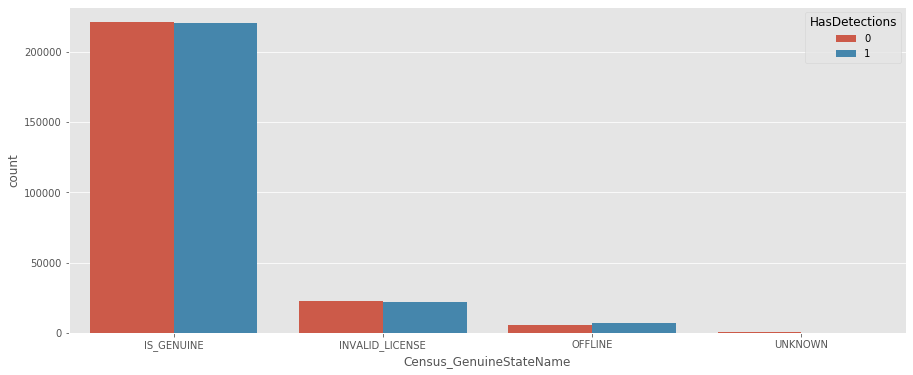

In [377]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_GenuineStateName', hue='HasDetections', order=pd.value_counts(df['Census_GenuineStateName']).iloc[:20].index)

##### Atributo Census_ActivationChannel

Categórica. Retail license key or Volume license key for a machine

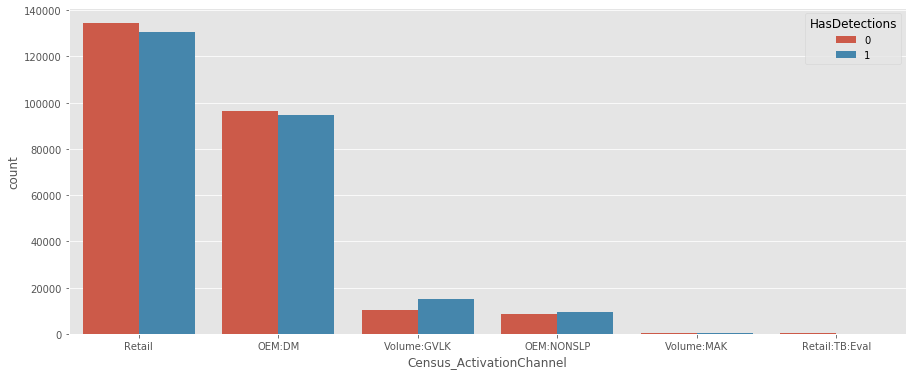

In [378]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ActivationChannel', hue='HasDetections', order=pd.value_counts(df['Census_ActivationChannel']).iloc[:20].index)

##### Atributo Census_IsFlightingInternal

Booleano sin información. 

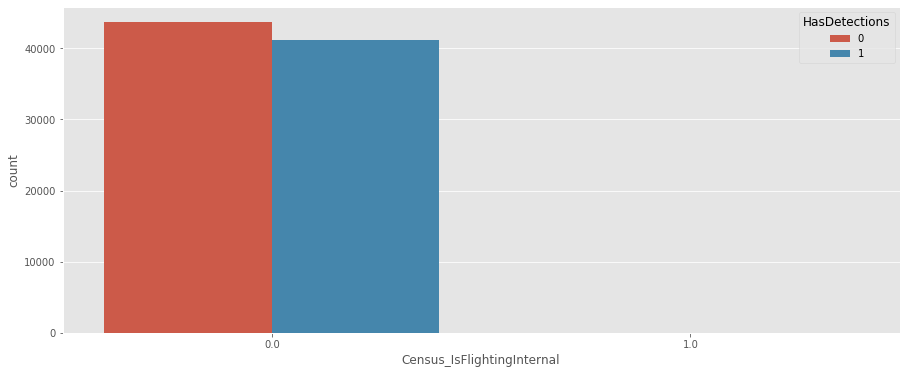

In [379]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsFlightingInternal', hue='HasDetections', order=pd.value_counts(df['Census_IsFlightingInternal']).iloc[:20].index)

In [380]:
df['Census_IsFlightingInternal'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

nan     415225
0.00     84773
1.00         2
Name: Census_IsFlightingInternal, dtype: int64

Este atributo no tiene ninguna información para el modelo.

In [381]:
df.drop(columns=['Census_IsFlightingInternal'], inplace=True)

##### Atributo Census_IsFlightsDisabled

Atributo booleano. Indicates if the machine is participating in flighting.

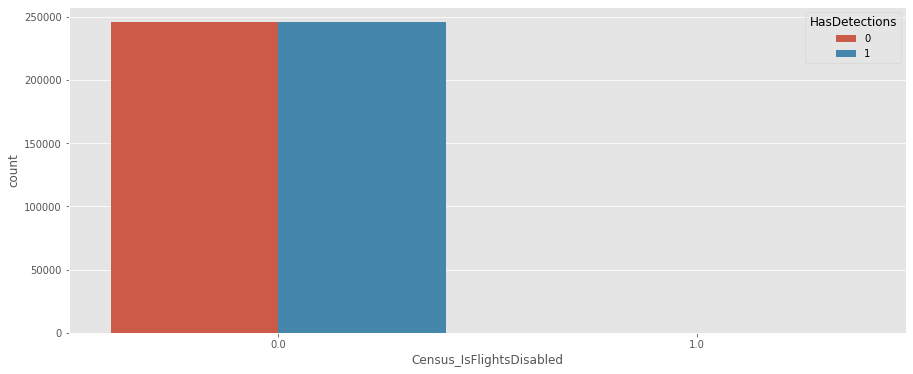

In [382]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsFlightsDisabled', hue='HasDetections', order=pd.value_counts(df['Census_IsFlightsDisabled']).iloc[:20].index)

In [383]:
df['Census_IsFlightsDisabled'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    491060
nan       8933
1.00         7
Name: Census_IsFlightsDisabled, dtype: int64

Atributo sin ninguna información. Será borrada

In [384]:
df.drop(columns=['Census_IsFlightsDisabled'], inplace=True)

##### Atributo Census_FlightRing

Categórica. The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring.

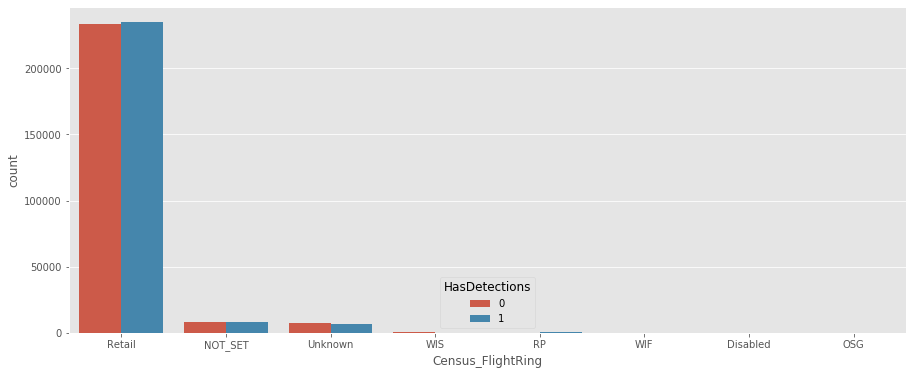

In [385]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_FlightRing', hue='HasDetections', order=pd.value_counts(df['Census_FlightRing']).iloc[:20].index)

In [386]:
df['Census_FlightRing'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Retail      468299
NOT_SET      16044
Unknown      13701
WIS            606
RP             583
WIF            549
Disabled       217
OSG              1
Name: Census_FlightRing, dtype: int64

##### Atributo Census_ThresholdOptIn

Booleano. Sin información. 

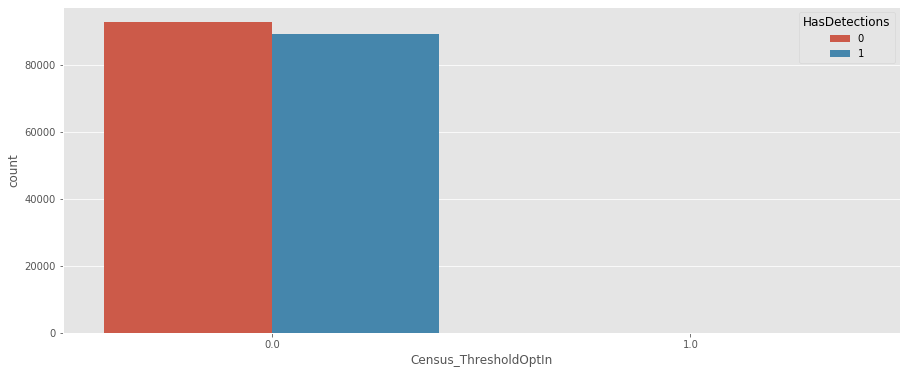

In [387]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ThresholdOptIn', hue='HasDetections', order=pd.value_counts(df['Census_ThresholdOptIn']).iloc[:20].index)

In [388]:
df['Census_ThresholdOptIn'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

nan     318104
0.00    181849
1.00        47
Name: Census_ThresholdOptIn, dtype: int64

No genera ningín valor al modelo. Se borra el atributo. 

In [389]:
df.drop(columns=['Census_ThresholdOptIn'], inplace=True)

##### Atributo Census_FirmwareManufacturerIdentifier

Categórico. Sin información. 

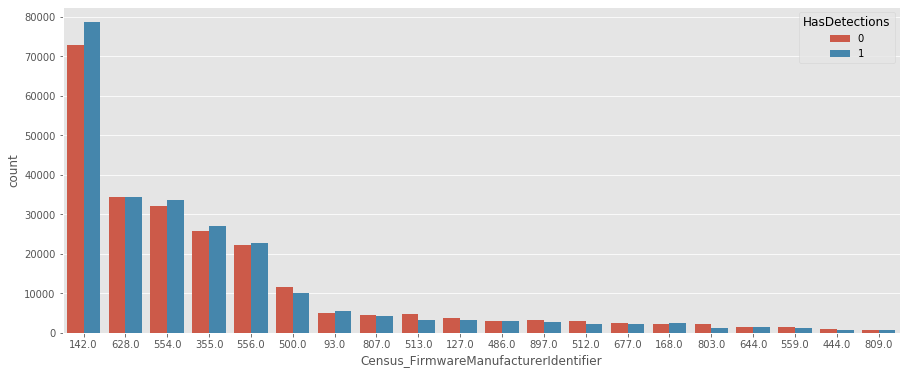

In [390]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_FirmwareManufacturerIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_FirmwareManufacturerIdentifier']).iloc[:20].index)

In [391]:
df.pivot_table(index='Census_FirmwareManufacturerIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum  \
                                      HasDetections HasDetections   
Census_FirmwareManufacturerIdentifier                               
142.00                                       151374         78575   
628.00                                        68781         34370   
554.00                                        65673         33489   
355.00                                        52758         26942   
556.00                                        44919         22664   
500.00                                        21686         10177   
93.00                                         10666          5582   
807.00                                         8803          4257   
513.00                                         7899          3216   
127.00                                         6933          3205   
486.00                                         6060          3015   
897.00                                         6001          2790   
512.00                                         5303          2320   
677.00                                         4656          2254   
168.00                                         4603          2414   
803.00                                         3321          1180   
644.00                                         2756          1347   
559.00                                         2575          1154   
444.00                                         1666           750   
809.00                                         1369           607   

                                               mean  
                                      HasDetections  
Census_FirmwareManufacturerIdentifier                
142.00                                         0.52  
628.00                                         0.50  
554.00                                         0.51  
355.00                                         0.51  
556.00                                         0.50  
500.00                                         0.47  
93.00                                          0.52  
807.00                                         0.48  
513.00                                         0.41  
127.00                                         0.46  
486.00                                         0.50  
897.00                                         0.46  
512.00                                         0.44  
677.00                                         0.48  
168.00                                         0.52  
803.00                                         0.36  
644.00                                         0.49  
559.00                                         0.45  
444.00                                         0.45  
809.00                                         0.44

In [392]:
df['Census_FirmwareManufacturerIdentifier'].nunique()

303

In [393]:
list = df['Census_FirmwareManufacturerIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(46).index
df.loc[df['Census_FirmwareManufacturerIdentifier'].isin(list)==False, 'Census_FirmwareManufacturerIdentifier'] = 'Resto'


In [394]:
df['Census_FirmwareManufacturerIdentifier'].fillna(value='-999', inplace=True)

In [395]:
df['Census_FirmwareManufacturerIdentifier'] = df['Census_FirmwareManufacturerIdentifier'].astype(str)

##### Atributo Census_FirmwareVersionIdentifier

Categórico sin información

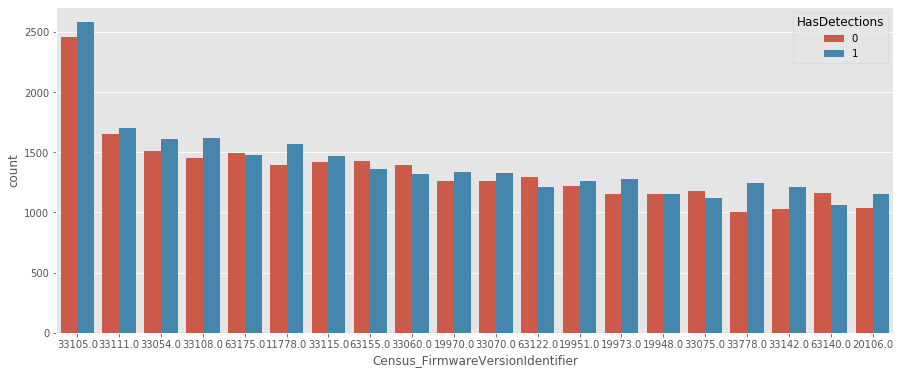

In [396]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_FirmwareVersionIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_FirmwareVersionIdentifier']).iloc[:20].index)

In [397]:
df.pivot_table(index='Census_FirmwareVersionIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                                 HasDetections HasDetections HasDetections
Census_FirmwareVersionIdentifier                                          
33,105.00                                 5036          2581          0.51
33,111.00                                 3356          1701          0.51
33,054.00                                 3124          1611          0.52
33,108.00                                 3071          1618          0.53
63,175.00                                 2968          1476          0.50
11,778.00                                 2962          1566          0.53
33,115.00                                 2882          1466          0.51
63,155.00                                 2792          1363          0.49
33,060.00                                 2715          1322          0.49
19,970.00                                 2600          1340          0.52
33,070.00                                 2590          1327          0.51
63,122.00                                 2508          1211          0.48
19,951.00                                 2481          1265          0.51
19,973.00                                 2429          1276          0.53
19,948.00                                 2310          1155          0.50
33,075.00                                 2299          1123          0.49
33,778.00                                 2250          1243          0.55
33,142.00                                 2243          1213          0.54
63,140.00                                 2225          1062          0.48
20,106.00                                 2186          1151          0.53

In [398]:
df['Census_FirmwareVersionIdentifier'].nunique()

23569

Se agruparán los valores con poca frequencia

In [399]:
list = (df['Census_FirmwareVersionIdentifier'].value_counts(dropna=True).values > 490)
len(list[list==True])


140

In [400]:
list_1 = df['Census_FirmwareVersionIdentifier'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['Census_FirmwareVersionIdentifier'].isin(list_1)==False, 'Census_FirmwareVersionIdentifier'] = 'resto'

In [401]:
df['Census_FirmwareVersionIdentifier'].fillna(value='-999', inplace=True)

In [402]:
df['Census_FirmwareVersionIdentifier'] = df['Census_FirmwareVersionIdentifier'].astype(str)

##### Atributo Census_IsSecureBootEnabled

Booleano. Indicates if Secure Boot mode is enabled

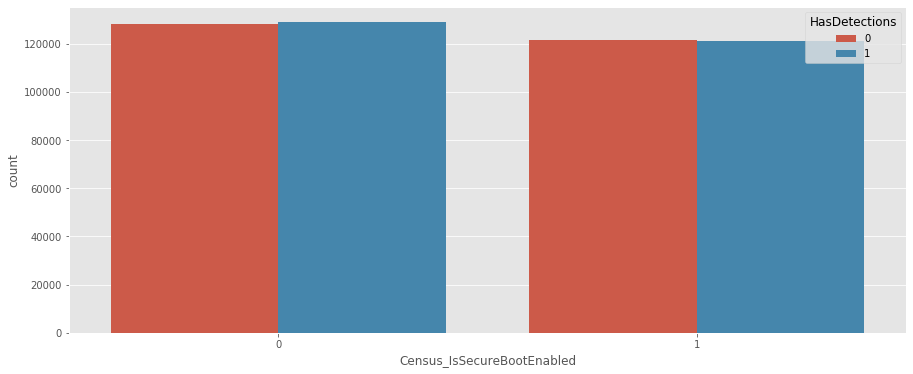

In [403]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsSecureBootEnabled', hue='HasDetections', order=pd.value_counts(df['Census_IsSecureBootEnabled']).iloc[:20].index)

##### Atributo Census_IsWIMBootEnabled

Booleano. Identifies a Virtual Machine 

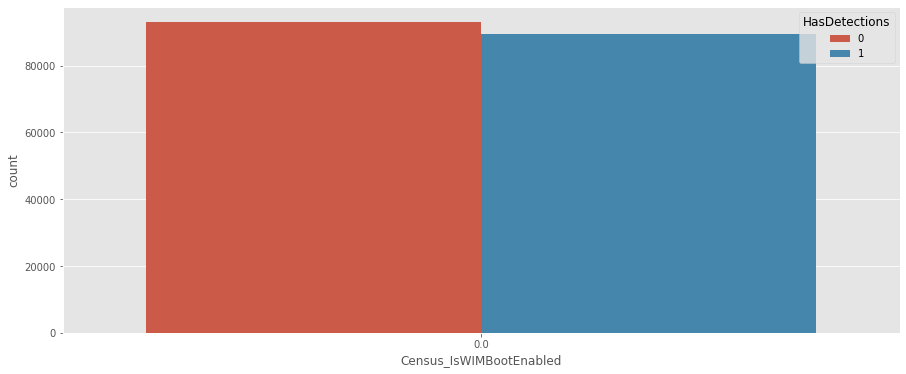

In [404]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsWIMBootEnabled', hue='HasDetections', order=pd.value_counts(df['Census_IsWIMBootEnabled']).iloc[:20].index)

In [405]:
df['Census_IsWIMBootEnabled'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

nan     317666
0.00    182334
Name: Census_IsWIMBootEnabled, dtype: int64

Atributo sin ninguna información. 

In [406]:
df.drop(columns=['Census_IsWIMBootEnabled'], inplace=True)

##### Atributo Census_IsVirtualDevice

Atributo booleano que identifica si se existe maquina virtual.

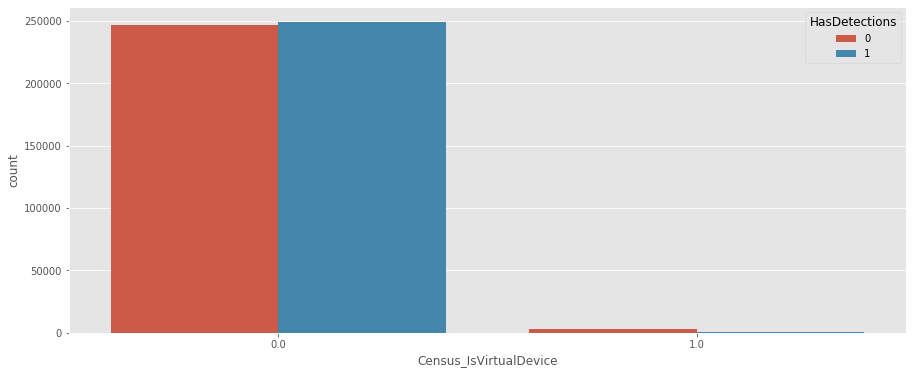

In [407]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsVirtualDevice', hue='HasDetections', order=pd.value_counts(df['Census_IsVirtualDevice']).iloc[:20].index)

In [408]:
df['Census_IsVirtualDevice'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    495572
1.00      3527
nan        901
Name: Census_IsVirtualDevice, dtype: int64

In [409]:
df['Census_IsVirtualDevice'].fillna(value=-1, inplace=True)

In [410]:
df['Census_IsVirtualDevice'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00     495572
1.00       3527
-1.00       901
Name: Census_IsVirtualDevice, dtype: int64

##### Atributo Census_IsTouchEnabled

Atributo booleano. Identifica si el equipo es touch. 

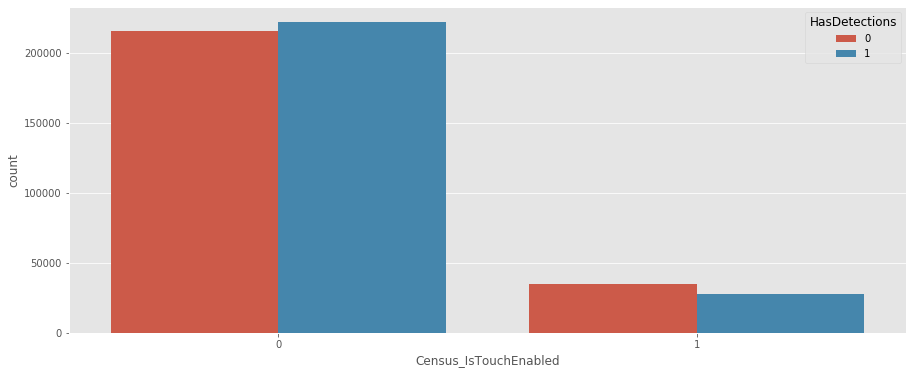

In [411]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsTouchEnabled', hue='HasDetections', order=pd.value_counts(df['Census_IsTouchEnabled']).iloc[:20].index)

In [412]:
df['Census_IsTouchEnabled'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0    437283
1     62717
Name: Census_IsTouchEnabled, dtype: int64

##### Atributo Census_IsPenCapable

Atributo booleano. Identifica si el equipo está adapatado para lapiz táctil. 

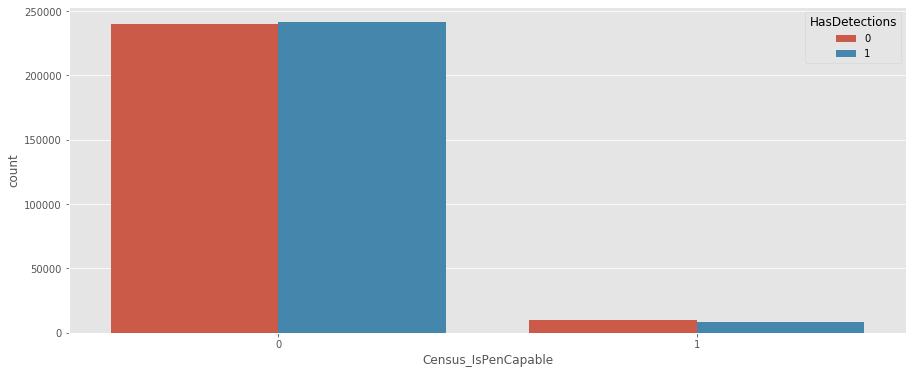

In [413]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsPenCapable', hue='HasDetections', order=pd.value_counts(df['Census_IsPenCapable']).iloc[:20].index)

In [414]:
df['Census_IsPenCapable'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0    481128
1     18872
Name: Census_IsPenCapable, dtype: int64

##### Atributo Census_IsAlwaysOnAlwaysConnectedCapable

Atributo booleano. Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected 

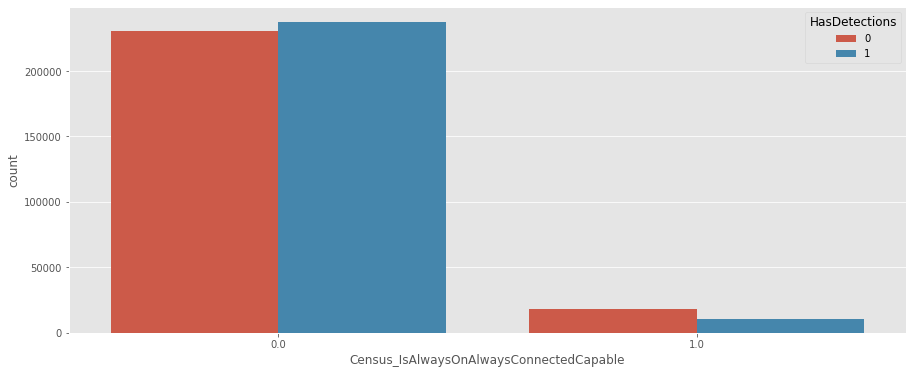

In [415]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsAlwaysOnAlwaysConnectedCapable', hue='HasDetections', order=pd.value_counts(df['Census_IsAlwaysOnAlwaysConnectedCapable']).iloc[:20].index)

In [416]:
df['Census_IsAlwaysOnAlwaysConnectedCapable'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    467569
1.00     28391
nan       4040
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: int64

In [417]:
df['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(value=-1, inplace=True)

##### Atributo Wdft_IsGamer

Attibuto booleano. Identifica si el ordenador es gamer. 

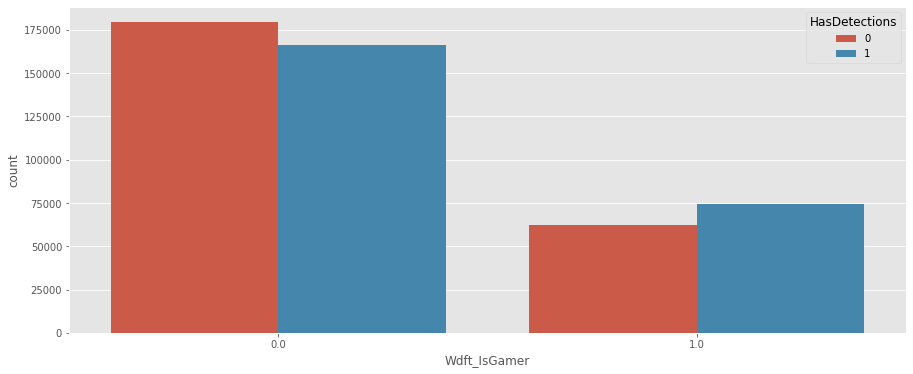

In [418]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Wdft_IsGamer', hue='HasDetections', order=pd.value_counts(df['Wdft_IsGamer']).iloc[:20].index)

In [419]:
df['Wdft_IsGamer'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    345835
1.00    137215
nan      16950
Name: Wdft_IsGamer, dtype: int64

In [420]:
df['Wdft_IsGamer'].fillna(value=-1, inplace=True)

##### Atributo Wdft_RegionIdentifier

Parece categórica. No tiene información. 

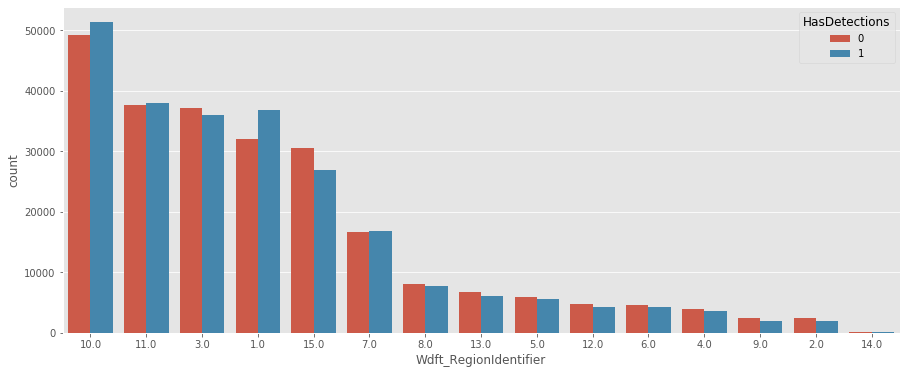

In [421]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Wdft_RegionIdentifier', hue='HasDetections', order=pd.value_counts(df['Wdft_RegionIdentifier']).iloc[:20].index)

In [422]:
df.pivot_table(index='Wdft_RegionIdentifier', values='HasDetections', aggfunc=[len, sum, np.mean]).sort_values(by=( 'len', 'HasDetections'), ascending=False).head(20)

len           sum          mean
                      HasDetections HasDetections HasDetections
Wdft_RegionIdentifier                                          
10.00                        100392         51294          0.51
11.00                         75612         37981          0.50
3.00                          73069         35898          0.49
1.00                          68692         36762          0.54
15.00                         57346         26848          0.47
7.00                          33362         16750          0.50
8.00                          15761          7732          0.49
13.00                         12681          6001          0.47
5.00                          11466          5521          0.48
12.00                          9115          4294          0.47
6.00                           8750          4234          0.48
4.00                           7586          3600          0.47
9.00                           4521          2025          0.45
2.00                           4470          2026          0.45
14.00                           227           128          0.56

In [423]:
df['Wdft_RegionIdentifier'].nunique()

15

In [424]:
df['Wdft_RegionIdentifier'].fillna(value='-999', inplace=True)

In [425]:
df['Wdft_RegionIdentifier'] = df['Wdft_RegionIdentifier'].astype(str)

### Separación de atributos

Se usa una función para separar los valores en categóricas, booleanas y numéricas. No se usará en el cálculo ya que no divide bien las variables, sin embargo da una buena visión.

In [426]:
target = df['HasDetections']

In [427]:
def obtener_lista_variables(dataset, target=[]):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="int32") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="int32") and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype=="object" or dataset[i].dtype != "int64") and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [428]:
list_num, list_bool, list_cat = obtener_lista_variables(df, target)

In [429]:
list_num

['RtpStateBitfield',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'IsProtected',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

In [430]:
list_bool

['IsSxsPassiveMode',
 'HasTpm',
 'Census_HasOpticalDiskDrive',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'HasDetections',
 'Census_DeviceFamily_IsDesktop']

In [431]:
list_cat

['ProductName',
 'AppVersion',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Ce

In [432]:
df.isnull().sum()

ProductName                                          0
AppVersion                                           0
RtpStateBitfield                                     0
IsSxsPassiveMode                                     0
DefaultBrowsersIdentifier                            0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
AVProductsEnabled                                    0
HasTpm                                               0
CountryIdentifier                                    0
CityIdentifier                                       0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
Platform                                             0
Processor                                            0
OsBuild                                              0
OsSuite                                              0
OsPlatform

### Correlación entre atributos numéricos

Aunque se coloque todo el dataframe en el mapa de calor, solo tomará los valores numéricos y booleanos. 

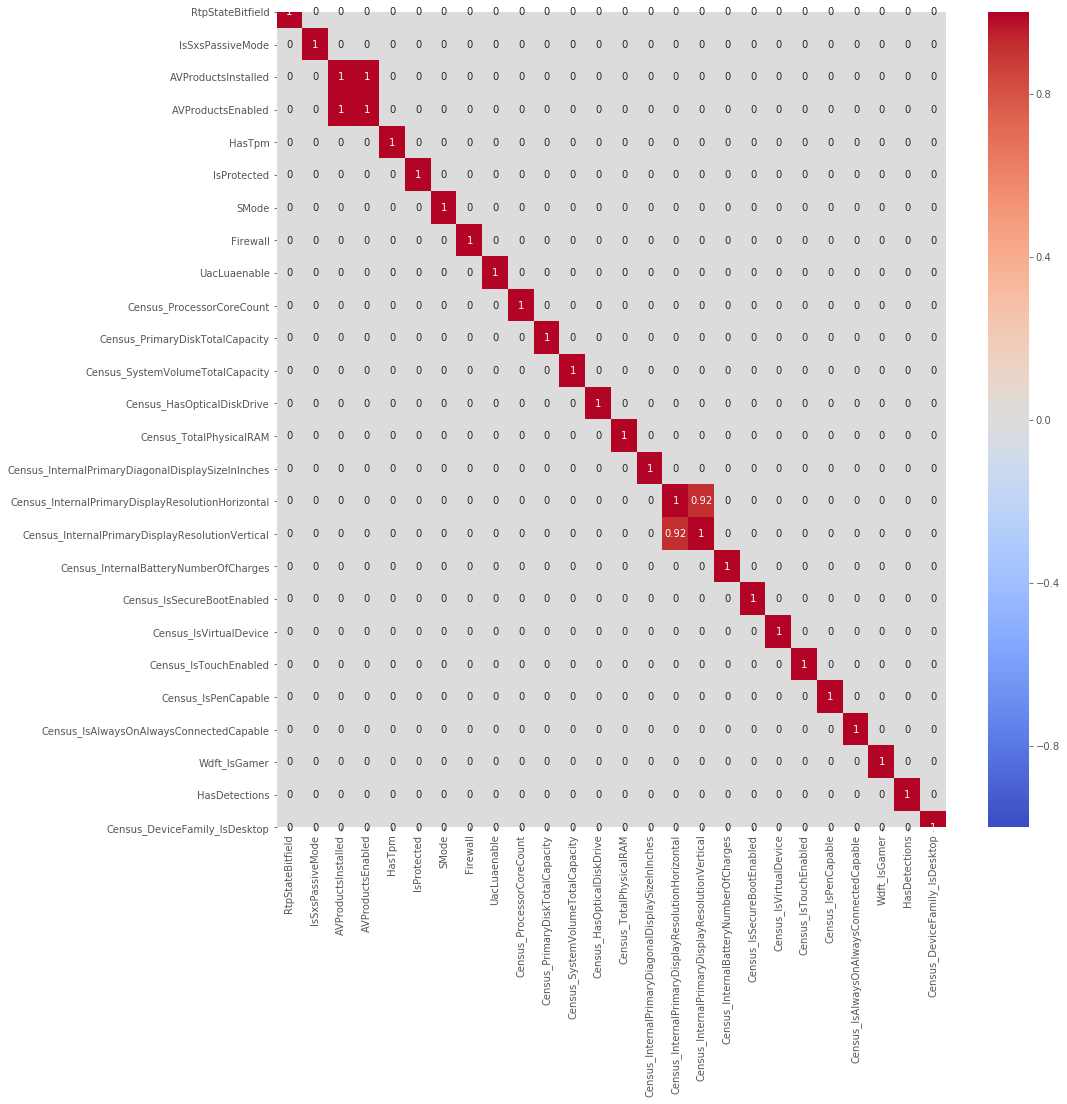

In [433]:
corr = df.corr()
corr[np.abs(corr)<.9] = 0
plt.figure(figsize=(15,15))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

Al parecer existen dos categorías muy correlacionadas. 
AVPorductInstalled vs AVPorductEnabled, lo que parece obvio. 
Census_InternalPrimaryDisplayResolutionHorizontal y Census_InternalPrimaryDisplayResolutionVertical, lo que es aún más obvio.

Por estar usando el Arbol de decisión no borraremos ninguna. 

### Tramiento de las categóricas.

#### Análisis de categóricas

Aunque se han aplicado varios tipos de encoding de categorias, se termina aplicando solo el OHE.

Las columnas se obtienen del análisis en un Excel aparte.

In [434]:
list_ohe = [
'AvSigVersion_g', 
'AVProductStatesIdentifier', 
'CityIdentifier',
'Census_OEMNameIdentifier',
'Census_OEMModelIdentifier',
'Census_ProcessorModelIdentifier',
'Census_FirmwareVersionIdentifier',
'ProductName', 
'EngineVersion_g', 
'AppVersion', 
'DefaultBrowsersIdentifier',
'CountryIdentifier',
'OsBuildLab',
'IeVerIdentifier',
'OrganizationIdentifier',
'LocaleEnglishNameIdentifier',
'GeoNameIdentifier',
'Platform',
'Processor',
'OsVer',
'OsBuild',
'OsSuite',
'OsPlatformSubRelease',
'SkuEdition',
'SmartScreen',
'Census_MDC2FormFactor',
'Census_ProcessorManufacturerIdentifier',
'Census_PrimaryDiskTypeName',
'Census_ChassisTypeName',
'Census_PowerPlatformRoleName',
'Census_InternalBatteryType',
'Census_OSArchitecture',
'Census_OSBranch',
'Census_OSEdition',
'Census_FirmwareManufacturerIdentifier',
'Census_OSVersion',
'Census_OSUILocaleIdentifier',
'Census_OSSkuName',
'Census_OSBuildRevision',
'Census_OSInstallTypeName',
'Census_OSInstallLanguageIdentifier',
'Census_OSWUAutoUpdateOptionsName',
'Census_GenuineStateName',
'Census_OSBuildNumber',
'Census_ActivationChannel',
'Census_OSUILocaleIdentifier',
'Census_FlightRing',
'Wdft_RegionIdentifier'
]


In [435]:
for i in list_ohe:
    print(i," ",df[i].nunique())

AvSigVersion_g   165
AVProductStatesIdentifier   46
CityIdentifier   152
Census_OEMNameIdentifier   43
Census_OEMModelIdentifier   798
Census_ProcessorModelIdentifier   203
Census_FirmwareVersionIdentifier   141
ProductName   2
EngineVersion_g   32
AppVersion   44
DefaultBrowsersIdentifier   35
CountryIdentifier   120
OsBuildLab   52
IeVerIdentifier   63
OrganizationIdentifier   16
LocaleEnglishNameIdentifier   108
GeoNameIdentifier   85
Platform   4
Processor   3
OsVer   3
OsBuild   12
OsSuite   4
OsPlatformSubRelease   9
SkuEdition   8
SmartScreen   9
Census_MDC2FormFactor   12
Census_ProcessorManufacturerIdentifier   5
Census_PrimaryDiskTypeName   4
Census_ChassisTypeName   21
Census_PowerPlatformRoleName   10
Census_InternalBatteryType   12
Census_OSArchitecture   2
Census_OSBranch   15
Census_OSEdition   22
Census_FirmwareManufacturerIdentifier   47
Census_OSVersion   92
Census_OSUILocaleIdentifier   43
Census_OSSkuName   21
Census_OSBuildRevision   91
Census_OSInstallTypeName   9

#### One Hot Encoding

In [458]:
df_d=pd.get_dummies(data=df,
                   prefix=None, 
                   prefix_sep="_",
                   columns=list_ohe,
                   drop_first="False",
                   dtype=None)

In [459]:
df_d.head()

RtpStateBitfield  IsSxsPassiveMode  AVProductsInstalled  AVProductsEnabled  \
0                 7                 0                    1                  1   
1                 7                 0                    1                  1   
2                 7                 0                    2                  1   
3                 7                 0                    1                  1   
4                 7                 0                    2                  1   

   HasTpm  IsProtected  SMode  Firewall  UacLuaenable  \
0       1         1.00   0.00      1.00          1.00   
1       1         1.00   0.00      1.00          1.00   
2       1         1.00   0.00      1.00          1.00   
3       1         1.00   0.00      1.00          1.00   
4       1         1.00   0.00      1.00          1.00   

   Census_ProcessorCoreCount  ...  Wdft_RegionIdentifier_14.0  \
0                       4.00  ...                           0   
1                       4.00  ...                           0   
2                       4.00  ...                           0   
3                       8.00  ...                           0   
4                       4.00  ...                           0   

   Wdft_RegionIdentifier_15.0  Wdft_RegionIdentifier_2.0  \
0                           0                          0   
1                           0                          0   
2                           1                          0   
3                           1                          0   
4                           0                          0   

   Wdft_RegionIdentifier_3.0  Wdft_RegionIdentifier_4.0  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Wdft_RegionIdentifier_5.0  Wdft_RegionIdentifier_6.0  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Wdft_RegionIdentifier_7.0  Wdft_RegionIdentifier_8.0  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Wdft_RegionIdentifier_9.0  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 2671 columns]

#### Frequency Encoding

In [516]:
#for i in list_freq:
    #fe = df.groupby(i).size()/len
    #df_dummies.loc[:,i+'_freq'] = df[i].map(fe)

No fue utilizado al final

#### Mean Encoding

In [517]:
#for i in list_mean:
    #mean_encode = df.groupby(i)['HasDetections'].mean()
    #df_d[i+'_mean'] = df[i].map(mean_encode)

In [518]:
#df_d.drop(columns=list_mean,axis=1,inplace=True)

#### Exportamos Dataset limpio

In [519]:
#df_d.to_csv('df_clean.csv')

In [520]:
#df_d = pd.read_csv('df_clean.csv', sep=',', encoding='utf-8', index_col=True, skipinitialspace=True)

In [521]:
#df_d.head(1)

RtpStateBitfield  IsSxsPassiveMode  AVProductsInstalled  AVProductsEnabled  \
0                 7                 0                    1                  1   

   HasTpm  IsProtected  SMode  Firewall  UacLuaenable  \
0       1         1.00   0.00      1.00          1.00   

   Census_ProcessorCoreCount  ...  Wdft_RegionIdentifier_7.0  \
0                       4.00  ...                          0   

   Wdft_RegionIdentifier_8.0  Wdft_RegionIdentifier_9.0  \
0                          0                          0   

   Wdft_RegionIdentifier_10.0  Wdft_RegionIdentifier_11.0  \
0                           0                           1   

   Wdft_RegionIdentifier_12.0  Wdft_RegionIdentifier_13.0  \
0                           0                           0   

   Wdft_RegionIdentifier_14.0  Wdft_RegionIdentifier_15.0  \
0                           0                           0   

   Wdft_RegionIdentifier_-999  
0                           0  

[1 rows x 1911 columns]

## Modelelling

### Train / Test Split

#### Generación de la partición de validación

Como el dataset no está particionado temporalmente tomaremos una porción aleatoria. 

In [460]:
val_df = df_d.sample(frac=0.2, random_state=42)

In [461]:
val_df.shape

(100000, 2671)

In [462]:
dev_df = df_d.drop(val_df.index)

In [463]:
dev_df.shape

(400000, 2671)

Una vez realizada la selección de particiones, vamos a asignar los atributos y el target a las variables X e y, respectivamente.

In [464]:
dev_df_X = dev_df.drop('HasDetections', axis=1)
dev_df_y = dev_df[['HasDetections']]

In [465]:
val_df_X = val_df.drop('HasDetections', axis=1)
val_df_y = val_df[['HasDetections']]

#### Random Holdout

In [466]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [467]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280000 entries, 376066 to 152343
Columns: 2670 entries, RtpStateBitfield to Wdft_RegionIdentifier_9.0
dtypes: float64(13), int32(6), int64(6), uint8(2645)
memory usage: 755.4 MB


In [468]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 28915 to 451013
Columns: 2670 entries, RtpStateBitfield to Wdft_RegionIdentifier_9.0
dtypes: float64(13), int32(6), int64(6), uint8(2645)
memory usage: 323.8 MB


In [469]:
X_train.describe().T.head()

count  mean   std     min  25%  50%  75%  max
RtpStateBitfield    280,000.00  3.24 60.16 -999.00 7.00 7.00 7.00 8.00
IsSxsPassiveMode    280,000.00  0.02  0.13    0.00 0.00 0.00 0.00 1.00
AVProductsInstalled 280,000.00 -2.46 61.41 -999.00 1.00 1.00 2.00 5.00
AVProductsEnabled   280,000.00 -2.76 61.38 -999.00 1.00 1.00 1.00 4.00
HasTpm              280,000.00  0.99  0.11    0.00 1.00 1.00 1.00 1.00

In [470]:
X_test.describe().T.head()

count  mean   std     min  25%  50%  75%  max
RtpStateBitfield    120,000.00  2.77 63.89 -999.00 7.00 7.00 7.00 8.00
IsSxsPassiveMode    120,000.00  0.02  0.13    0.00 0.00 0.00 0.00 1.00
AVProductsInstalled 120,000.00 -2.58 62.42 -999.00 1.00 1.00 2.00 5.00
AVProductsEnabled   120,000.00 -2.89 62.40 -999.00 1.00 1.00 1.00 4.00
HasTpm              120,000.00  0.99  0.11    0.00 1.00 1.00 1.00 1.00

In [471]:
y_train.describe().T.head()

count  mean  std  min  25%  50%  75%  max
HasDetections 280,000.00  0.50 0.50 0.00 0.00 0.00 1.00 1.00

In [472]:
y_test.describe().T.head()

count  mean  std  min  25%  50%  75%  max
HasDetections 120,000.00  0.50 0.50 0.00 0.00 0.00 1.00 1.00

### Model definition

Directamente probamos a diferentes profundidades el modelo a ver en que momento empieza a generar overfitting

In [423]:
for i in range(1, 13):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
        
    y_score_train = pd.DataFrame(dt.predict_proba(X_train)[:,1], index=y_train.index)
    
    auc_score_train = metrics.roc_auc_score(y_train, y_score_train)
    
    y_score_test = pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index)
    
    auc_score_test = metrics.roc_auc_score(y_test, y_score_test)
    
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, auc_score_train, auc_score_test))

Profundidad del árbol: 1. Train: 0.5725163420600099 - Test: 0.574306101379368
Profundidad del árbol: 2. Train: 0.599711318403825 - Test: 0.6009256954205665
Profundidad del árbol: 3. Train: 0.6192156396093457 - Test: 0.6185583755084376
Profundidad del árbol: 4. Train: 0.6321244288290715 - Test: 0.6305561858863915
Profundidad del árbol: 5. Train: 0.6413309386854018 - Test: 0.6401691302858206
Profundidad del árbol: 6. Train: 0.649726989096101 - Test: 0.6477967364411727
Profundidad del árbol: 7. Train: 0.6559577731094073 - Test: 0.6517261558074412
Profundidad del árbol: 8. Train: 0.6630675520284848 - Test: 0.6550150613807407
Profundidad del árbol: 9. Train: 0.6713067551337157 - Test: 0.6561099761538778
Profundidad del árbol: 10. Train: 0.6798840427572612 - Test: 0.6568399801693593
Profundidad del árbol: 11. Train: 0.6892838060045473 - Test: 0.6570238140911417
Profundidad del árbol: 12. Train: 0.6998461879150917 - Test: 0.6566617841695117
Profundidad del árbol: 13. Train: 0.7113160030332055

A partir de la profundidad 8 en el modelo se empieza a generar overfitting

Se prueba el modelo con diferentes valores de min_samples_split

In [424]:
for i in (100, 500, 700, 1000, 5000):
    dt = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=i)
    dt.fit(X_train, y_train)
    
    y_score_train = pd.DataFrame(dt.predict_proba(X_train)[:,1], index=y_train.index)
    
    auc_score_train = metrics.roc_auc_score(y_train, y_score_train)
    
    y_score_test = pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index)
    
    auc_score_test = metrics.roc_auc_score(y_test, y_score_test)
    
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, auc_score_train, auc_score_test))

Profundidad del árbol: 100. Train: 0.6624607177380191 - Test: 0.6549834195456177
Profundidad del árbol: 500. Train: 0.6614605770456687 - Test: 0.6550844854733915
Profundidad del árbol: 700. Train: 0.6608169576389569 - Test: 0.6552175964311094
Profundidad del árbol: 1000. Train: 0.6599602780224155 - Test: 0.6551782802832596
Profundidad del árbol: 5000. Train: 0.6553780522732896 - Test: 0.6523239762271822


Se puede observar que hay muy poco cambio entre 100 y 5000. Se usará el valor de 700. 

In [489]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=9, # Importante, regulará el sobreajuste
                        min_samples_split=700,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )


In [490]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=700,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

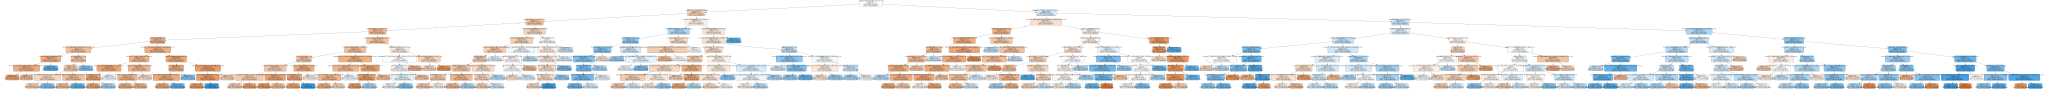

In [491]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        # out_file=None,
                        # max_depth=None,
                        feature_names=X_test.columns,
                        class_names=['HasDetections', 'NotHasDetections'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=False,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

En el arbol se logra ver que la variable más relevante es AVProductStatesIdentifier.

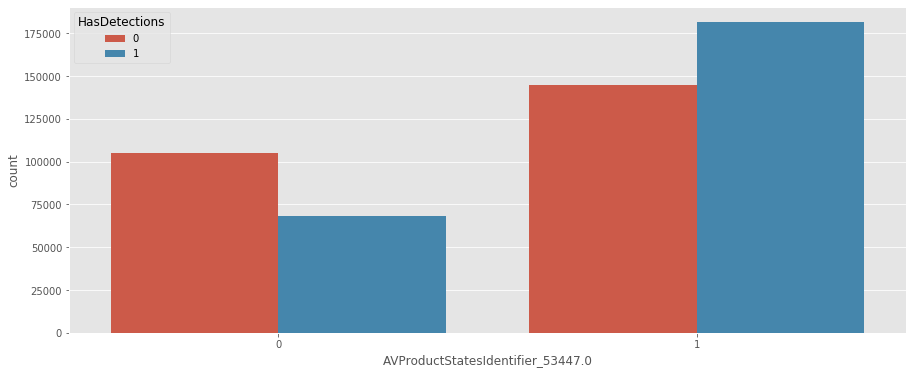

In [537]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df_d, x='AVProductStatesIdentifier_53447.0', hue='HasDetections')

In [512]:
top_features_dt = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [513]:
top_features_dt

AVProductStatesIdentifier_53447.0                   0.26
Census_TotalPhysicalRAM                             0.10
SmartScreen_ExistsNotSet                            0.09
Census_InternalBatteryType_resto                    0.08
EngineVersion_g_1.1.151                             0.07
Census_OSInstallTypeName_UUPUpgrade                 0.04
SmartScreen_RequireAdmin                            0.04
Census_InternalPrimaryDiagonalDisplaySizeInInches   0.02
Census_OSInstallTypeName_Update                     0.02
Wdft_IsGamer                                        0.02
EngineVersion_g_1.1.152                             0.02
AppVersion_4.18.1807.18075                          0.02
Census_IsVirtualDevice                              0.02
AVProductStatesIdentifier_63682.0                   0.02
Census_OSSkuName_CORE_SINGLELANGUAGE                0.01
OsPlatformSubRelease_windows7                       0.01
Census_PrimaryDiskTotalCapacity                     0.01
AVProductsInstalled            

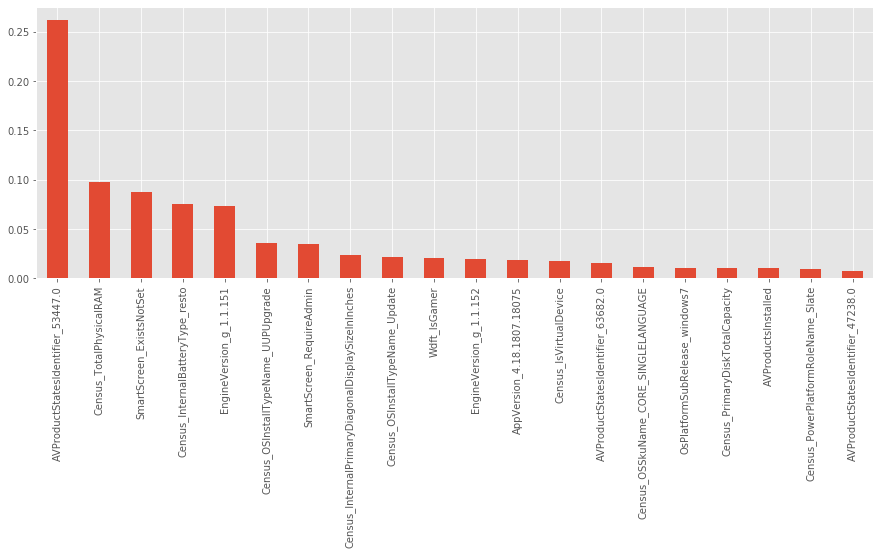

In [514]:
plt.figure(figsize=(15,5))
top_features_dt.plot(kind='bar')

Esta gráfica es muy interesante ya que muestra los atributos que definen el arbol. 
La identificación de los virus es muy importante, extrañamente el Ram del ordenador también lo es, SmartSreen tiene sentido que lo sea porque es una función de seguridad de Windows, y la batería entra en el arbol con el grupo resto, lo cual es un poco extraño. 

In [ ]:
def get_gain_table(model, X_test, y_test):
    y_score = pd.DataFrame(model.predict_proba(X_test)[:,1], index=y_test.index, columns=['Score'])
    results_df = y_test.join(y_score)
    results_df['Decile'] = pd.qcut(results_df['Score'], q=10)
    results_summary_table = results_df.pivot_table(index='Decile', values=y_test.columns, aggfunc=[len, np.sum, np.mean]).sort_index(ascending=False)
    results_summary_table.columns = ['Cases', 'Responses', 'Accuracy']
    results_summary_table['Pct. Cases'] = results_summary_table['Cases'] / results_summary_table['Cases'].sum()
    results_summary_table['Pct. Responses'] = results_summary_table['Responses'] / results_summary_table['Responses'].sum()
    results_summary_table['Cum. Cases'] = results_summary_table['Cases'].cumsum()
    results_summary_table['Cum. Responses'] = results_summary_table['Responses'].cumsum()
    results_summary_table['Cum. Pct. Cases'] = results_summary_table['Pct. Cases'].cumsum()
    results_summary_table['Cum. Pct. Responses'] = results_summary_table['Pct. Responses'].cumsum()
    return results_summary_table

In [495]:
get_gain_table(dt, X_test, y_test)

Cases  Responses  Accuracy  Pct. Cases  Pct. Responses  \
Decile                                                                    
(0.656, 1.0]     11899       8985      0.76        0.10            0.15   
(0.614, 0.656]   11839       7452      0.63        0.10            0.12   
(0.562, 0.614]    9294       5582      0.60        0.08            0.09   
(0.545, 0.562]    8193       4551      0.56        0.07            0.08   
(0.505, 0.545]   17976       9796      0.54        0.15            0.16   
(0.475, 0.505]    6909       3373      0.49        0.06            0.06   
(0.402, 0.475]   16448       7577      0.46        0.14            0.13   
(0.368, 0.402]   13347       5098      0.38        0.11            0.09   
(0.308, 0.368]   11353       4234      0.37        0.09            0.07   
(-0.001, 0.308]  12742       3294      0.26        0.11            0.05   

                 Cum. Cases  Cum. Responses  Cum. Pct. Cases  \
Decile                                                         
(0.656, 1.0]          11899            8985             0.10   
(0.614, 0.656]        23738           16437             0.20   
(0.562, 0.614]        33032           22019             0.28   
(0.545, 0.562]        41225           26570             0.34   
(0.505, 0.545]        59201           36366             0.49   
(0.475, 0.505]        66110           39739             0.55   
(0.402, 0.475]        82558           47316             0.69   
(0.368, 0.402]        95905           52414             0.80   
(0.308, 0.368]       107258           56648             0.89   
(-0.001, 0.308]      120000           59942             1.00   

                 Cum. Pct. Responses  
Decile                                
(0.656, 1.0]                    0.15  
(0.614, 0.656]                  0.27  
(0.562, 0.614]                  0.37  
(0.545, 0.562]                  0.44  
(0.505, 0.545]                  0.61  
(0.475, 0.505]                  0.66  
(0.402, 0.475]                  0.79  
(0.368, 0.402]                  0.87  
(0.308, 0.368]                  0.95  
(-0.001, 0.308]                 1.00

### Random Forest

In [474]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [537]:
rf = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=42)

In [482]:
for i in (50, 70, 100, 130, 150):    
    rf = RandomForestClassifier(n_estimators=i, max_depth=8, random_state=42)
    rf.fit(
    X=X_train, 
    y=np.ravel(y_train)
    )

    y_score_train = pd.DataFrame(rf.predict_proba(X_train)[:,1], index=y_train.index)
    
    auc_score_train = metrics.roc_auc_score(y_train, y_score_train)
    
    y_score_test = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index)
    
    auc_score_test = metrics.roc_auc_score(y_test, y_score_test)
    
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, auc_score_train, auc_score_test))

Profundidad del árbol: 50. Train: 0.6587900258358014 - Test: 0.6518938106863276
Profundidad del árbol: 70. Train: 0.6577532311752147 - Test: 0.6509895867858249
Profundidad del árbol: 100. Train: 0.6600476746888189 - Test: 0.6529792132283537
Profundidad del árbol: 130. Train: 0.6597534609017318 - Test: 0.6532091366376488
Profundidad del árbol: 150. Train: 0.6596541903787023 - Test: 0.6530822626302032


En el Random Forest, en diferentes intentos los cambios en el score son muy bajos. Sin embargo veremos que los atributos principales del arbol si cambian.

In [475]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, min_samples_split=500)
    rf.fit(
    X=X_train, 
    y=np.ravel(y_train)
    )

    y_score_train = pd.DataFrame(rf.predict_proba(X_train)[:,1], index=y_train.index)
    
    auc_score_train = metrics.roc_auc_score(y_train, y_score_train)
    
    y_score_test = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index)
    
    auc_score_test = metrics.roc_auc_score(y_test, y_score_test)
    
    print('Train: {} - Test: {}'.format(auc_score_train, auc_score_test))

Train: 0.6571710542922301 - Test: 0.6524208774288421


In [433]:
tree_list = rf.estimators_

In [434]:
tree_list

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                        max_features='auto', max_leaf_nodes=None,
                        mi

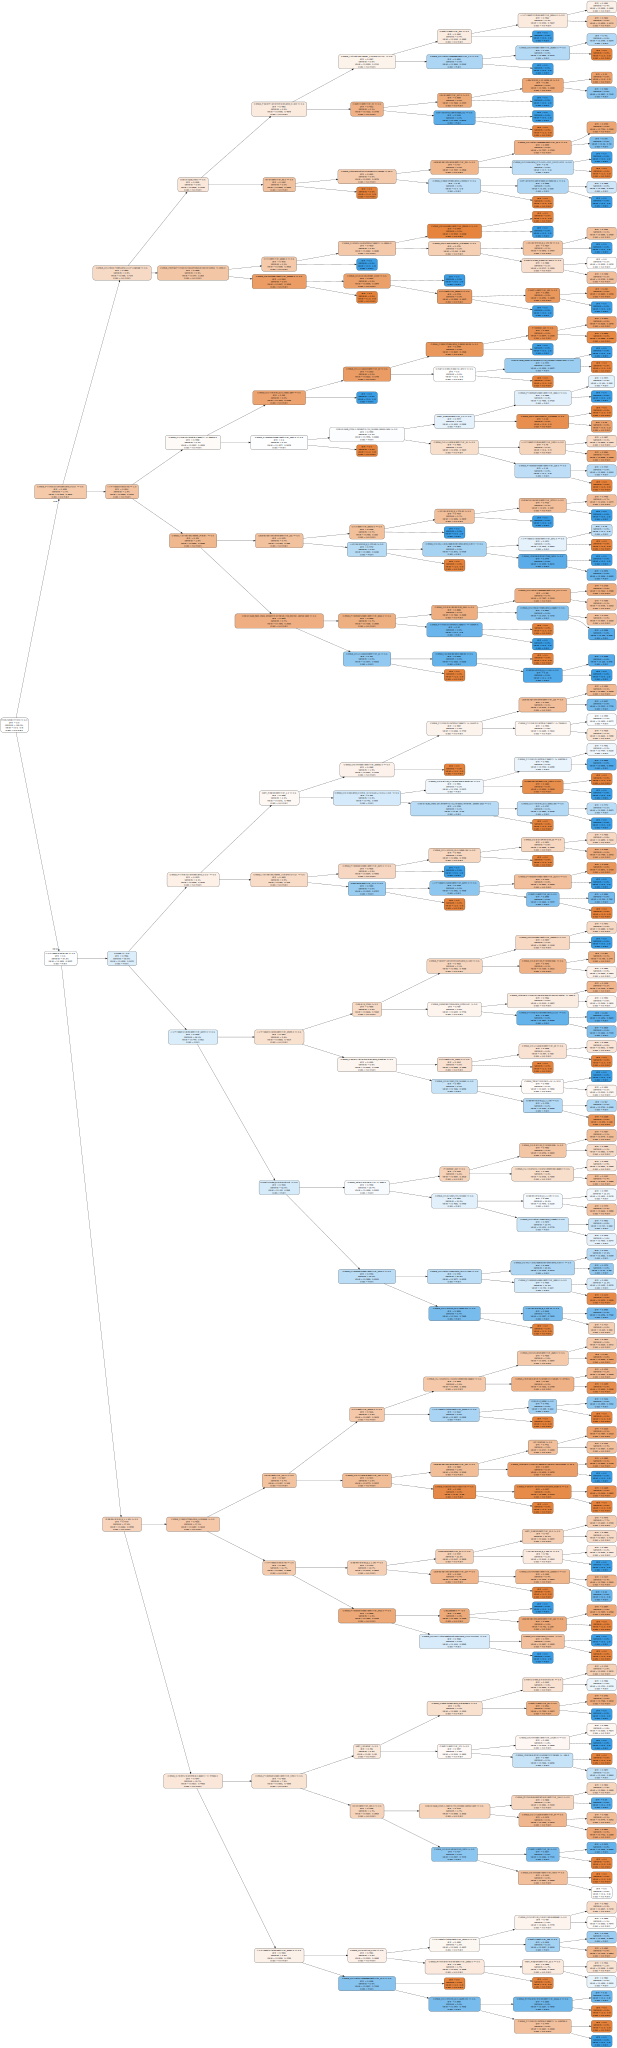

<Figure size 576x576 with 0 Axes>

In [439]:
plt.figure(figsize=(8,8))
dot_data = export_graphviz(
                        decision_tree = tree_list[4],
                        feature_names=X_test.columns,
                        class_names=['No Rain', 'Rain'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

In [515]:
top_features_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [516]:
top_features_rf

AVProductStatesIdentifier_53447.0                   0.10
AVProductsInstalled                                 0.07
SmartScreen_ExistsNotSet                            0.05
SmartScreen_RequireAdmin                            0.04
EngineVersion_g_1.1.151                             0.04
AVProductStatesIdentifier_resto                     0.03
Census_TotalPhysicalRAM                             0.03
AvSigVersion_g_resto                                0.03
Processor_x64                                       0.02
Census_SystemVolumeTotalCapacity                    0.02
Census_InternalPrimaryDiagonalDisplaySizeInInches   0.02
Census_PrimaryDiskTotalCapacity                     0.02
AVProductStatesIdentifier_7945.0                    0.02
Processor_x86                                       0.02
AppVersion_4.18.1807.18075                          0.02
Census_IsAlwaysOnAlwaysConnectedCapable             0.02
Census_OSArchitecture_x86                           0.01
AppVersion_4.16.17656.18052    

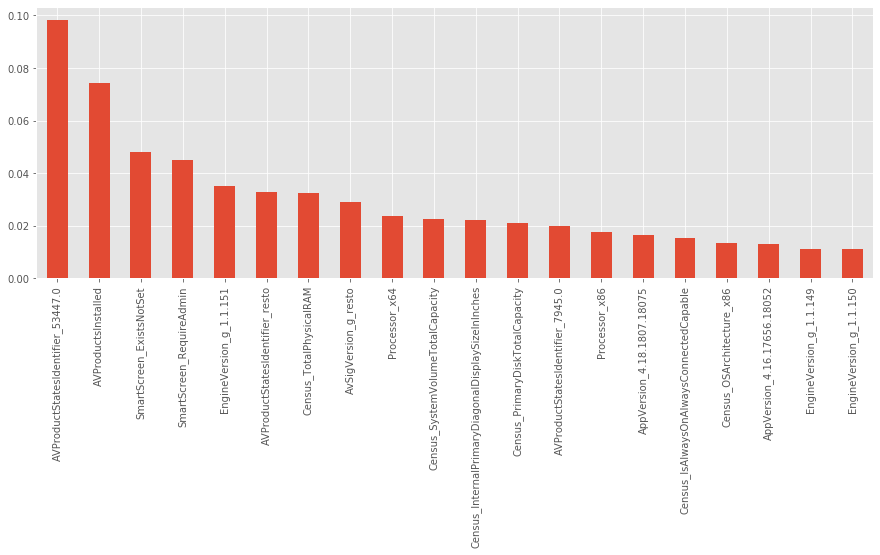

In [517]:
plt.figure(figsize=(15,5))
top_features_rf.plot(kind='bar')

Se puede observar que la identificación del antivirus sigue siendo un atributo importante en el arbol, pero en cambio, en el segundo atributo vemos el número de antivirus instalados, el smartscreen dos veces. Este modelo tiene más sentido

In [486]:
get_gain_table(rf, X_test, y_test)

Cases  Responses  Accuracy  Pct. Cases  Pct. Responses  \
Decile                                                                   
(0.555, 0.615]  12000       8614      0.72        0.10            0.14   
(0.544, 0.555]  12000       7636      0.64        0.10            0.13   
(0.534, 0.544]  12000       7154      0.60        0.10            0.12   
(0.522, 0.534]  12000       6793      0.57        0.10            0.11   
(0.508, 0.522]  12000       6448      0.54        0.10            0.11   
(0.492, 0.508]  12000       5920      0.49        0.10            0.10   
(0.475, 0.492]  12000       5514      0.46        0.10            0.09   
(0.458, 0.475]  12000       4598      0.38        0.10            0.08   
(0.433, 0.458]  12000       3965      0.33        0.10            0.07   
(0.262, 0.433]  12000       3300      0.28        0.10            0.06   

                Cum. Cases  Cum. Responses  Cum. Pct. Cases  \
Decile                                                        
(0.555, 0.615]       12000            8614             0.10   
(0.544, 0.555]       24000           16250             0.20   
(0.534, 0.544]       36000           23404             0.30   
(0.522, 0.534]       48000           30197             0.40   
(0.508, 0.522]       60000           36645             0.50   
(0.492, 0.508]       72000           42565             0.60   
(0.475, 0.492]       84000           48079             0.70   
(0.458, 0.475]       96000           52677             0.80   
(0.433, 0.458]      108000           56642             0.90   
(0.262, 0.433]      120000           59942             1.00   

                Cum. Pct. Responses  
Decile                               
(0.555, 0.615]                 0.14  
(0.544, 0.555]                 0.27  
(0.534, 0.544]                 0.39  
(0.522, 0.534]                 0.50  
(0.508, 0.522]                 0.61  
(0.492, 0.508]                 0.71  
(0.475, 0.492]                 0.80  
(0.458, 0.475]                 0.88  
(0.433, 0.458]                 0.94  
(0.262, 0.433]                 1.00

### Gradient Boosting

In [483]:
for i in (50, 100, 150, 200, 250):
    gb = GradientBoostingClassifier(n_estimators=i, max_depth=5, min_samples_split=500, random_state=42)
    gb.fit(X_train, np.ravel(y_train))
    y_score_train = pd.DataFrame(gb.predict_proba(X_train)[:,1], index=y_train.index)

    auc_score_train = metrics.roc_auc_score(y_train, y_score_train)

    y_score_test = pd.DataFrame(gb.predict_proba(X_test)[:,1], index=y_test.index)

    auc_score_test = metrics.roc_auc_score(y_test, y_score_test)

    print('n_estimators: {}. Train: {} - Test: {}'.format(i, auc_score_train, auc_score_test))

Profundidad del árbol: 50. Train: 0.6823708369063707 - Test: 0.6761755474040393
Profundidad del árbol: 100. Train: 0.6925936822827337 - Test: 0.6837218770945539
Profundidad del árbol: 150. Train: 0.6988736824630051 - Test: 0.6876440535373878
Profundidad del árbol: 200. Train: 0.7037704032060297 - Test: 0.6901296075266665


Utilizaremos 200 como n_estimators ya que es el mayor score y aún no tiene overfitting. 

In [481]:
gb = GradientBoostingClassifier(n_estimators=200, max_depth=5, min_samples_split=500, random_state=42)
gb.fit(X_train, np.ravel(y_train))
y_score_train = pd.DataFrame(gb.predict_proba(X_train)[:,1], index=y_train.index)

auc_score_train = metrics.roc_auc_score(y_train, y_score_train)

y_score_test = pd.DataFrame(gb.predict_proba(X_test)[:,1], index=y_test.index)

auc_score_test = metrics.roc_auc_score(y_test, y_score_test)

print('n_estimators: 200. Train: {} - Test: {}'.format(auc_score_train, auc_score_test))

Profundidad del árbol: 200. Train: 0.6988736824630051 - Test: 0.6876440535373878


In [509]:
top_features_gb = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [510]:
top_features_gb

AVProductStatesIdentifier_53447.0                   0.18
Census_TotalPhysicalRAM                             0.06
SmartScreen_ExistsNotSet                            0.06
Census_InternalBatteryType_resto                    0.05
EngineVersion_g_1.1.151                             0.05
SmartScreen_RequireAdmin                            0.05
Census_PrimaryDiskTotalCapacity                     0.03
Census_OSInstallTypeName_UUPUpgrade                 0.03
Census_InternalPrimaryDiagonalDisplaySizeInInches   0.02
Wdft_IsGamer                                        0.02
AVProductsInstalled                                 0.02
AppVersion_4.18.1807.18075                          0.02
Census_IsVirtualDevice                              0.02
EngineVersion_g_1.1.152                             0.01
Census_OSInstallTypeName_Update                     0.01
AVProductStatesIdentifier_63682.0                   0.01
AppVersion_4.16.17656.18052                         0.01
AppVersion_4.14.17639.18041    

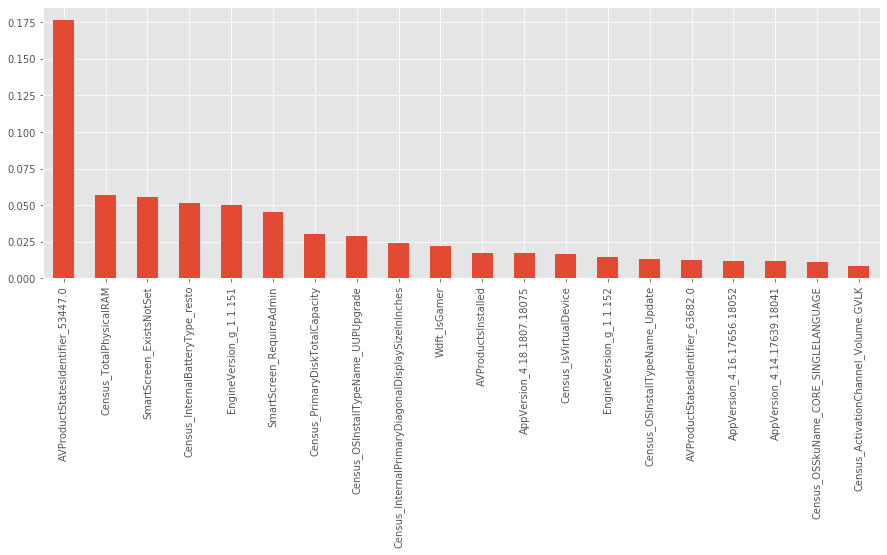

In [511]:
plt.figure(figsize=(15,5))
top_features_gb.plot(kind='bar')

En este modelo sigue ganando la identificación del antivirus, aunque sale de segundo la memoria del ordenador (Extraño que sea una variable para tener Malware), el SmartScreen y la bateria en su grupo resto.

In [487]:
get_gain_table(gb, X_test, y_test)

Cases  Responses  Accuracy  Pct. Cases  \
Decile                                                                  
(0.681, 0.949]                 12000       9535      0.79        0.10   
(0.621, 0.681]                 12000       8013      0.67        0.10   
(0.581, 0.621]                 12000       7435      0.62        0.10   
(0.546, 0.581]                 12000       6793      0.57        0.10   
(0.51, 0.546]                  12000       6376      0.53        0.10   
(0.468, 0.51]                  12000       5719      0.48        0.10   
(0.419, 0.468]                 12000       5242      0.44        0.10   
(0.363, 0.419]                 12000       4491      0.37        0.10   
(0.297, 0.363]                 12000       3747      0.31        0.10   
(0.062200000000000005, 0.297]  12000       2591      0.22        0.10   

                               Pct. Responses  Cum. Cases  Cum. Responses  \
Decile                                                                      
(0.681, 0.949]                           0.16       12000            9535   
(0.621, 0.681]                           0.13       24000           17548   
(0.581, 0.621]                           0.12       36000           24983   
(0.546, 0.581]                           0.11       48000           31776   
(0.51, 0.546]                            0.11       60000           38152   
(0.468, 0.51]                            0.10       72000           43871   
(0.419, 0.468]                           0.09       84000           49113   
(0.363, 0.419]                           0.07       96000           53604   
(0.297, 0.363]                           0.06      108000           57351   
(0.062200000000000005, 0.297]            0.04      120000           59942   

                               Cum. Pct. Cases  Cum. Pct. Responses  
Decile                                                               
(0.681, 0.949]                            0.10                 0.16  
(0.621, 0.681]                            0.20                 0.29  
(0.581, 0.621]                            0.30                 0.42  
(0.546, 0.581]                            0.40                 0.53  
(0.51, 0.546]                             0.50                 0.64  
(0.468, 0.51]                             0.60                 0.73  
(0.419, 0.468]                            0.70                 0.82  
(0.363, 0.419]                            0.80                 0.89  
(0.297, 0.363]                            0.90                 0.96  
(0.062200000000000005, 0.297]             1.00                 1.00

### Model evaluation

In [497]:
models = [ 
    ('DecisionTree', dt),
    ('RandomForest', rf),
    ('GradientBoosting', gb)
]

ROC AUC Score for DecisionTree: 0.6570938794343919
ROC AUC Score for RandomForest: 0.6530822626302032
ROC AUC Score for GradientBoosting: 0.6901296075266665


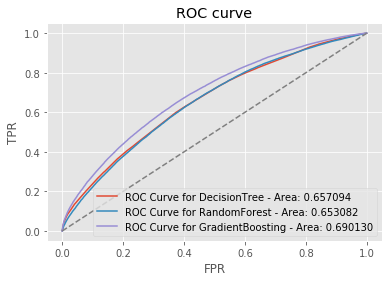

In [569]:
plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

Como se puede observa, el decision tree y el random forest presentan curvas muy parecidas aunque no del todo iguales, en los valores bajos del umbral de score existen leves diferencias. 

Se usará el Gradient Boosting

In [541]:
gen_features = pd.DataFrame({'dt': top_features_dt,
                               'rf': top_features_rf,
                                'gb': top_features_gb})
gen_features.sort_values('dt', ascending=False).sort_values('rf', ascending=False).sort_values('gb', ascending=False).head(10)

dt   rf   gb
AVProductStatesIdentifier_53447.0                 0.26 0.10 0.18
Census_TotalPhysicalRAM                           0.10 0.03 0.06
SmartScreen_ExistsNotSet                          0.09 0.05 0.06
Census_InternalBatteryType_resto                  0.08  nan 0.05
EngineVersion_g_1.1.151                           0.07 0.04 0.05
SmartScreen_RequireAdmin                          0.04 0.04 0.05
Census_PrimaryDiskTotalCapacity                   0.01 0.02 0.03
Census_OSInstallTypeName_UUPUpgrade               0.04  nan 0.03
Census_InternalPrimaryDiagonalDisplaySizeInInches 0.02 0.02 0.02
Wdft_IsGamer                                      0.02  nan 0.02

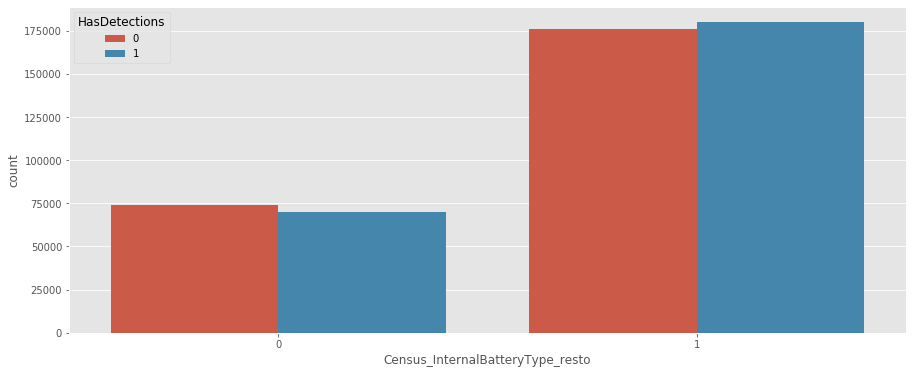

In [538]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df_d, x='Census_InternalBatteryType_resto', hue='HasDetections')

Ya que un grupo resto aparece entre los atributos más importantes. Se podría hacer un estudio particular usando solo las variables dentro de resto. 

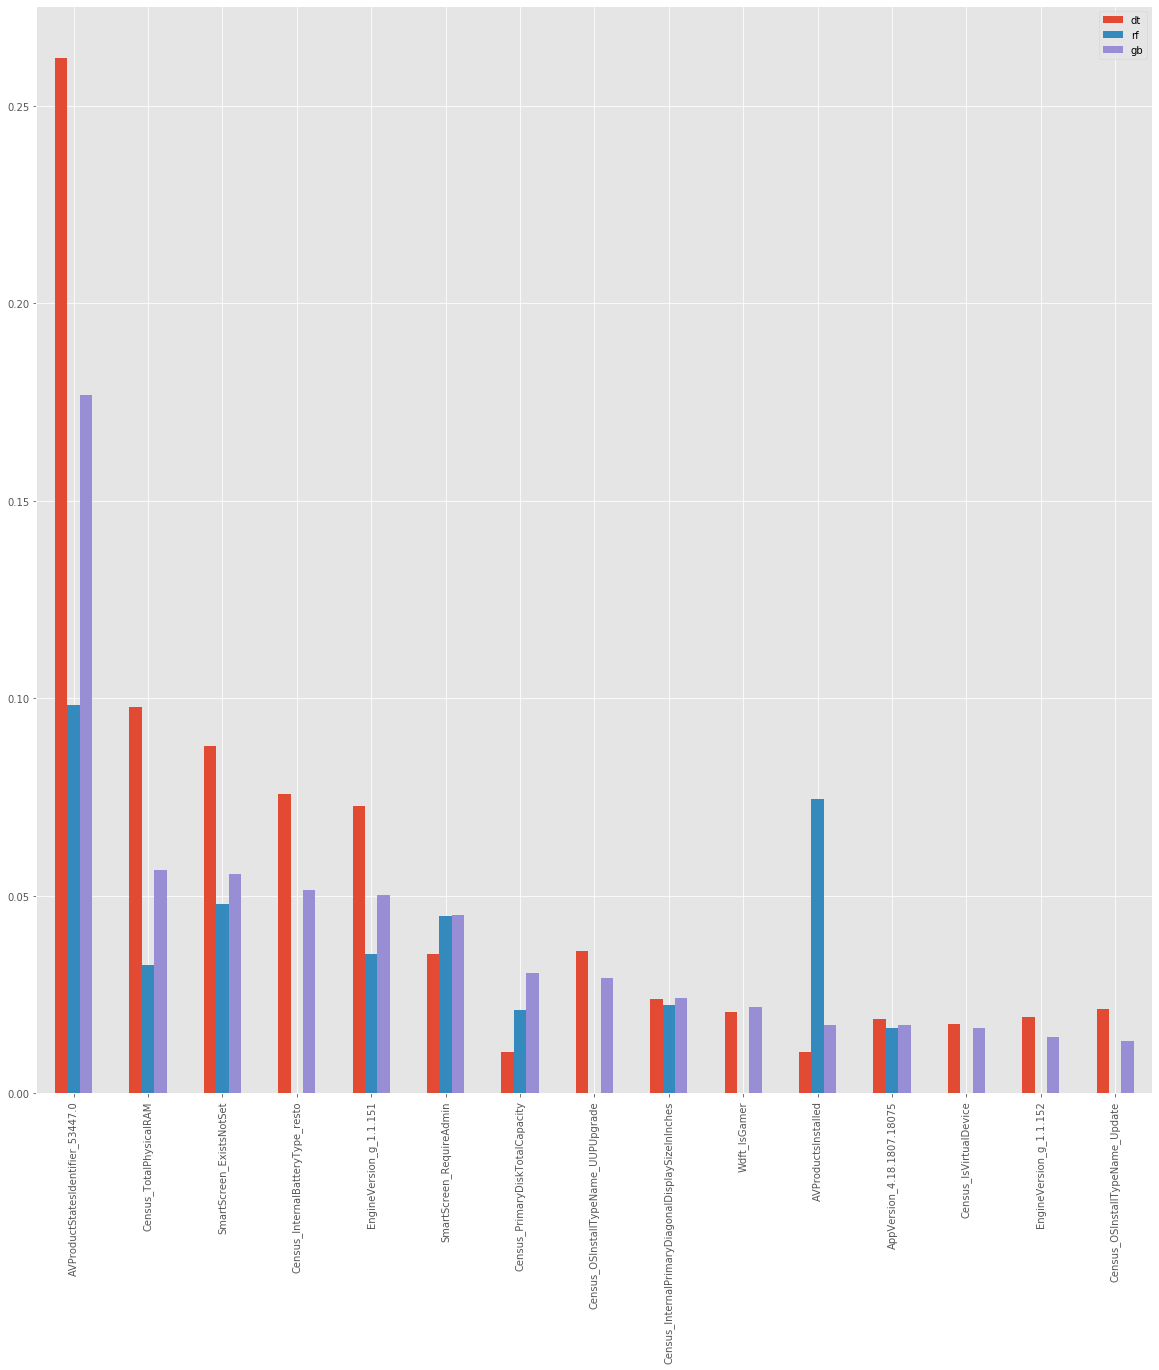

In [564]:
gen_feat_ord = gen_features.sort_values('dt', ascending=False).sort_values('rf', ascending=False).sort_values('gb', ascending=False).head(15)
gen_feat_ord.plot(figsize=(20,20), kind='bar')

Esta gráfica me gusta mucho porque representa un visión general de los atributos a lo largo de todos los modelos. Muy interesante.

### Model evaluation in validation

ROC AUC Score for GradientBoosting: 0.6879750783250609


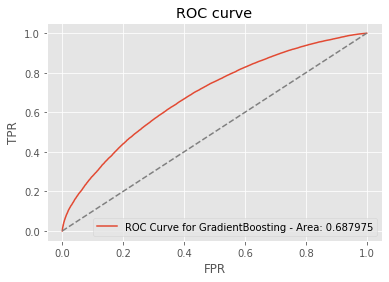

In [508]:
plt.clf()
val_predictions = gb.predict_proba(val_df_X)[:,1]
auc_score = metrics.roc_auc_score(val_df_y, val_predictions)
print('ROC AUC Score for GradientBoosting: {}'.format(auc_score))
fpr, tpr, _ = metrics.roc_curve(val_df_y, val_predictions)
plt.plot(fpr, tpr, label='ROC Curve for GradientBoosting - Area: {:2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

El valor que se entrega a Microsoft es el de 0.688.

### Otras métricas de medición (Solo para practicar)

#### Matriz de Confusión

In [570]:
y_test_pred = pd.DataFrame(gb.predict(X_test), index=y_test.index, columns=['DetectionsPrediction'])

In [571]:
y_test_pred.head()

DetectionsPrediction
28915                      1
25836                      1
49390                      0
184384                     1
392701                     0

In [572]:
results_df = y_test.join(y_test_pred)

In [575]:
results_df

HasDetections  DetectionsPrediction
28915               1                     1
25836               1                     1
49390               0                     0
184384              1                     1
392701              1                     0
...               ...                   ...
210105              0                     1
428617              1                     1
395570              0                     1
377864              0                     0
451013              0                     1

[120000 rows x 2 columns]

In [573]:
confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None)

array([[36774, 23284],
       [20304, 39638]], dtype=int64)

#### Accuracy

In [574]:
metrics.accuracy_score(y_test, y_test_pred)

0.6367666666666667

#### F1 Score

In [576]:
metrics.f1_score(y_test, y_test_pred)

0.6452337543951036